# Titanic: Machine Learning from Disaster

### 🚢 About This Competition
The Titanic competition is a classic beginner-friendly machine learning challenge on Kaggle. The goal is to predict which passengers survived the Titanic disaster based on features like age, sex, ticket class, and more.

### 📊 Dataset Overview
The dataset contains information about Titanic passengers including:
- **Training Set**: ~900 passengers with survival outcomes
- **Test Set**: ~400 passengers for predictions
- **Features**: PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

### 🗺️ Notebook Structure
1. **Data Exploration & Visualization** - Understanding our dataset
2. **Data Cleaning & Preprocessing** - Handling missing values and feature engineering
3. **Model Building & Selection** - Testing different algorithms
4. **Evaluation & Validation** - Assessing model performance
5. **Final Predictions** - Creating submission file

In [43]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
sns.set_palette("husl")

#/kaggle/input/titanic/train.csv
#/kaggle/input/titanic/test.csv

In [44]:
# The first thing I always do is to load the data and take a look at its structure.
# Load the data
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')

print("📊 Dataset Shape:")
print(f"Training set: {train_df.shape}")
print(f"Test set: {test_df.shape}")
print(f"Total passengers: {train_df.shape[0] + test_df.shape[0]}")

print("\n🔍 First 5 rows of training data:")
train_df.head()

📊 Dataset Shape:
Training set: (891, 12)
Test set: (418, 11)
Total passengers: 1309

🔍 First 5 rows of training data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
print("\n🔍 First 5 rows of test data:")
test_df.tail(10)


🔍 First 5 rows of test data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [46]:
# Some more data exploration
# Basic Dataset Information
print("📋 Dataset Info:")
print("=" * 50)
print(f"Training set columns: {list(train_df.columns)}")
print(f"\nData types:")
print(train_df.dtypes)
print(f"\nBasic statistics:")
train_df.describe(include='all')

📋 Dataset Info:
Training set columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Basic statistics:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


🔍 Missing Values Analysis:
          Training Set  Test Set  Train %  Test %
Cabin              687     327.0    77.10   78.23
Age                177      86.0    19.87   20.57
Embarked             2       0.0     0.22    0.00


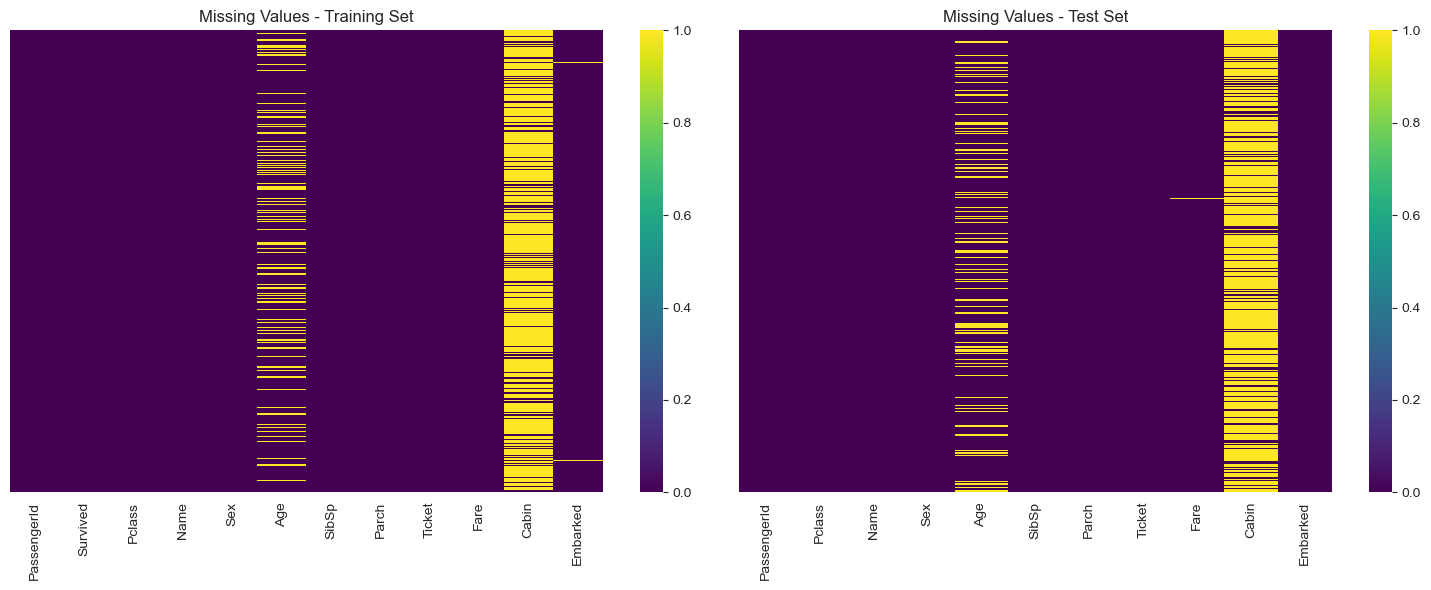

In [47]:
# The first thing that is obvious is that there are some missing values in both datasets.
# let's explore the missing values in both datasets.
# Missing Values Analysis
print("🔍 Missing Values Analysis:")
print("=" * 50)

missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

missing_df = pd.DataFrame({
    'Training Set': missing_train,
    'Test Set': missing_test,
    'Train %': (missing_train / len(train_df) * 100).round(2),
    'Test %': (missing_test / len(test_df) * 100).round(2)
})

missing_df = missing_df[missing_df['Training Set'] > 0].sort_values('Training Set', ascending=False)
print(missing_df)

# Visualization of missing values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Training set missing values
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=ax1)
ax1.set_title('Missing Values - Training Set')

# Test set missing values  
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=True, cmap='viridis', ax=ax2)
ax2.set_title('Missing Values - Test Set')

plt.tight_layout()
plt.show()

### Missing Data Snapshot

- **Training set:** `Age`, `Cabin`, and `Embarked` contain null values.
- **Test set:** `Age`, `Cabin`, and `Fare` contain null values.
- `Cabin` is missing for a large share of passengers, so it will need special attention (e.g., feature engineering or exclusion).
- I'll hold off on imputation until the exploratory analysis points to a sensible strategy.
- Next, I'll inspect the target variable `Survived` to gauge the balance between survivors and non-survivors.

🎯 Survival Analysis:
Survival Distribution:
Died (0): 549 passengers (61.6%)
Survived (1): 342 passengers (38.4%)


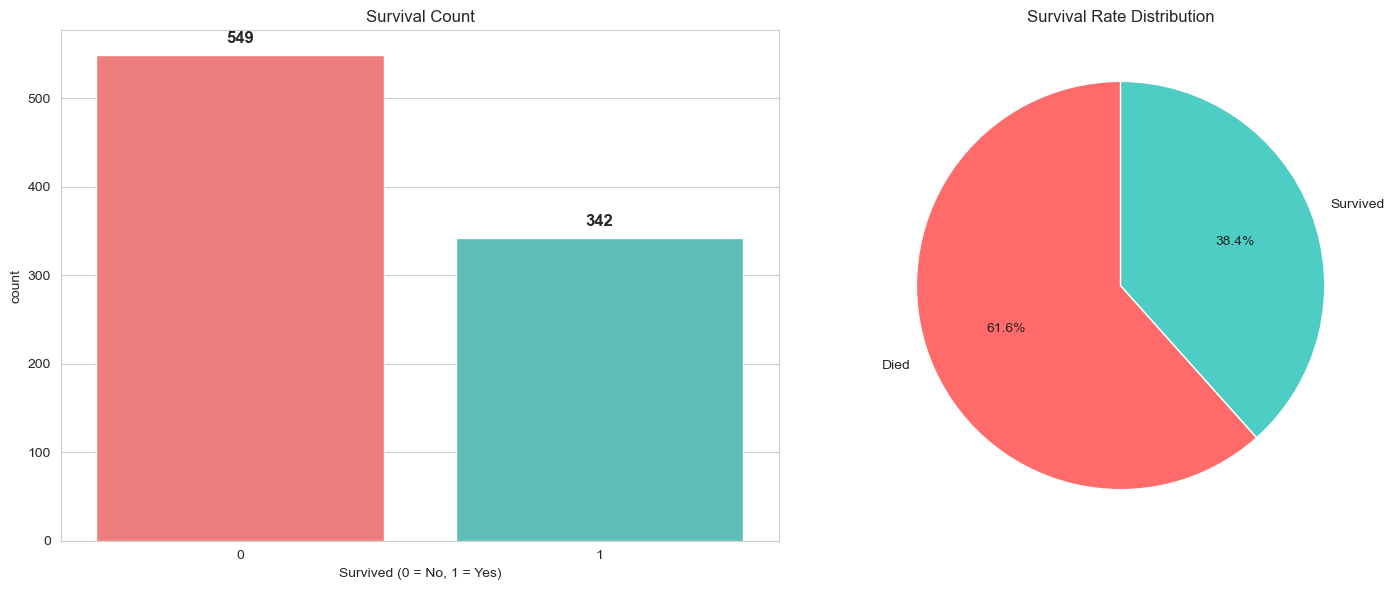

In [48]:
# Survival Analysis - The Target Variable
print("🎯 Survival Analysis:")
print("=" * 50)

survival_counts = train_df['Survived'].value_counts()
survival_rate = train_df['Survived'].mean()

print(f"Survival Distribution:")
print(f"Died (0): {survival_counts[0]} passengers ({(1-survival_rate)*100:.1f}%)")
print(f"Survived (1): {survival_counts[1]} passengers ({survival_rate*100:.1f}%)")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Count plot
sns.countplot(data=train_df, x='Survived', ax=ax1, palette=['#ff6b6b', '#4ecdc4'])
ax1.set_title('Survival Count')
ax1.set_xlabel('Survived (0 = No, 1 = Yes)')
for i, v in enumerate(survival_counts):
    ax1.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Pie chart
colors = ['#ff6b6b', '#4ecdc4']
ax2.pie(survival_counts.values, labels=['Died', 'Survived'], autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Survival Rate Distribution')

plt.tight_layout()
plt.show()

### Handling Class Imbalance & Evaluation Strategy

- The target labels lean slightly toward non-survivors, so I'll keep that asymmetry in mind when training models.
- During modeling, I'll favor techniques that are resilient to imbalance (e.g., stratified splits, class-aware metrics such as F1-score or balanced accuracy).
- Even though Kaggle provides a held-out test set, I'll carve out a validation fold from the training data to monitor generalization before submitting predictions.
- When I begin model development, I'll combine cross-validation with stratification so each fold preserves the class ratio.
- Implementation of these steps will happen once feature engineering is complete.

📊 Categorical Variables Analysis:


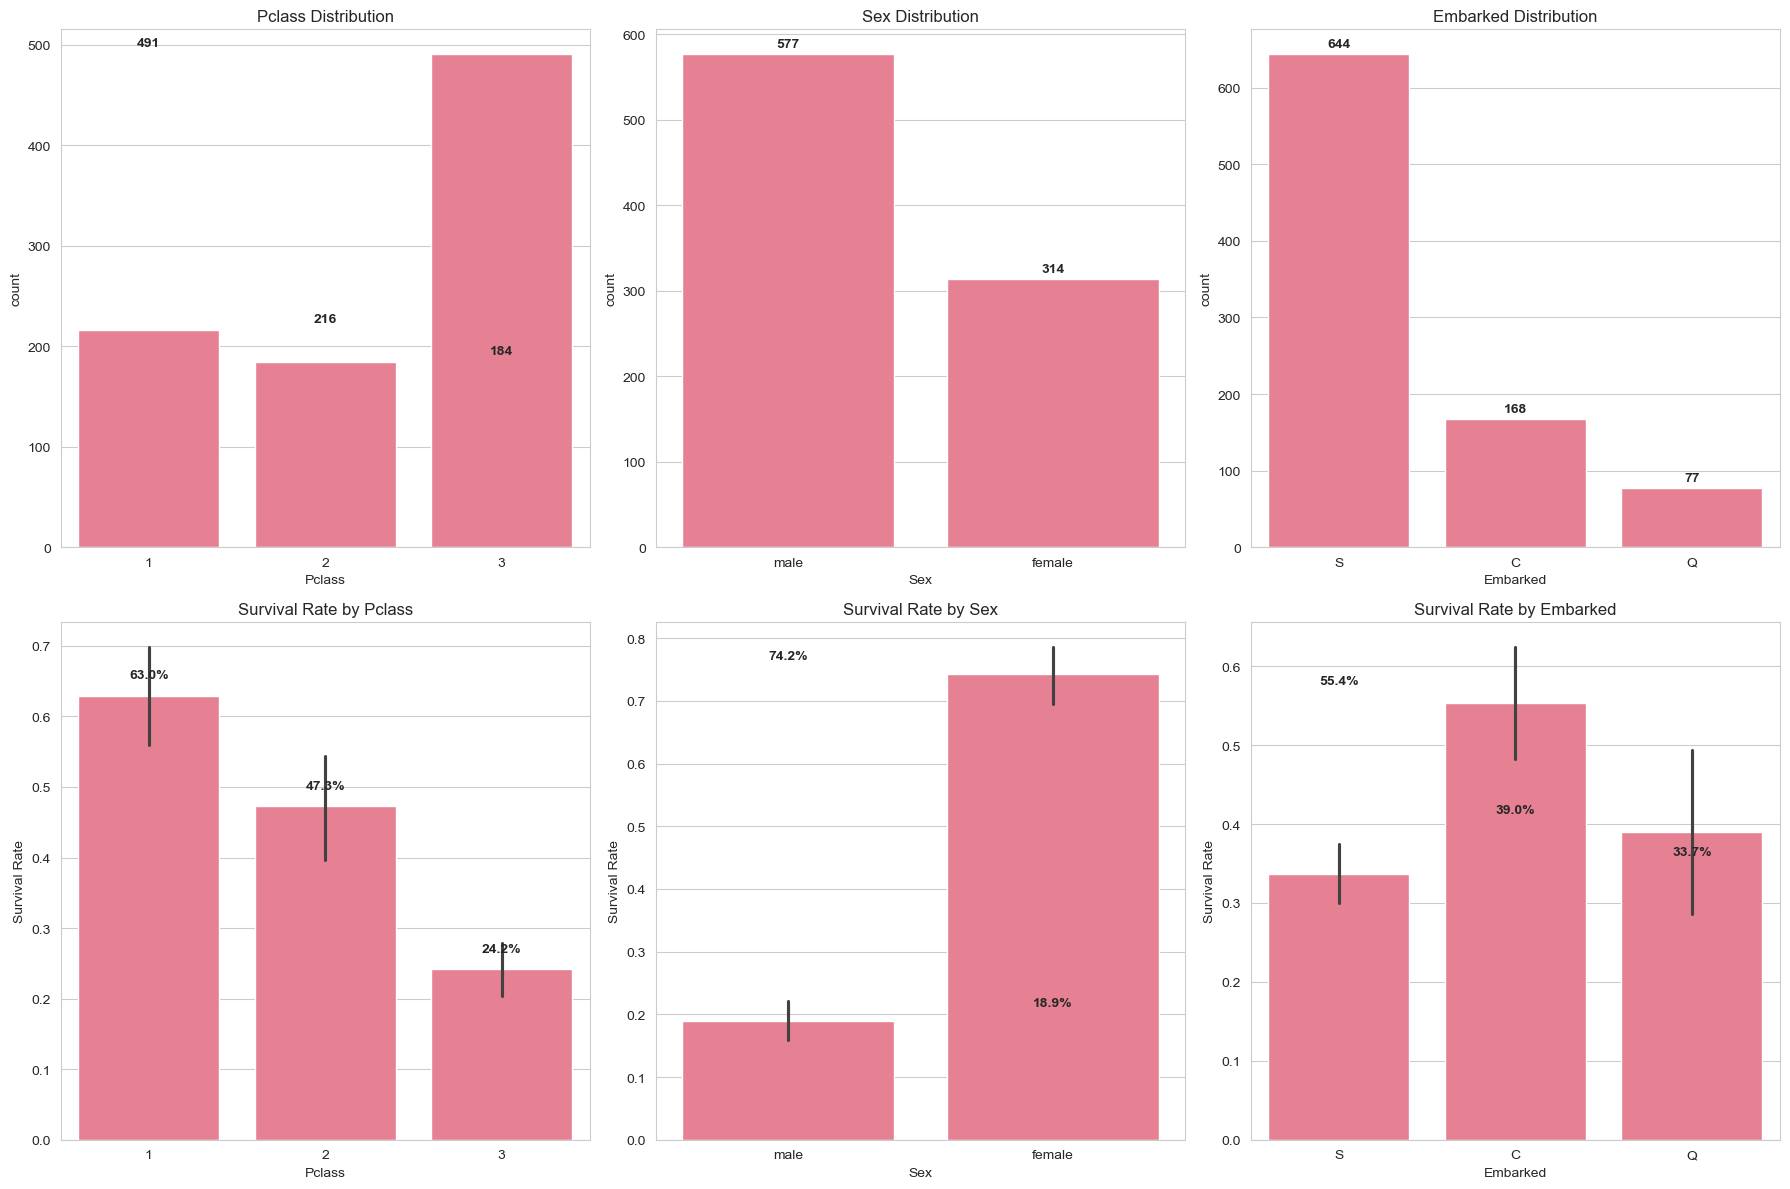


📈 Survival Statistics by Category:
--------------------------------------------------

PCLASS:
        Total  Survived  Survival_Rate
Pclass                                
1         216       136           63.0
2         184        87           47.3
3         491       119           24.2

SEX:
        Total  Survived  Survival_Rate
Sex                                   
female    314       233           74.2
male      577       109           18.9

EMBARKED:
          Total  Survived  Survival_Rate
Embarked                                
C           168        93           55.4
Q            77        30           39.0
S           644       217           33.7


In [49]:
# Categorical Variables Analysis
print("📊 Categorical Variables Analysis:")
print("=" * 50)

categorical_cols = ['Pclass', 'Sex', 'Embarked']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    # Count plot
    sns.countplot(data=train_df, x=col, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')
    
    # Add value counts on bars
    for j, v in enumerate(train_df[col].value_counts().values):
        axes[i].text(j, v + 5, str(v), ha='center', va='bottom', fontweight='bold')
    
    # Survival by category
    survival_by_cat = train_df.groupby(col)['Survived'].agg(['count', 'sum', 'mean'])
    sns.barplot(data=train_df, x=col, y='Survived', ax=axes[i+3])
    axes[i+3].set_title(f'Survival Rate by {col}')
    axes[i+3].set_ylabel('Survival Rate')
    
    # Add percentage labels
    for j, (idx, row) in enumerate(survival_by_cat.iterrows()):
        axes[i+3].text(j, row['mean'] + 0.02, f'{row["mean"]*100:.1f}%', 
                      ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\n📈 Survival Statistics by Category:")
print("-" * 50)
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    survival_stats = train_df.groupby(col)['Survived'].agg(['count', 'sum', 'mean'])
    survival_stats.columns = ['Total', 'Survived', 'Survival_Rate']
    survival_stats['Survival_Rate'] = (survival_stats['Survival_Rate'] * 100).round(1)
    print(survival_stats)

👥 Age Analysis:
Age Statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Missing Age values: 177 (19.9%)


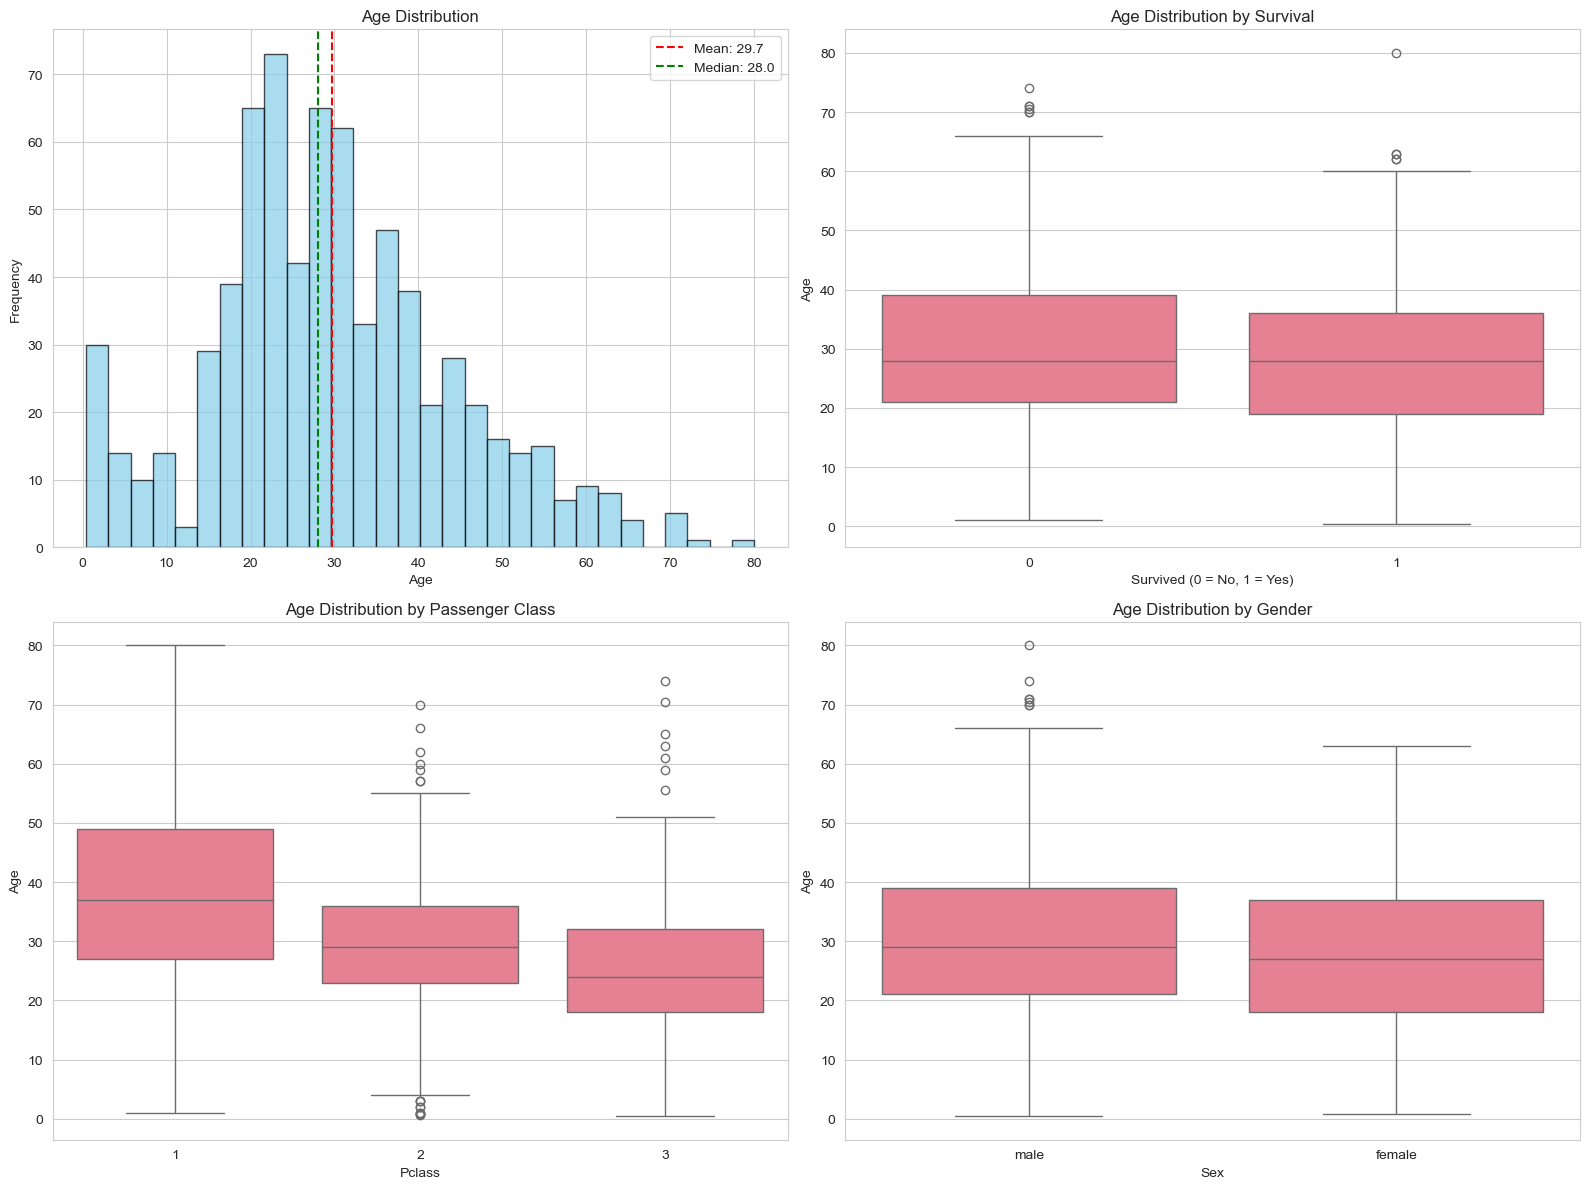


📊 Survival by Age Group:
            Total  Survived  Survival_Rate
AgeGroup                                  
Child          69        40          0.580
Teen          110        42          0.382
Adult         385       153          0.397
Middle Age    128        50          0.391
Senior         22         5          0.227


In [50]:
# Age Analysis
print("👥 Age Analysis:")
print("=" * 50)

# Basic age statistics
age_stats = train_df['Age'].describe()
print("Age Statistics:")
print(age_stats)
print(f"\nMissing Age values: {train_df['Age'].isnull().sum()} ({train_df['Age'].isnull().mean()*100:.1f}%)")

# Age visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age distribution histogram
axes[0, 0].hist(train_df['Age'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(train_df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {train_df["Age"].mean():.1f}')
axes[0, 0].axvline(train_df['Age'].median(), color='green', linestyle='--', label=f'Median: {train_df["Age"].median():.1f}')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Age boxplot by survival
sns.boxplot(data=train_df, x='Survived', y='Age', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Survival')
axes[0, 1].set_xlabel('Survived (0 = No, 1 = Yes)')

# Age by Pclass
sns.boxplot(data=train_df, x='Pclass', y='Age', ax=axes[1, 0])
axes[1, 0].set_title('Age Distribution by Passenger Class')

# Age by Sex
sns.boxplot(data=train_df, x='Sex', y='Age', ax=axes[1, 1])
axes[1, 1].set_title('Age Distribution by Gender')

plt.tight_layout()
plt.show()

# Age group analysis
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=[0, 12, 20, 40, 60, 100], 
                             labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])

age_survival = train_df.groupby('AgeGroup')['Survived'].agg(['count', 'sum', 'mean']).round(3)
age_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(f"\n📊 Survival by Age Group:")
print(age_survival)

👨‍👩‍👧‍👦 Family Analysis:
Family composition statistics:
SibSp (Siblings/Spouses): min=0, max=8
Parch (Parents/Children): min=0, max=6
Family Size: min=1, max=11


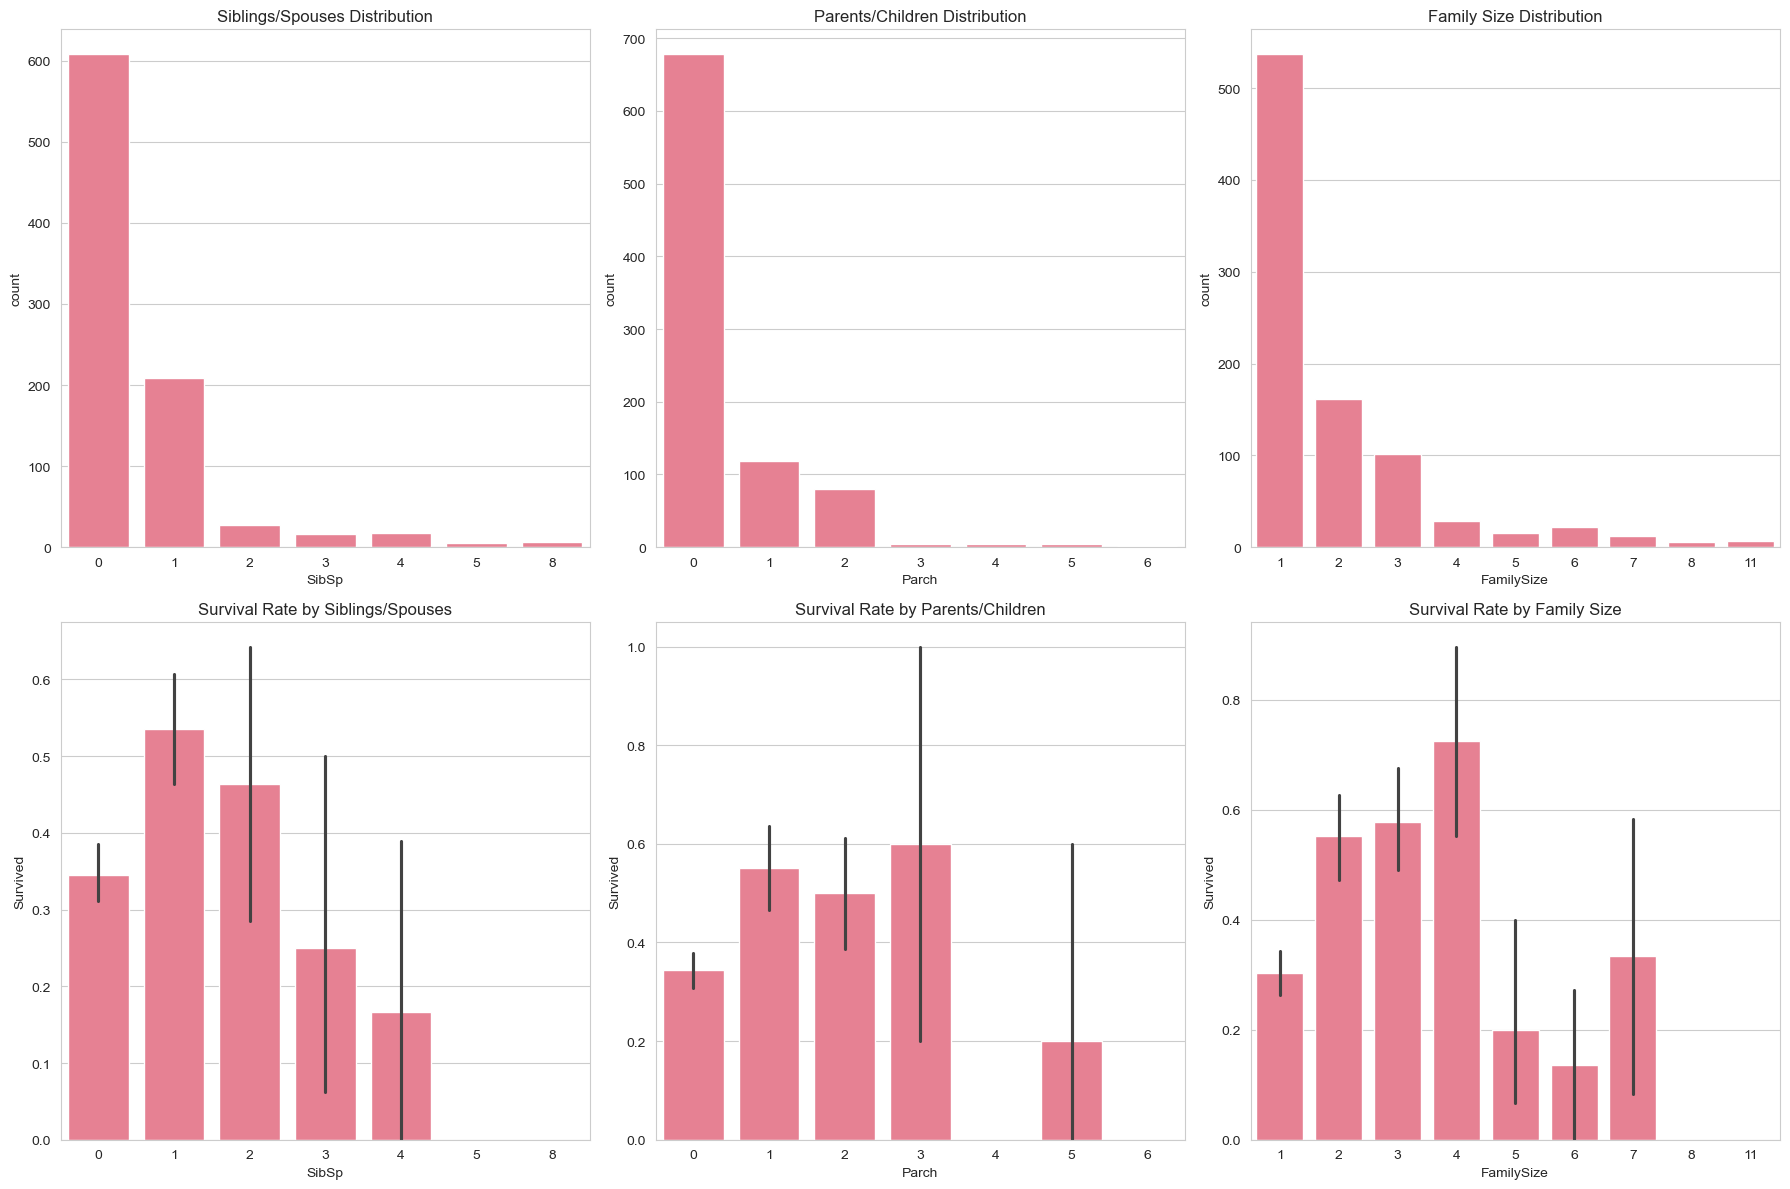


📊 Survival by Family Size Group:
                 Total  Survived  Survival_Rate
FamilySizeGroup                                
Alone              537       163          0.304
Large               62        10          0.161
Small              292       169          0.579

📊 Survival: Alone vs With Family:
             Total  Survived  Survival_Rate
With Family    354       179          0.506
Alone          537       163          0.304


In [51]:
# Family Analysis (SibSp, Parch)
print("👨‍👩‍👧‍👦 Family Analysis:")
print("=" * 50)

# Create family size feature
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)

print("Family composition statistics:")
print(f"SibSp (Siblings/Spouses): min={train_df['SibSp'].min()}, max={train_df['SibSp'].max()}")
print(f"Parch (Parents/Children): min={train_df['Parch'].min()}, max={train_df['Parch'].max()}")
print(f"Family Size: min={train_df['FamilySize'].min()}, max={train_df['FamilySize'].max()}")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# SibSp distribution and survival
sns.countplot(data=train_df, x='SibSp', ax=axes[0, 0])
axes[0, 0].set_title('Siblings/Spouses Distribution')

sns.barplot(data=train_df, x='SibSp', y='Survived', ax=axes[1, 0])
axes[1, 0].set_title('Survival Rate by Siblings/Spouses')

# Parch distribution and survival
sns.countplot(data=train_df, x='Parch', ax=axes[0, 1])
axes[0, 1].set_title('Parents/Children Distribution')

sns.barplot(data=train_df, x='Parch', y='Survived', ax=axes[1, 1])
axes[1, 1].set_title('Survival Rate by Parents/Children')

# Family size analysis
sns.countplot(data=train_df, x='FamilySize', ax=axes[0, 2])
axes[0, 2].set_title('Family Size Distribution')

sns.barplot(data=train_df, x='FamilySize', y='Survived', ax=axes[1, 2])
axes[1, 2].set_title('Survival Rate by Family Size')

plt.tight_layout()
plt.show()

# Family size categories
train_df['FamilySizeGroup'] = train_df['FamilySize'].apply(
    lambda x: 'Alone' if x == 1 else ('Small' if x <= 4 else 'Large')
)

family_stats = train_df.groupby('FamilySizeGroup')['Survived'].agg(['count', 'sum', 'mean']).round(3)
family_stats.columns = ['Total', 'Survived', 'Survival_Rate']
print(f"\n📊 Survival by Family Size Group:")
print(family_stats)

alone_stats = train_df.groupby('IsAlone')['Survived'].agg(['count', 'sum', 'mean']).round(3)
alone_stats.columns = ['Total', 'Survived', 'Survival_Rate']
alone_stats.index = ['With Family', 'Alone']
print(f"\n📊 Survival: Alone vs With Family:")
print(alone_stats)

💰 Fare Analysis:
Fare Statistics:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Fare range: $0.00 - $512.33


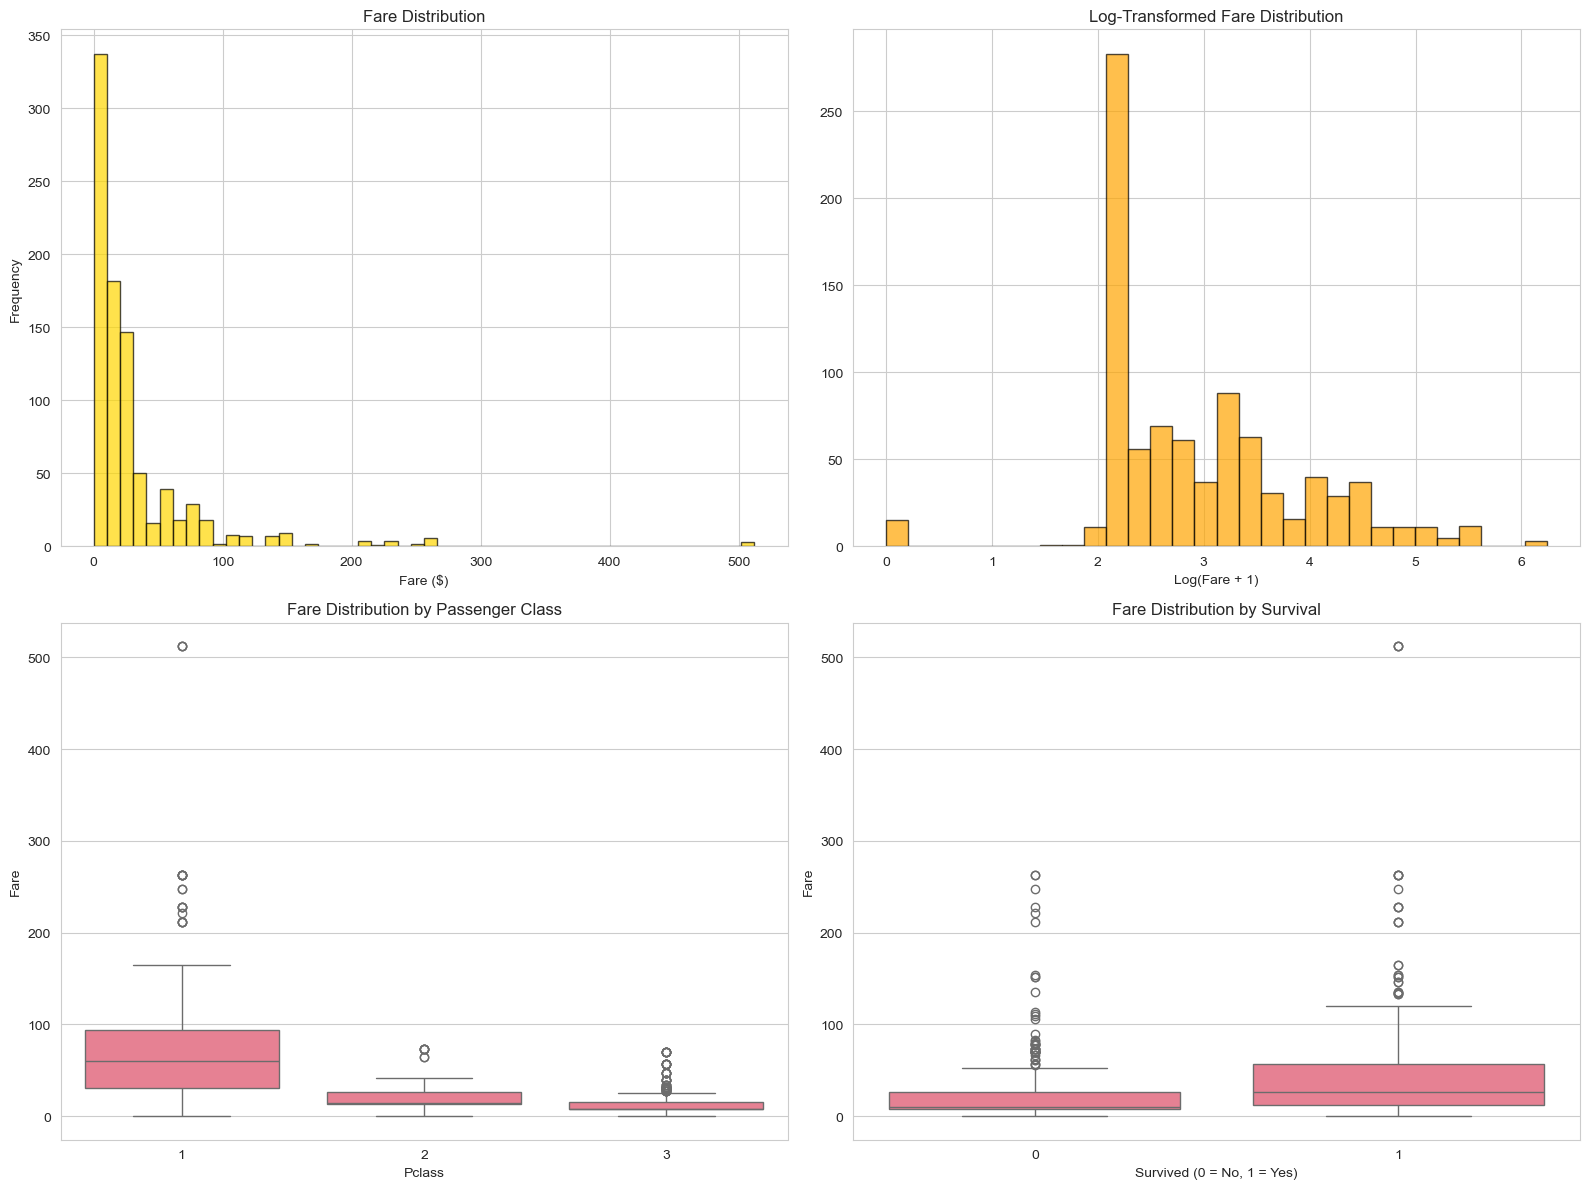


📊 Survival by Fare Quartile:
              Total  Survived  Survival_Rate
FareQuartile                                
Q1              223        44          0.197
Q2              224        68          0.304
Q3              222       101          0.455
Q4              222       129          0.581

📈 Statistical Test (T-test):
Mean fare - Survived: $48.40
Mean fare - Died: $22.12
T-statistic: 7.939, P-value: 0.000000


In [52]:
# Fare Analysis
print("💰 Fare Analysis:")
print("=" * 50)

# Basic fare statistics
fare_stats = train_df['Fare'].describe()
print("Fare Statistics:")
print(fare_stats)
print(f"\nFare range: ${train_df['Fare'].min():.2f} - ${train_df['Fare'].max():.2f}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Fare distribution (with log scale due to skewness)
axes[0, 0].hist(train_df['Fare'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[0, 0].set_title('Fare Distribution')
axes[0, 0].set_xlabel('Fare ($)')
axes[0, 0].set_ylabel('Frequency')

# Log-transformed fare
axes[0, 1].hist(np.log1p(train_df['Fare']), bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[0, 1].set_title('Log-Transformed Fare Distribution')
axes[0, 1].set_xlabel('Log(Fare + 1)')

# Fare by Pclass
sns.boxplot(data=train_df, x='Pclass', y='Fare', ax=axes[1, 0])
axes[1, 0].set_title('Fare Distribution by Passenger Class')

# Fare by survival
sns.boxplot(data=train_df, x='Survived', y='Fare', ax=axes[1, 1])
axes[1, 1].set_title('Fare Distribution by Survival')
axes[1, 1].set_xlabel('Survived (0 = No, 1 = Yes)')

plt.tight_layout()
plt.show()

# Fare quartiles analysis
train_df['FareQuartile'] = pd.qcut(train_df['Fare'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
fare_survival = train_df.groupby('FareQuartile')['Survived'].agg(['count', 'sum', 'mean']).round(3)
fare_survival.columns = ['Total', 'Survived', 'Survival_Rate']
print(f"\n📊 Survival by Fare Quartile:")
print(fare_survival)

# Statistical test
fare_survived = train_df[train_df['Survived'] == 1]['Fare']
fare_died = train_df[train_df['Survived'] == 0]['Fare']
t_stat, p_value = stats.ttest_ind(fare_survived, fare_died)
print(f"\n📈 Statistical Test (T-test):")
print(f"Mean fare - Survived: ${fare_survived.mean():.2f}")
print(f"Mean fare - Died: ${fare_died.mean():.2f}")
print(f"T-statistic: {t_stat:.3f}, P-value: {p_value:.6f}")

🔗 Multi-variable Analysis:


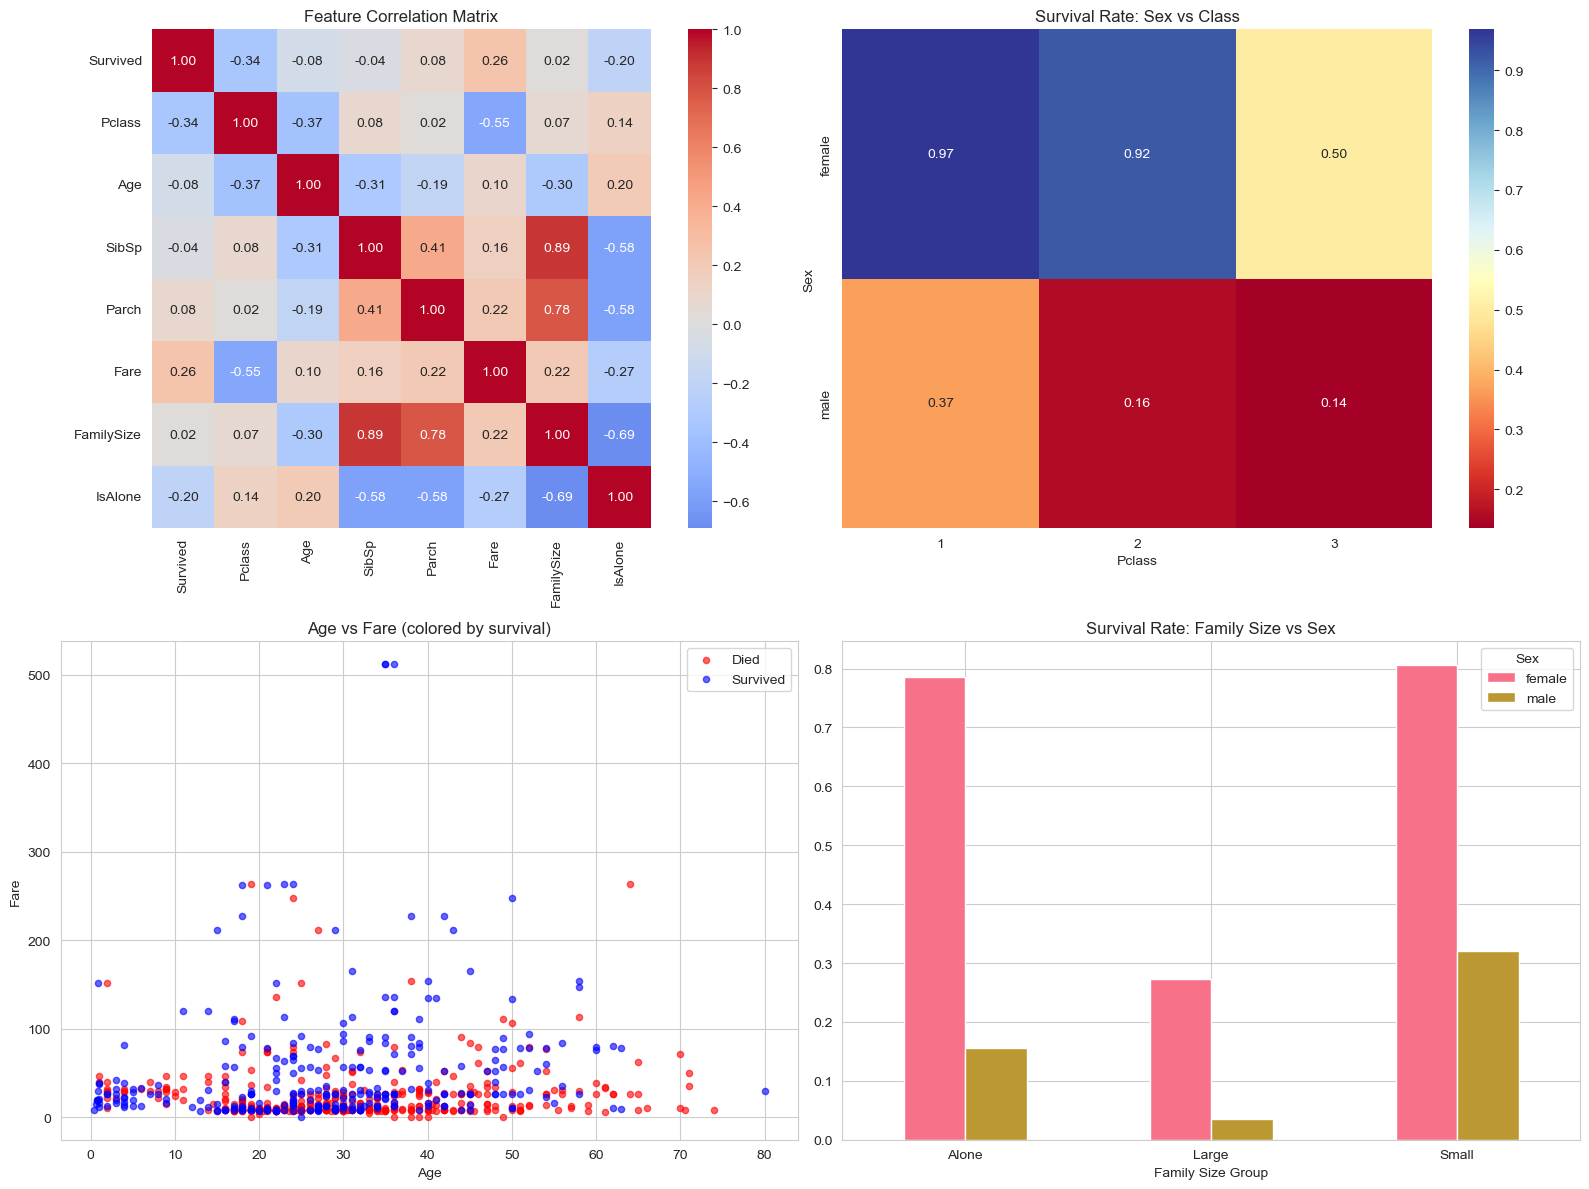


📊 Detailed Cross-tabulations:
--------------------------------------------------
Survival Rate by Sex and Class:
Survived           0      1
Sex    Pclass              
female 1       0.032  0.968
       2       0.079  0.921
       3       0.500  0.500
male   1       0.631  0.369
       2       0.843  0.157
       3       0.865  0.135
All            0.616  0.384

Survival Rate by Age Group and Class:
Survived               0      1
AgeGroup   Pclass              
Child      1       0.250  0.750
           2       0.000  1.000
           3       0.583  0.417
Teen       1       0.176  0.824
           2       0.500  0.500
           3       0.747  0.253
Adult      1       0.258  0.742
           2       0.577  0.423
           3       0.776  0.224
Middle Age 1       0.419  0.581
           2       0.613  0.387
           3       0.943  0.057
Senior     1       0.786  0.214
           2       0.667  0.333
           3       0.800  0.200
All                0.594  0.406


In [53]:
# Multi-variable Analysis & Correlations
print("🔗 Multi-variable Analysis:")
print("=" * 50)

# Create correlation matrix for numeric variables
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']
correlation_matrix = train_df[numeric_cols].corr()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
           square=True, ax=axes[0, 0], fmt='.2f')
axes[0, 0].set_title('Feature Correlation Matrix')

# Survival by Sex and Pclass
survival_sex_class = train_df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
sns.heatmap(survival_sex_class, annot=True, cmap='RdYlBu', ax=axes[0, 1], fmt='.2f')
axes[0, 1].set_title('Survival Rate: Sex vs Class')

# Age vs Fare colored by survival
survived_mask = train_df['Survived'] == 1
axes[1, 0].scatter(train_df[~survived_mask]['Age'], train_df[~survived_mask]['Fare'], 
                  alpha=0.6, label='Died', color='red', s=20)
axes[1, 0].scatter(train_df[survived_mask]['Age'], train_df[survived_mask]['Fare'], 
                  alpha=0.6, label='Survived', color='blue', s=20)
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Fare')
axes[1, 0].set_title('Age vs Fare (colored by survival)')
axes[1, 0].legend()

# Family size vs survival by sex
family_sex_survival = train_df.groupby(['FamilySizeGroup', 'Sex'])['Survived'].mean().unstack()
family_sex_survival.plot(kind='bar', ax=axes[1, 1], rot=0)
axes[1, 1].set_title('Survival Rate: Family Size vs Sex')
axes[1, 1].set_xlabel('Family Size Group')
axes[1, 1].legend(title='Sex')

plt.tight_layout()
plt.show()

# Detailed cross-tabulation analysis
print("\n📊 Detailed Cross-tabulations:")
print("-" * 50)

# Sex vs Class survival rates
sex_class_crosstab = pd.crosstab([train_df['Sex'], train_df['Pclass']], 
                                train_df['Survived'], margins=True, normalize='index')
print("Survival Rate by Sex and Class:")
print(sex_class_crosstab.round(3))

# Age group vs Class survival rates
age_class_crosstab = pd.crosstab([train_df['AgeGroup'], train_df['Pclass']], 
                                train_df['Survived'], margins=True, normalize='index')
print(f"\nSurvival Rate by Age Group and Class:")
print(age_class_crosstab.round(3))

## 📋 Key Insights from Data Exploration

After extensive visualization and analysis, here are the key insights discovered:

### 🎯 Survival Patterns
- **Overall survival rate**: ~38.4% of passengers survived
- **Gender bias**: Females had much higher survival rates (~74%) vs males (~19%)
- **Class matters**: First class passengers had the highest survival rate (~63%), followed by second class (~47%), and third class (~24%)

### 👥 Demographics Impact
- **Age factor**: Children had higher survival rates than adults
- **Family dynamics**: 
  - Passengers traveling alone had lower survival rates
  - Small families (2-4 members) had better survival chances than large families or solo travelers
  - Having 1-2 siblings/spouses improved survival odds

### 💰 Economic Factors
- **Fare correlation**: Higher fares strongly correlated with better survival rates
- **Class-fare relationship**: Passenger class and fare are highly correlated, both indicating social status

### 🔗 Key Correlations
- **Negative correlations with survival**: Pclass (-0.34), IsAlone (-0.20)
- **Positive correlations with survival**: Fare (0.26), being female
- **Missing data**: Age has significant missing values (~20%) that need handling

### 📊 Feature Engineering Opportunities
- **Family size grouping**: Categorizing family sizes shows clear survival patterns
- **Age grouping**: Children vs adults show distinct survival rates  
- **Fare binning**: Quartile-based fare groups reveal survival gradients
- **Title extraction**: Names contain titles that could indicate social status

So without building any ML models we already have some great insights.

These insights will guide our feature engineering and model selection in the next steps!

**Now I will start preparing the data for our ML model**

There are many ways to deal with missing values but it really depends on the importance of that column. Here's how I'm dealing with the missing data but I might end up not using them at all:

**Age (19.87% training, 20.57% test)**

* Median/Mean imputation by groups: Fill missing ages with median age based on Pclass and Sex since these show different age distributions

* Title extraction: Extract titles from names (Mr., Mrs., Miss., Master.) which correlate with age groups

* Predictive imputation: Use other features (Pclass, Sex, SibSp, Parch, Fare) to predict missing ages with regression

* Recommended: Grouped median imputation (by Pclass + Sex) - it's simple, preserves distribution patterns seen in EDA


**Cabin (77.10% training, 78.23% test)**

* Don't impute directly - too much missing data makes imputation unreliable
Feature engineering: Consider dropping the original column after extracting useful info

**Embarked (0.22% training, 0% test)**

* Only 2 missing values in training set
Fill with 'S' (most common embarkation point with 644 passengers)

In [54]:
# Handle Missing Data

# 1. AGE IMPUTATION - Grouped median by Pclass and Sex
print("🔧 Handling Missing Age Values:")
print("=" * 50)
print(f"Missing ages before imputation:")
print(f"Training set: {train_df['Age'].isnull().sum()} ({train_df['Age'].isnull().mean()*100:.2f}%)")
print(f"Test set: {test_df['Age'].isnull().sum()} ({test_df['Age'].isnull().mean()*100:.2f}%)")

# Calculate median ages by Pclass and Sex groups
age_by_group = train_df.groupby(['Pclass', 'Sex'])['Age'].median()
print(f"\nMedian ages by Pclass and Sex:")
print(age_by_group)

# Fill missing ages in training set
for pclass in train_df['Pclass'].unique():
    for sex in train_df['Sex'].unique():
        mask = (train_df['Pclass'] == pclass) & (train_df['Sex'] == sex) & (train_df['Age'].isnull())
        median_age = age_by_group.loc[(pclass, sex)]
        train_df.loc[mask, 'Age'] = median_age

# Fill missing ages in test set
for pclass in test_df['Pclass'].unique():
    for sex in test_df['Sex'].unique():
        mask = (test_df['Pclass'] == pclass) & (test_df['Sex'] == sex) & (test_df['Age'].isnull())
        median_age = age_by_group.loc[(pclass, sex)]
        test_df.loc[mask, 'Age'] = median_age

print(f"\nMissing ages after imputation:")
print(f"Training set: {train_df['Age'].isnull().sum()}")
print(f"Test set: {test_df['Age'].isnull().sum()}")

# 2. CABIN FEATURE ENGINEERING
print("\n🚪 Handling Cabin Data:")
print("=" * 50)
print(f"Missing cabins before feature engineering:")
print(f"Training set: {train_df['Cabin'].isnull().sum()} ({train_df['Cabin'].isnull().mean()*100:.2f}%)")
print(f"Test set: {test_df['Cabin'].isnull().sum()} ({test_df['Cabin'].isnull().mean()*100:.2f}%)")

# Create HasCabin binary feature
train_df['HasCabin'] = train_df['Cabin'].notna().astype(int)
test_df['HasCabin'] = test_df['Cabin'].notna().astype(int)

# Extract deck letter (first character) for available cabins
train_df['Deck'] = train_df['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'Unknown')
test_df['Deck'] = test_df['Cabin'].apply(lambda x: str(x)[0] if pd.notna(x) else 'Unknown')

print(f"\nHasCabin distribution:")
print(f"Training set - HasCabin=1: {train_df['HasCabin'].sum()} ({train_df['HasCabin'].mean()*100:.2f}%)")
print(f"Test set - HasCabin=1: {test_df['HasCabin'].sum()} ({test_df['HasCabin'].mean()*100:.2f}%)")

print(f"\nDeck distribution in training set:")
print(train_df['Deck'].value_counts())

print(f"\nSurvival rate by HasCabin:")
has_cabin_survival = train_df.groupby('HasCabin')['Survived'].agg(['count', 'sum', 'mean'])
has_cabin_survival.columns = ['Total', 'Survived', 'Survival_Rate']
has_cabin_survival.index = ['No Cabin', 'Has Cabin']
print(has_cabin_survival)

# 3. EMBARKED IMPUTATION - Mode imputation
print("\n⚓ Handling Missing Embarked Values:")
print("=" * 50)
print(f"Missing embarked before imputation:")
print(f"Training set: {train_df['Embarked'].isnull().sum()}")
print(f"Test set: {test_df['Embarked'].isnull().sum()}")

# Fill with mode 'S'
train_df['Embarked'].fillna('S', inplace=True)
test_df['Embarked'].fillna('S', inplace=True)

print(f"\nMissing embarked after imputation:")
print(f"Training set: {train_df['Embarked'].isnull().sum()}")
print(f"Test set: {test_df['Embarked'].isnull().sum()}")

# 4. FARE IMPUTATION (test set only)
print("\n💰 Handling Missing Fare Values:")
print("=" * 50)
print(f"Missing fare in test set: {test_df['Fare'].isnull().sum()}")

if test_df['Fare'].isnull().sum() > 0:
    # Fill with median fare
    test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
    print(f"Filled with median fare: ${test_df['Fare'].median():.2f}")

print(f"Missing fare after imputation: {test_df['Fare'].isnull().sum()}")

# Summary
print("\n✅ Missing Data Handling Complete!")
print("=" * 50)
print("Training set missing values:")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])
print("\nTest set missing values:")
print(test_df.isnull().sum()[test_df.isnull().sum() > 0])

🔧 Handling Missing Age Values:
Missing ages before imputation:
Training set: 177 (19.87%)
Test set: 86 (20.57%)

Median ages by Pclass and Sex:
Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Missing ages after imputation:
Training set: 0
Test set: 0

🚪 Handling Cabin Data:
Missing cabins before feature engineering:
Training set: 687 (77.10%)
Test set: 327 (78.23%)

HasCabin distribution:
Training set - HasCabin=1: 204 (22.90%)
Test set - HasCabin=1: 91 (21.77%)

Deck distribution in training set:
Deck
Unknown    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: count, dtype: int64

Survival rate by HasCabin:
           Total  Survived  Survival_Rate
No Cabin     687       206       0.299854
Has Cabin    204       136       0.666667

⚓ Handling Missing Embarked Values:
Missing 

📊 Visualizing Data Before & After Imputation:


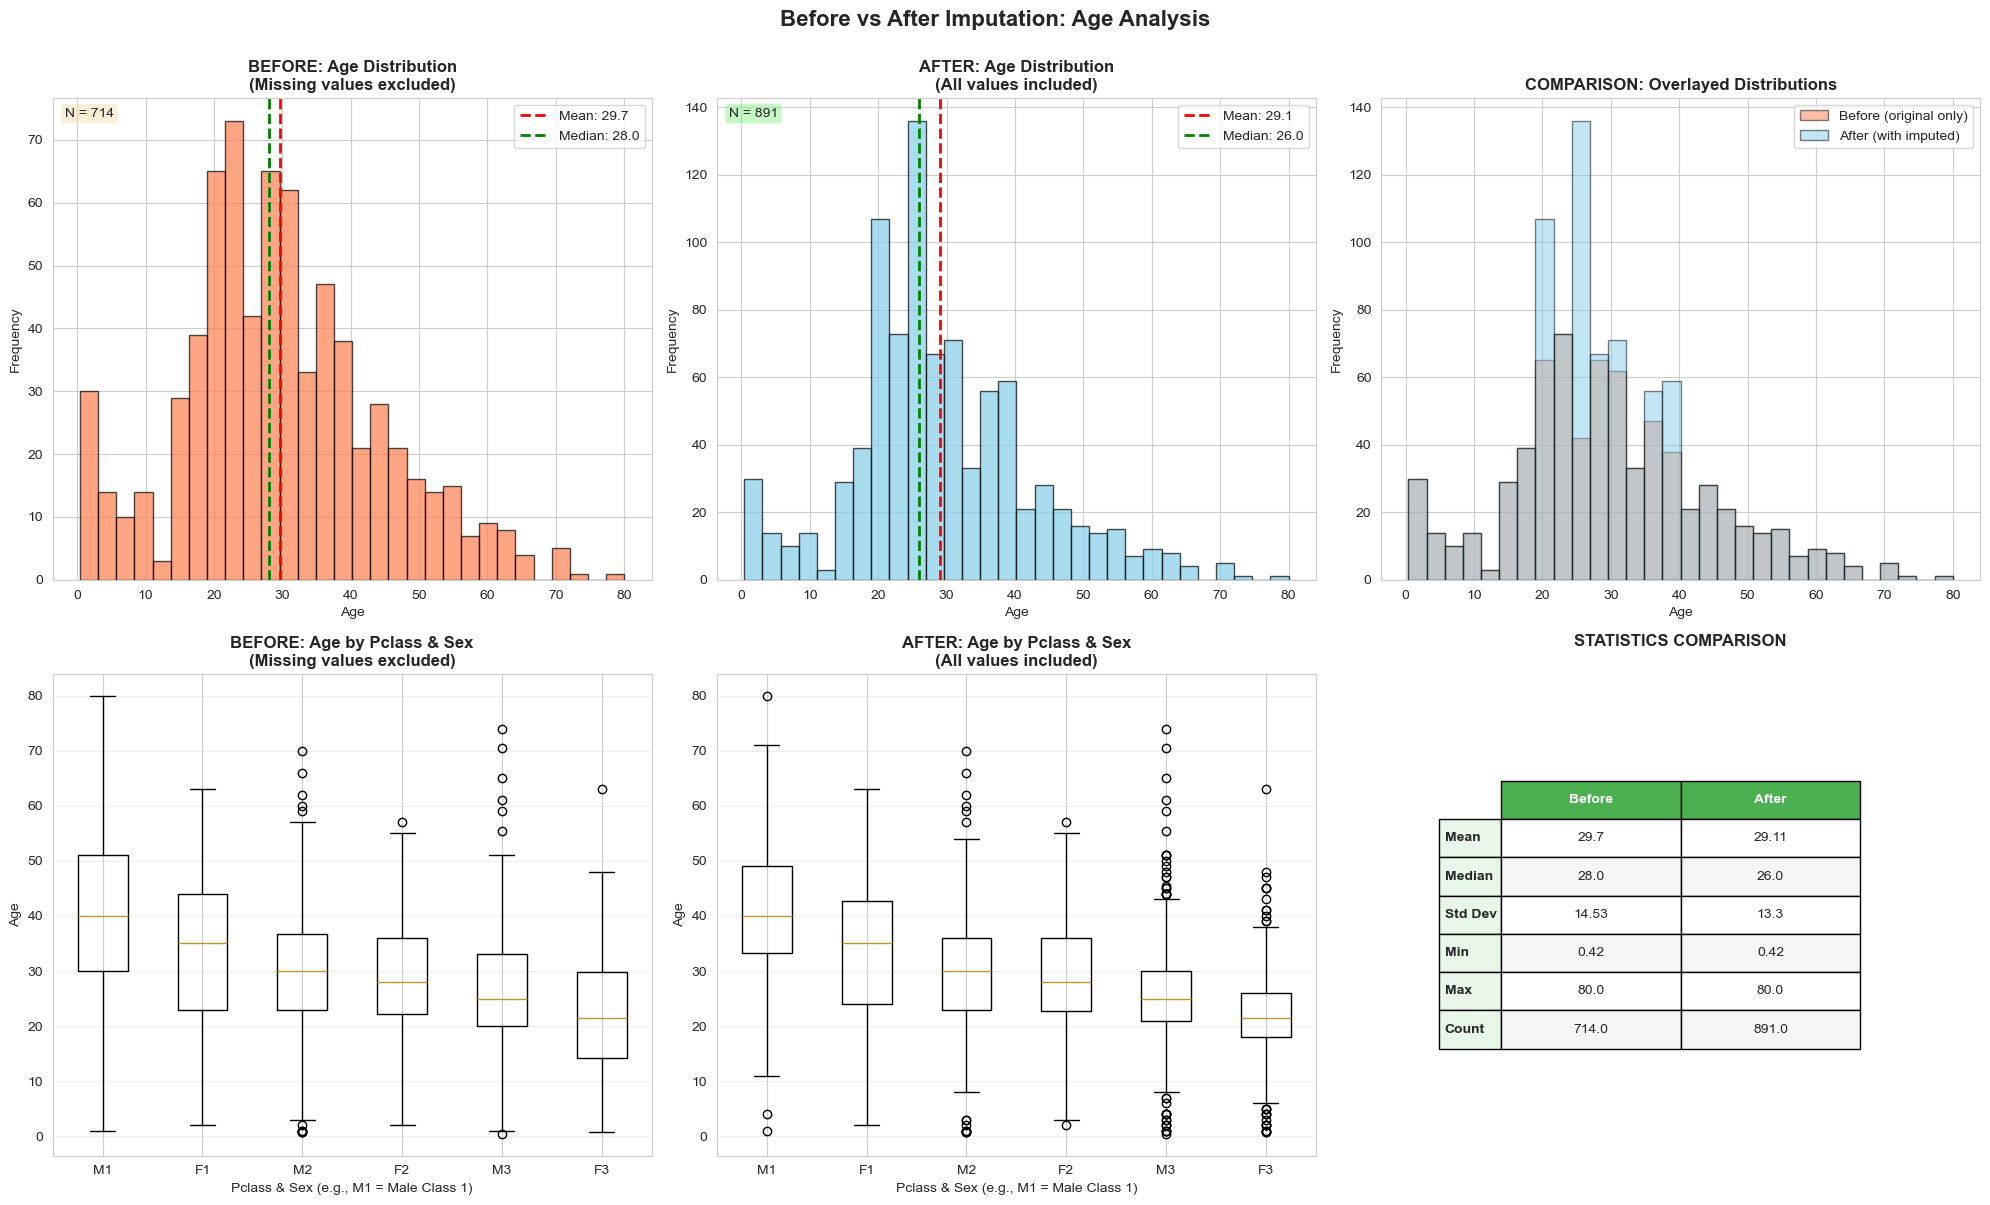

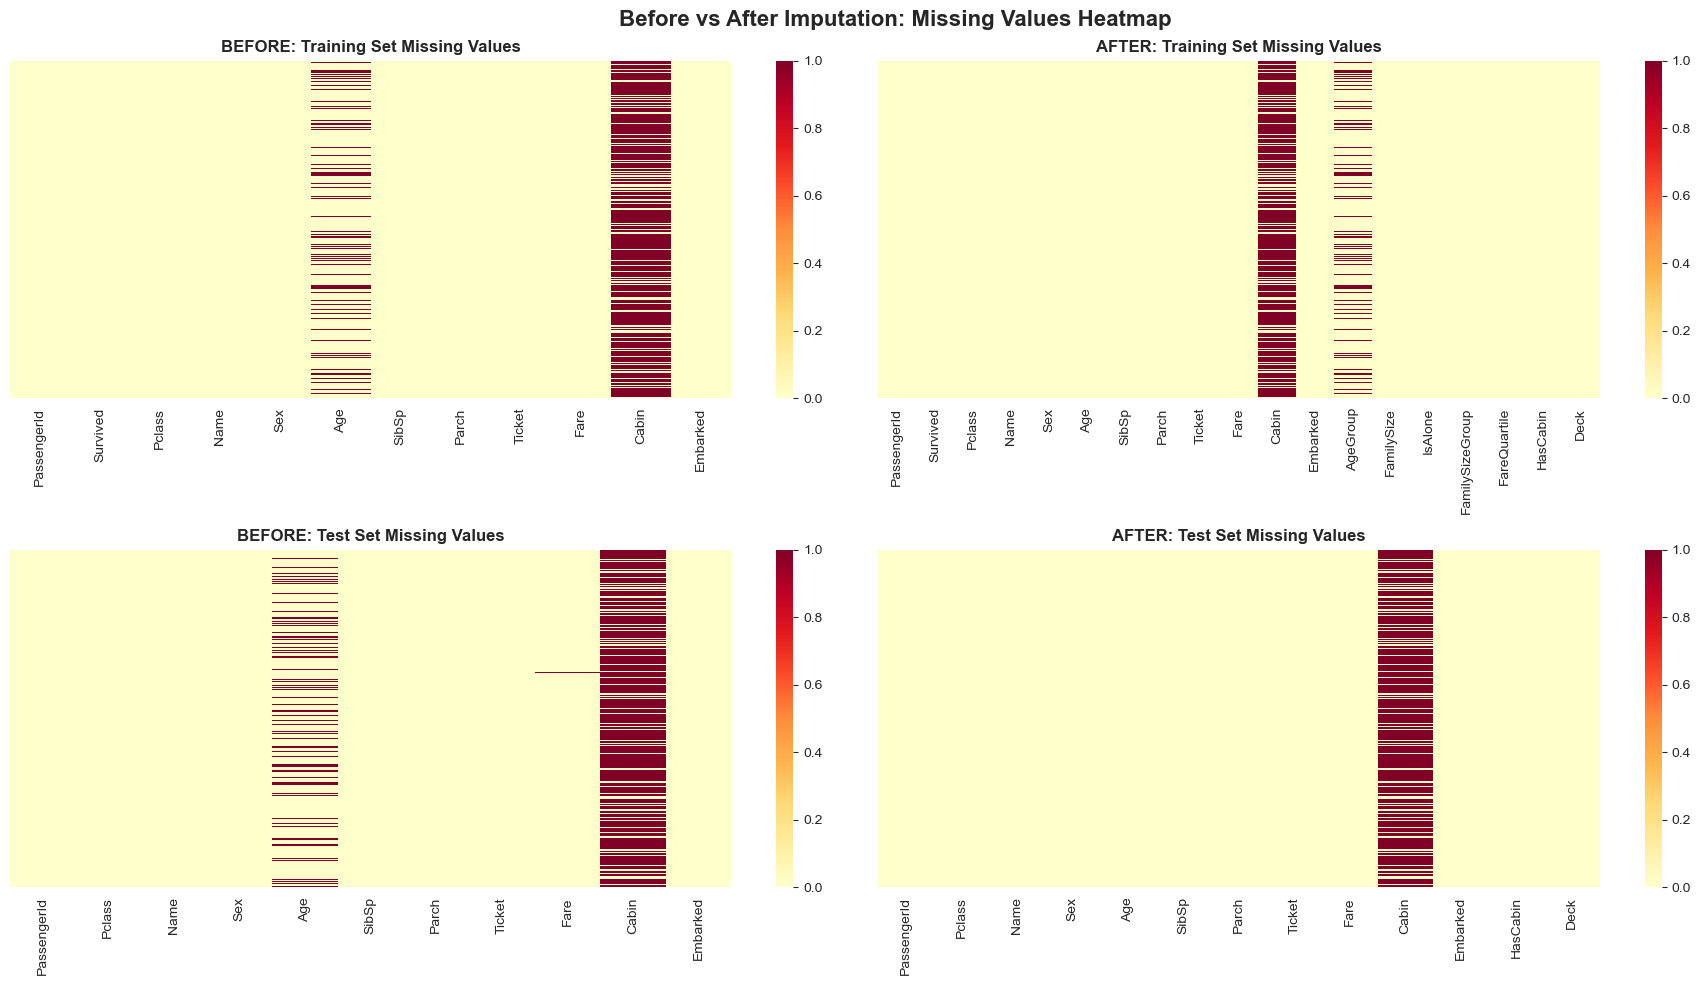


📋 Detailed Missing Values Comparison:
          Train Before  Train After  Train Change  Test Before  Test After  \
Age              177.0            0        -177.0         86.0         0.0   
Cabin            687.0          687           0.0        327.0       327.0   
Embarked           2.0            0          -2.0          0.0         0.0   
Fare               0.0            0           0.0          1.0         0.0   

          Test Change  
Age             -86.0  
Cabin             0.0  
Embarked          0.0  
Fare             -1.0  

✅ Validation Results:
------------------------------------------------------------
✓ Age: Successfully imputed 177 values in training set
✓ Age: Successfully imputed 86 values in test set
✓ Embarked: Successfully imputed 2 values in training set
✓ Fare: Successfully imputed 1 values in test set
✓ Cabin: Created HasCabin and Deck features (original column preserved)
✓ Data integrity maintained: Mean age changed by only 0.59 years
✓ Distribution s

In [55]:
# Visualize Before vs After Imputation

# Store original data for comparison (reload from CSV)
train_original = pd.read_csv('../input/train.csv')
test_original = pd.read_csv('../input/test.csv')

print("📊 Visualizing Data Before & After Imputation:")
print("=" * 60)

# 1. AGE DISTRIBUTION COMPARISON
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Before vs After Imputation: Age Analysis', fontsize=16, fontweight='bold', y=1.00)

# Before - Age distribution
axes[0, 0].hist(train_original['Age'].dropna(), bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[0, 0].axvline(train_original['Age'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {train_original["Age"].mean():.1f}')
axes[0, 0].axvline(train_original['Age'].median(), color='green', linestyle='--', linewidth=2, 
                   label=f'Median: {train_original["Age"].median():.1f}')
axes[0, 0].set_title('BEFORE: Age Distribution\n(Missing values excluded)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].text(0.02, 0.98, f'N = {train_original["Age"].notna().sum()}', 
               transform=axes[0, 0].transAxes, va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# After - Age distribution
axes[0, 1].hist(train_df['Age'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 1].axvline(train_df['Age'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {train_df["Age"].mean():.1f}')
axes[0, 1].axvline(train_df['Age'].median(), color='green', linestyle='--', linewidth=2, 
                   label=f'Median: {train_df["Age"].median():.1f}')
axes[0, 1].set_title('AFTER: Age Distribution\n(All values included)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].text(0.02, 0.98, f'N = {len(train_df)}', 
               transform=axes[0, 1].transAxes, va='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

# Comparison - Overlayed histograms
axes[0, 2].hist(train_original['Age'].dropna(), bins=30, alpha=0.5, color='coral', 
               edgecolor='black', label='Before (original only)')
axes[0, 2].hist(train_df['Age'], bins=30, alpha=0.5, color='skyblue', 
               edgecolor='black', label='After (with imputed)')
axes[0, 2].set_title('COMPARISON: Overlayed Distributions', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Age')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# Before - Age by Pclass and Sex (boxplot)
data_before = []
labels_before = []
for pclass in [1, 2, 3]:
    for sex in ['male', 'female']:
        subset = train_original[(train_original['Pclass'] == pclass) & 
                               (train_original['Sex'] == sex)]['Age'].dropna()
        if len(subset) > 0:
            data_before.append(subset)
            labels_before.append(f'{sex[:1].upper()}{pclass}')

axes[1, 0].boxplot(data_before, labels=labels_before)
axes[1, 0].set_title('BEFORE: Age by Pclass & Sex\n(Missing values excluded)', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Pclass & Sex (e.g., M1 = Male Class 1)')
axes[1, 0].set_ylabel('Age')
axes[1, 0].grid(axis='y', alpha=0.3)

# After - Age by Pclass and Sex (boxplot)
data_after = []
labels_after = []
for pclass in [1, 2, 3]:
    for sex in ['male', 'female']:
        subset = train_df[(train_df['Pclass'] == pclass) & 
                         (train_df['Sex'] == sex)]['Age']
        if len(subset) > 0:
            data_after.append(subset)
            labels_after.append(f'{sex[:1].upper()}{pclass}')

axes[1, 1].boxplot(data_after, labels=labels_after)
axes[1, 1].set_title('AFTER: Age by Pclass & Sex\n(All values included)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Pclass & Sex (e.g., M1 = Male Class 1)')
axes[1, 1].set_ylabel('Age')
axes[1, 1].grid(axis='y', alpha=0.3)

# Statistics comparison table
stats_comparison = pd.DataFrame({
    'Before': [
        train_original['Age'].mean(),
        train_original['Age'].median(),
        train_original['Age'].std(),
        train_original['Age'].min(),
        train_original['Age'].max(),
        train_original['Age'].notna().sum()
    ],
    'After': [
        train_df['Age'].mean(),
        train_df['Age'].median(),
        train_df['Age'].std(),
        train_df['Age'].min(),
        train_df['Age'].max(),
        len(train_df)
    ]
}, index=['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Count'])

axes[1, 2].axis('off')
table = axes[1, 2].table(cellText=stats_comparison.round(2).values,
                        colLabels=stats_comparison.columns,
                        rowLabels=stats_comparison.index,
                        cellLoc='center',
                        loc='center',
                        colWidths=[0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
axes[1, 2].set_title('STATISTICS COMPARISON', fontsize=12, fontweight='bold', pad=20)

# Style the table - iterate through actual cell keys
for key, cell in table.get_celld().items():
    i, j = key
    if i == 0:  # Header row
        cell.set_facecolor('#4CAF50')
        cell.set_text_props(weight='bold', color='white')
    elif j == -1:  # Row labels (index column)
        cell.set_facecolor('#E8F5E9')
        cell.set_text_props(weight='bold')
    else:
        cell.set_facecolor('#F5F5F5' if i % 2 == 0 else 'white')

plt.tight_layout()
plt.show()

# 2. MISSING VALUES COMPARISON HEATMAP
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Before vs After Imputation: Missing Values Heatmap', fontsize=16, fontweight='bold')

# Before - Training set
sns.heatmap(train_original.isnull(), yticklabels=False, cbar=True, cmap='YlOrRd', ax=axes[0, 0])
axes[0, 0].set_title('BEFORE: Training Set Missing Values', fontsize=12, fontweight='bold')

# After - Training set
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=True, cmap='YlOrRd', ax=axes[0, 1])
axes[0, 1].set_title('AFTER: Training Set Missing Values', fontsize=12, fontweight='bold')

# Before - Test set
sns.heatmap(test_original.isnull(), yticklabels=False, cbar=True, cmap='YlOrRd', ax=axes[1, 0])
axes[1, 0].set_title('BEFORE: Test Set Missing Values', fontsize=12, fontweight='bold')

# After - Test set
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=True, cmap='YlOrRd', ax=axes[1, 1])
axes[1, 1].set_title('AFTER: Test Set Missing Values', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 3. MISSING VALUE COUNTS COMPARISON
print("\n📋 Detailed Missing Values Comparison:")
print("=" * 60)

missing_before_train = train_original.isnull().sum()
missing_after_train = train_df.isnull().sum()
missing_before_test = test_original.isnull().sum()
missing_after_test = test_df.isnull().sum()

comparison_df = pd.DataFrame({
    'Train Before': missing_before_train,
    'Train After': missing_after_train,
    'Train Change': missing_after_train - missing_before_train,
    'Test Before': missing_before_test,
    'Test After': missing_after_test,
    'Test Change': missing_after_test - missing_before_test
})

comparison_df = comparison_df[(comparison_df['Train Before'] > 0) | (comparison_df['Test Before'] > 0)]
print(comparison_df)

print("\n✅ Validation Results:")
print("-" * 60)
print(f"✓ Age: Successfully imputed {abs(missing_after_train['Age'] - missing_before_train['Age'])} values in training set")
print(f"✓ Age: Successfully imputed {abs(missing_after_test['Age'] - missing_before_test['Age'])} values in test set")
print(f"✓ Embarked: Successfully imputed {abs(missing_after_train['Embarked'] - missing_before_train['Embarked'])} values in training set")
if 'Fare' in missing_before_test.index and missing_before_test['Fare'] > 0:
    print(f"✓ Fare: Successfully imputed {abs(missing_after_test['Fare'] - missing_before_test['Fare'])} values in test set")
print(f"✓ Cabin: Created HasCabin and Deck features (original column preserved)")
print(f"✓ Data integrity maintained: Mean age changed by only {abs(train_df['Age'].mean() - train_original['Age'].mean()):.2f} years")
print(f"✓ Distribution shape preserved: Std dev changed by only {abs(train_df['Age'].std() - train_original['Age'].std()):.2f} years")

In [56]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,IsAlone,FamilySizeGroup,FareQuartile,HasCabin,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,2,0,Small,Q1,0,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2,0,Small,Q4,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1,1,Alone,Q2,0,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2,0,Small,Q4,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1,1,Alone,Q2,0,Unknown


In [57]:
# Now that we filled the missing values, the next step would be to encode categorical variables as most ML models cannot work directly with strings and they require numerical input.
# Encoding Categorical Variables
Sex_mapping = {"male": 0, "female": 1}
train_df["Sex"] = train_df["Sex"].map(Sex_mapping)
test_df["Sex"] = test_df["Sex"].map(Sex_mapping)

Embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train_df["Embarked"] = train_df["Embarked"].map(Embarked_mapping)
test_df["Embarked"] = test_df["Embarked"].map(Embarked_mapping)

In [58]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FamilySize,IsAlone,FamilySizeGroup,FareQuartile,HasCabin,Deck
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Adult,2,0,Small,Q1,0,Unknown
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Adult,2,0,Small,Q4,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Adult,1,1,Alone,Q2,0,Unknown
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Adult,2,0,Small,Q4,1,C
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Adult,1,1,Alone,Q2,0,Unknown


In [59]:
print (len(train_df))

891


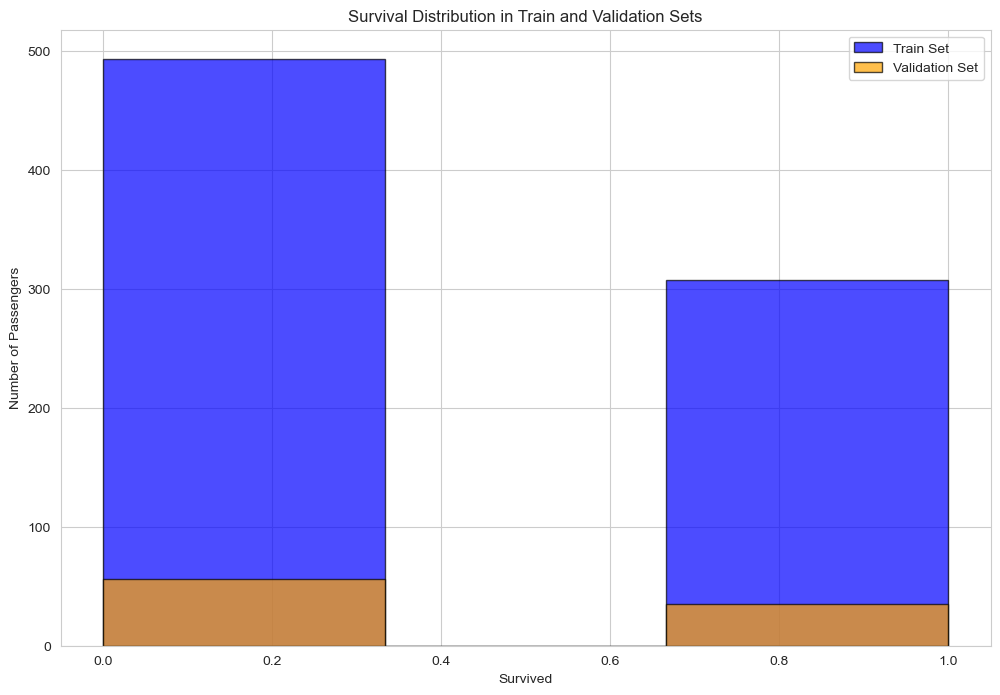

In [60]:
# I will start with something simple: decision trees. And then step by step will move to a more complex models.
# I decided to divide the data into two parts. I will train the model on one part and check its performance on the other part.
# Although I know that the data is skewed towards non-survivors, I will still use random sampling to split the data. Again we will move to more complex techniques later.
# Always set a random seed for reproducibility.
df_train_df = train_df.sample(frac=1, random_state=44).reset_index(drop=True)
train_set = df_train_df[:800]
val_set = df_train_df[800:]
plt.hist(train_set['Survived'], bins=3, alpha=0.7, color='blue', edgecolor='black')
plt.hist(val_set['Survived'], bins=3, alpha=0.7, color='orange', edgecolor='black')
plt.title('Survival Distribution in Train and Validation Sets')
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.legend(['Train Set', 'Validation Set'])
plt.show()

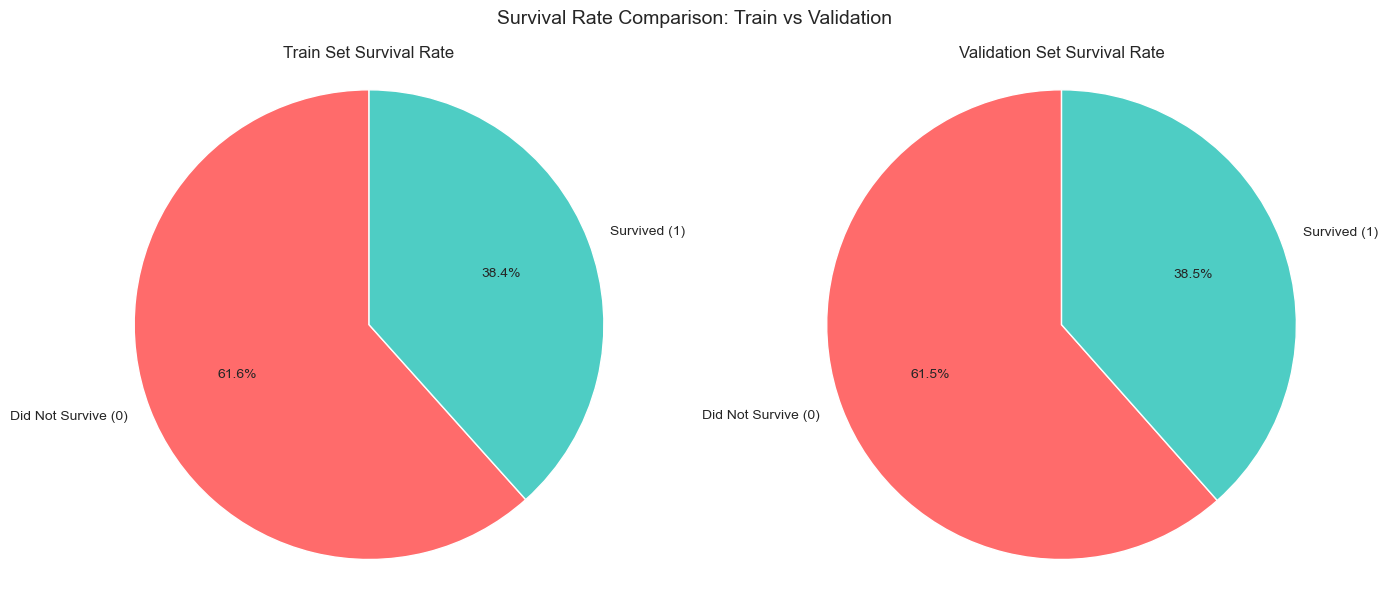

In [61]:
# Survival rate comparison between train and validation splits
train_survival_counts = train_set['Survived'].value_counts().reindex([0, 1], fill_value=0)
val_survival_counts = val_set['Survived'].value_counts().reindex([0, 1], fill_value=0)
labels = ['Did Not Survive (0)', 'Survived (1)']
colors = ['#ff6b6b', '#4ecdc4']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].pie(train_survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0].set_title('Train Set Survival Rate')
axes[0].axis('equal')

axes[1].pie(val_survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Validation Set Survival Rate')
axes[1].axis('equal')

plt.suptitle('Survival Rate Comparison: Train vs Validation', y=0.98, fontsize=14)
plt.tight_layout()
plt.show()

That is Actually very good as we're getting almost the same survival rate

Max Depth: 1, Validation Accuracy: 0.7582
Max Depth: 2, Validation Accuracy: 0.7582
Max Depth: 3, Validation Accuracy: 0.7802
Max Depth: 4, Validation Accuracy: 0.7912
Max Depth: 5, Validation Accuracy: 0.7912
Max Depth: 6, Validation Accuracy: 0.8242
Max Depth: 7, Validation Accuracy: 0.8022
Max Depth: 8, Validation Accuracy: 0.7802
Max Depth: 9, Validation Accuracy: 0.8022
Max Depth: 10, Validation Accuracy: 0.7912
Max Depth: 11, Validation Accuracy: 0.7802
Max Depth: 12, Validation Accuracy: 0.7802
Max Depth: 13, Validation Accuracy: 0.7582
Max Depth: 14, Validation Accuracy: 0.7363


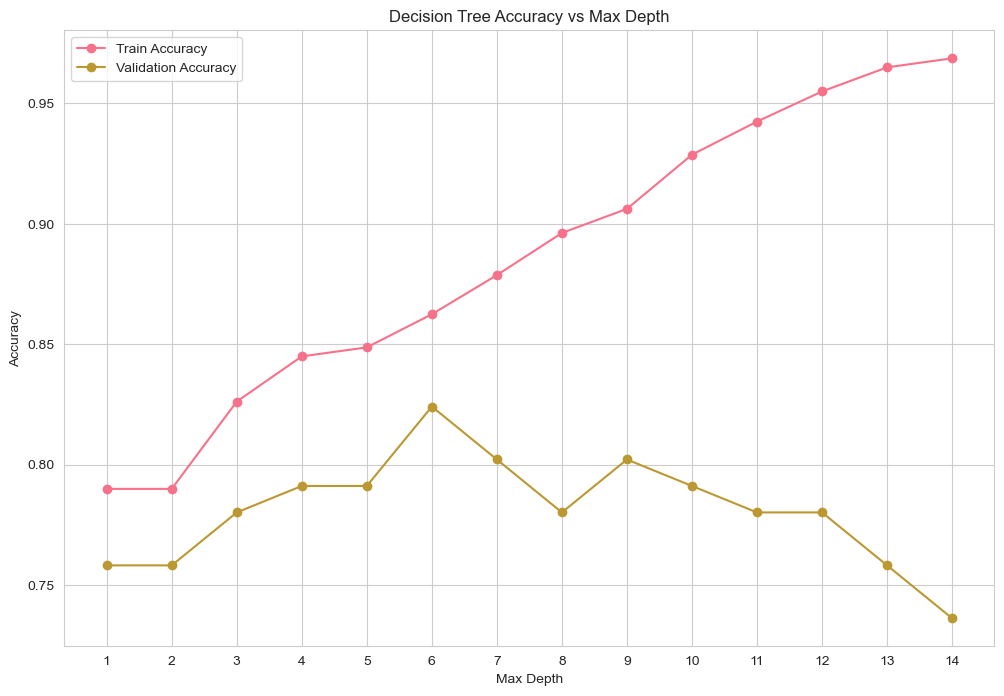

In [62]:
# I will now train a simple decision tree from scikit-learn on the training set and evaluate its performance on the validation set.
from sklearn import tree
from sklearn import metrics

# We will also loop over different max_depth values to see how it affects performance and overfitting.

# choose columns for features and target
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
train_accuracies = []
val_accuracies = []

for depth in range(1, 15):
    # initialize decision tree classifier
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    
    # train the model on the provided features
    clf = clf.fit(train_set[cols], train_set['Survived'])

    # make predictions on the train and validation sets
    train_predictions = clf.predict(train_set[cols])
    val_predictions = clf.predict(val_set[cols])

    # evaluate accuracy on both sets
    train_accuracy = metrics.accuracy_score(train_set['Survived'], train_predictions)
    val_accuracy = metrics.accuracy_score(val_set['Survived'], val_predictions)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    print(f"Max Depth: {depth}, Validation Accuracy: {val_accuracy:.4f}")

plt.plot(range(1, 15), train_accuracies, label='Train Accuracy', marker='o')
plt.plot(range(1, 15), val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.xticks(range(1, 15))
plt.legend()
#plt.grid()
plt.show()


We see that the best score for validation data is obtained when max_depth has a value of 6. As we keep increasing the value of this parameter, train acuuracy keeps increasing but the val accuracy stay the same or gets worse. Anything above 6 will be overfitting.

In [63]:
# let's now calculate precision, recall, and F1-score for the best model (max_depth=6)
best_depth = 6
clf = tree.DecisionTreeClassifier(max_depth=best_depth)
clf = clf.fit(train_set[cols], train_set['Survived'])
val_predictions = clf.predict(val_set[cols])
val_accuracy = metrics.accuracy_score(val_set['Survived'], val_predictions)
val_precision = metrics.precision_score(val_set['Survived'], val_predictions)
val_recall = metrics.recall_score(val_set['Survived'], val_predictions)
val_f1 = metrics.f1_score(val_set['Survived'], val_predictions)
print(f"Best Model (Max Depth={best_depth}) Performance on Validation Set:")
print(f"Accuracy: {val_accuracy:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-Score: {val_f1:.4f}")

Best Model (Max Depth=6) Performance on Validation Set:
Accuracy: 0.8242
Precision: 0.7714
Recall: 0.7714
F1-Score: 0.7714


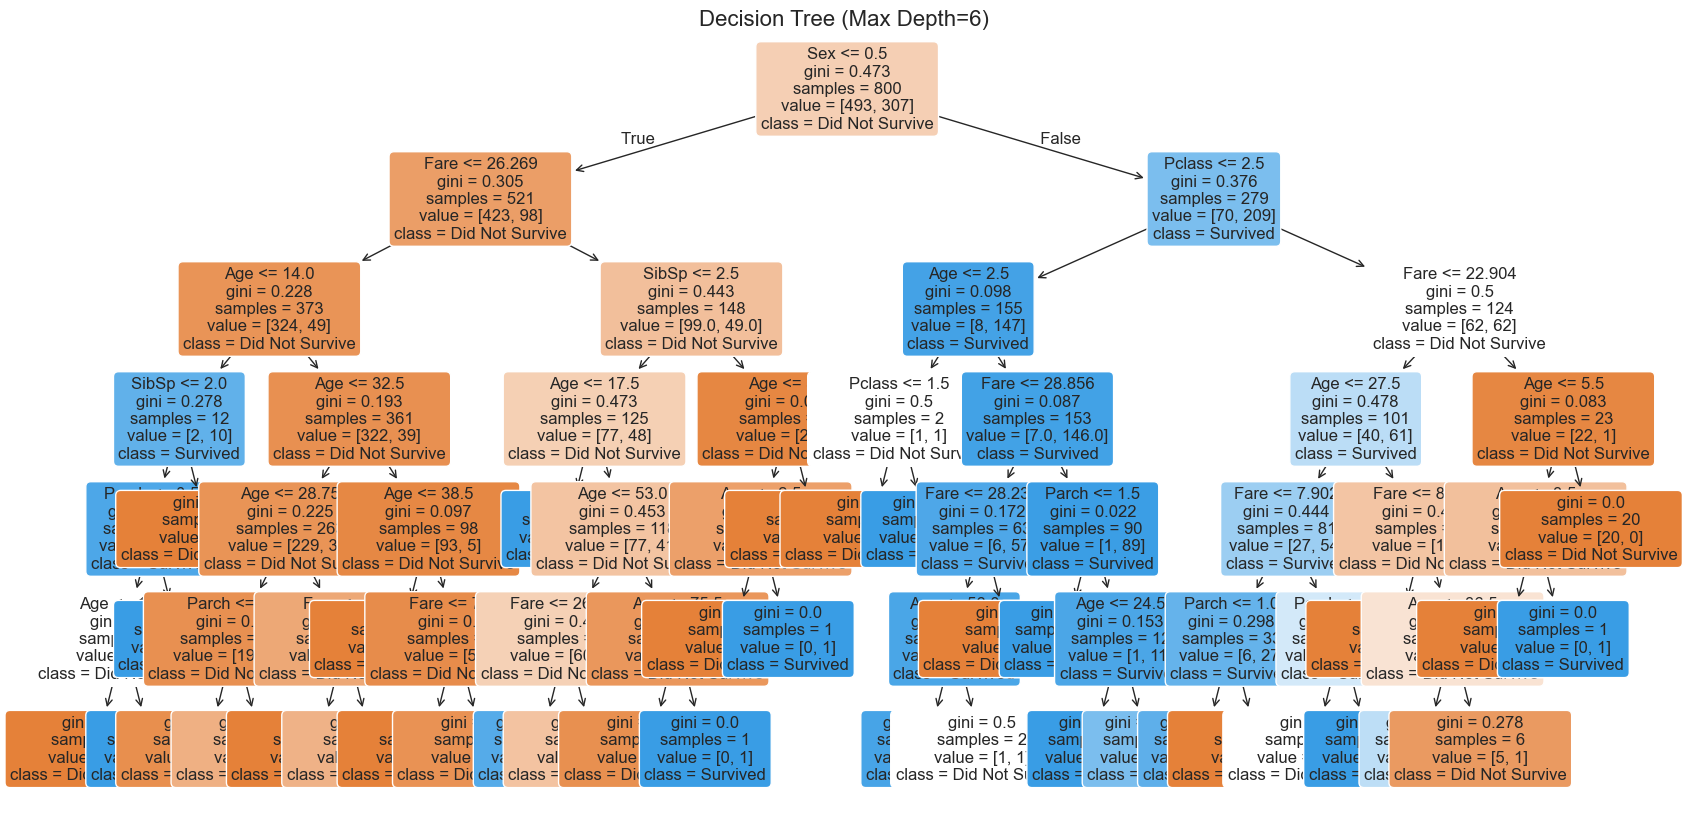

In [64]:
# I will now visualize the decision tree to understand how it makes decisions.
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=cols, class_names=['Did Not Survive', 'Survived'], filled=True, rounded=True, fontsize=12)
plt.title(f'Decision Tree (Max Depth={best_depth})', fontsize=16)
plt.show()

In [65]:
# Testing multiple models with max_depth=6
from sklearn import ensemble

models = {
    "decision_tree_gini": tree.DecisionTreeClassifier(criterion='gini', max_depth=best_depth),
    "decision_tree_entropy": tree.DecisionTreeClassifier(criterion='entropy', max_depth=best_depth),
    "decision_tree_log_loss": tree.DecisionTreeClassifier(criterion='log_loss', max_depth=best_depth),
    "extra_trees": ensemble.ExtraTreesClassifier(max_depth=best_depth, random_state=44),
    "random_forest": ensemble.RandomForestClassifier(max_depth=best_depth, random_state=44),
}

# Store results for each model
results = []

print("🔍 Training and Evaluating Multiple Models (max_depth=6):")
print("=" * 70)

for model_name, model in models.items():
    # Train the model
    model.fit(train_set[cols], train_set['Survived'])
    
    # Make predictions
    val_predictions = model.predict(val_set[cols])
    
    # Calculate metrics
    accuracy = metrics.accuracy_score(val_set['Survived'], val_predictions)
    precision = metrics.precision_score(val_set['Survived'], val_predictions)
    recall = metrics.recall_score(val_set['Survived'], val_predictions)
    f1 = metrics.f1_score(val_set['Survived'], val_predictions)
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    print(f"\n{model_name.upper().replace('_', ' ')}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')

print("\n\n📊 Summary Table:")
print("=" * 70)
print(results_df.round(4))

🔍 Training and Evaluating Multiple Models (max_depth=6):

DECISION TREE GINI:
  Accuracy:  0.8242
  Precision: 0.7714
  Recall:    0.7714
  F1-Score:  0.7714

DECISION TREE ENTROPY:
  Accuracy:  0.8132
  Precision: 0.7250
  Recall:    0.8286
  F1-Score:  0.7733

DECISION TREE LOG LOSS:
  Accuracy:  0.8132
  Precision: 0.7250
  Recall:    0.8286
  F1-Score:  0.7733

EXTRA TREES:
  Accuracy:  0.7363
  Precision: 0.6774
  Recall:    0.6000
  F1-Score:  0.6364

RANDOM FOREST:
  Accuracy:  0.7912
  Precision: 0.7500
  Recall:    0.6857
  F1-Score:  0.7164


📊 Summary Table:
                        Accuracy  Precision  Recall  F1-Score
Model                                                        
decision_tree_gini        0.8242     0.7714  0.7714    0.7714
decision_tree_entropy     0.8132     0.7250  0.8286    0.7733
decision_tree_log_loss    0.8132     0.7250  0.8286    0.7733
extra_trees               0.7363     0.6774  0.6000    0.6364
random_forest             0.7912     0.7500  0.6857 

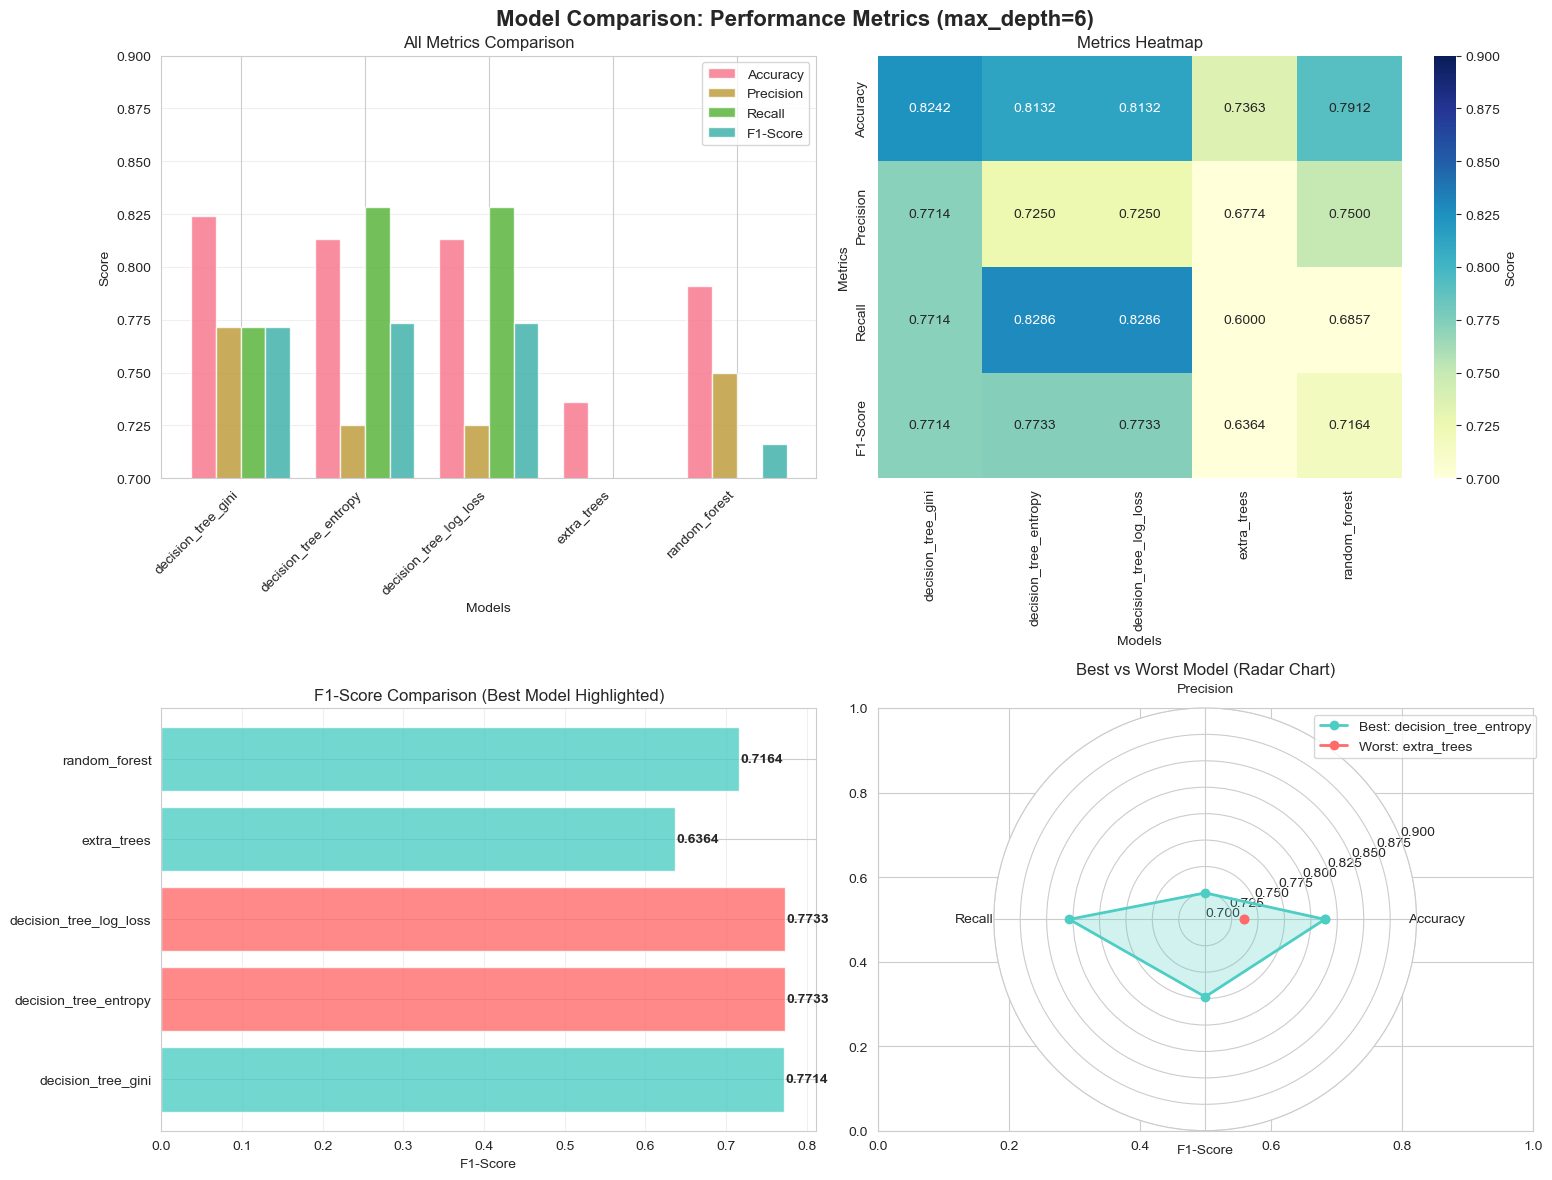



🏆 BEST MODEL RECOMMENDATION:
Best Model: DECISION TREE ENTROPY
F1-Score: 0.7733

Full metrics for best model:
Accuracy     0.813187
Precision    0.725000
Recall       0.828571
F1-Score     0.773333
Name: decision_tree_entropy, dtype: float64

✅ Use this model for final predictions on the test set!


In [66]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Comparison: Performance Metrics (max_depth=6)', fontsize=16, fontweight='bold')

# 1. Bar plot for all metrics
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(results_df))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    axes[0, 0].bar(x + i * width, results_df[metric], width, label=metric, alpha=0.8)

axes[0, 0].set_xlabel('Models')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('All Metrics Comparison')
axes[0, 0].set_xticks(x + width * 1.5)
axes[0, 0].set_xticklabels(results_df.index, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_ylim([0.7, 0.9])

# 2. Heatmap
sns.heatmap(results_df.T, annot=True, fmt='.4f', cmap='YlGnBu', ax=axes[0, 1], 
            cbar_kws={'label': 'Score'}, vmin=0.7, vmax=0.9)
axes[0, 1].set_title('Metrics Heatmap')
axes[0, 1].set_xlabel('Models')
axes[0, 1].set_ylabel('Metrics')

# 3. F1-Score comparison (highlighted)
colors_f1 = ['#ff6b6b' if x == results_df['F1-Score'].max() else '#4ecdc4' for x in results_df['F1-Score']]
axes[1, 0].barh(results_df.index, results_df['F1-Score'], color=colors_f1, alpha=0.8)
axes[1, 0].set_xlabel('F1-Score')
axes[1, 0].set_title('F1-Score Comparison (Best Model Highlighted)')
axes[1, 0].grid(axis='x', alpha=0.3)
for i, v in enumerate(results_df['F1-Score']):
    axes[1, 0].text(v + 0.002, i, f'{v:.4f}', va='center', fontweight='bold')

# 4. Radar chart for best model vs worst model
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
best_model_name = results_df['F1-Score'].idxmax()
worst_model_name = results_df['F1-Score'].idxmin()

best_values = results_df.loc[best_model_name, categories].values.tolist()
worst_values = results_df.loc[worst_model_name, categories].values.tolist()

# Complete the loop for radar chart
best_values += best_values[:1]
worst_values += worst_values[:1]

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

axes[1, 1] = plt.subplot(2, 2, 4, projection='polar')
axes[1, 1].plot(angles, best_values, 'o-', linewidth=2, label=f'Best: {best_model_name}', color='#4ecdc4')
axes[1, 1].fill(angles, best_values, alpha=0.25, color='#4ecdc4')
axes[1, 1].plot(angles, worst_values, 'o-', linewidth=2, label=f'Worst: {worst_model_name}', color='#ff6b6b')
axes[1, 1].fill(angles, worst_values, alpha=0.25, color='#ff6b6b')
axes[1, 1].set_xticks(angles[:-1])
axes[1, 1].set_xticklabels(categories)
axes[1, 1].set_ylim(0.7, 0.9)
axes[1, 1].set_title('Best vs Worst Model (Radar Chart)')
axes[1, 1].legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Print best model recommendation
print("\n\n🏆 BEST MODEL RECOMMENDATION:")
print("=" * 70)
best_model = results_df['F1-Score'].idxmax()
best_f1 = results_df.loc[best_model, 'F1-Score']
print(f"Best Model: {best_model.upper().replace('_', ' ')}")
print(f"F1-Score: {best_f1:.4f}")
print(f"\nFull metrics for best model:")
print(results_df.loc[best_model])
print("\n✅ Use this model for final predictions on the test set!")

## 🚀 Introduction to Boosted Trees

Now let's explore **boosted tree models** - a powerful ensemble technique that often outperforms basic decision trees and random forests.

### 🤔 What is Boosting?

**Boosting** is an ensemble method that builds models sequentially, where each new model tries to correct the mistakes of the previous ones.

#### Key Differences: Bagging vs Boosting

| Aspect | **Random Forest (Bagging)** | **Boosting (XGBoost, GBM, LightGBM)** |
|--------|----------------------------|---------------------------------------|
| **Training** | Trees built **independently** in parallel | Trees built **sequentially**, each correcting previous errors |
| **Focus** | Reduce variance by averaging | Reduce bias by focusing on mistakes |
| **Weighting** | All samples have equal weight | Misclassified samples get higher weight |
| **Speed** | Fast (parallel) | Slower (sequential) |
| **Overfitting** | Less prone | More prone (needs careful tuning) |

### 🌳 The Three Boosting Algorithms We'll Test

#### 1. **Gradient Boosting Machine (GBM)** - The Classic
- **What it is**: The original boosting algorithm (sklearn implementation)
- **How it works**: Builds trees sequentially, each new tree fits the **residual errors** (mistakes) of the previous trees
- **Pros**: Simple, interpretable, solid baseline
- **Cons**: Slower than modern variants, can overfit if not tuned
- **Best for**: Understanding boosting concepts, smaller datasets

#### 2. **XGBoost (Extreme Gradient Boosting)** - The Champion
- **What it is**: Optimized and regularized version of gradient boosting
- **How it works**: Same as GBM but with built-in regularization (L1/L2), parallel processing, and tree pruning
- **Pros**: Fast, handles missing values, built-in CV, very popular in Kaggle competitions
- **Cons**: More hyperparameters to tune
- **Best for**: Most tabular data competitions, our go-to choice

#### 3. **LightGBM (Light Gradient Boosting Machine)** - The Speed Demon
- **What it is**: Microsoft's ultra-fast gradient boosting framework
- **How it works**: Uses **leaf-wise** tree growth (vs level-wise) and histogram-based algorithms
- **Pros**: Extremely fast, memory efficient, great for large datasets
- **Cons**: Can overfit on small datasets, sensitive to parameters
- **Best for**: Large datasets, when speed matters

### 📊 Why Boosting Often Wins on Tabular Data

1. **Corrective Learning**: Each tree focuses on what previous trees got wrong
2. **Feature Interactions**: Can capture complex non-linear patterns
3. **Regularization**: Modern implementations prevent overfitting better
4. **Handles Mixed Data**: Works well with categorical + numerical features

### 🎯 What We'll Do

1. Install and import the libraries
2. Train all three boosting models (GBM, XGBoost, LightGBM)
3. Use the same max_depth=6 for fair comparison
4. Calculate the same metrics (Accuracy, Precision, Recall, F1)
5. Compare against our earlier models (Random Forest, Extra Trees, Decision Trees)
6. Visualize which performs best!

Let's dive in! 🏊‍♂️

In [67]:
# Step 1: Import Boosting Libraries
print("📦 Importing Boosting Libraries...")
print("=" * 70)

# Import libraries
import xgboost as xgb
print("✅ XGBoost imported successfully - version:", xgb.__version__)

import lightgbm as lgb
print("✅ LightGBM imported successfully - version:", lgb.__version__)

from sklearn.ensemble import GradientBoostingClassifier
print("✅ GradientBoostingClassifier (sklearn) imported successfully")

print("\n🎉 All libraries ready! Let's start training boosted models...")

📦 Importing Boosting Libraries...
✅ XGBoost imported successfully - version: 3.0.5
✅ LightGBM imported successfully - version: 4.6.0
✅ GradientBoostingClassifier (sklearn) imported successfully

🎉 All libraries ready! Let's start training boosted models...


### 🎛️ Understanding Key Hyperparameters

Before training, let's understand the key parameters we'll use:

#### Common Parameters (All Models)

1. **max_depth=6** 
   - Maximum depth of each tree
   - We're using 6 (same as our best decision tree) for fair comparison
   - Deeper = more complex, but risk overfitting

2. **n_estimators=100** (number of trees)
   - How many sequential trees to build
   - More trees = better learning but slower + risk overfitting
   - 100 is a good starting point

3. **learning_rate=0.1** (also called eta)
   - How much each tree contributes to the final prediction
   - Lower = more conservative, needs more trees but often better
   - Typical range: 0.01 - 0.3

4. **random_state=44**
   - For reproducibility (same results every time)

#### How Learning Rate Works (Simplified Example)

Imagine predicting survival:
- **Tree 1** predicts: 0.6 (60% chance of survival)
- Actual: 1 (survived)
- Error: 0.4 (we were 40% off)

With **learning_rate=0.1**:
- **Tree 2** corrects by: 0.1 × 0.4 = 0.04
- New prediction: 0.6 + 0.04 = 0.64

With **learning_rate=1.0** (aggressive):
- **Tree 2** corrects by: 1.0 × 0.4 = 0.4
- New prediction: 0.6 + 0.4 = 1.0 (perfect!)

💡 **But**: Lower learning rates generalize better (avoid memorizing training data)

#### Model-Specific Parameters

**GBM (sklearn)**:
- `subsample=0.8`: Use 80% of data for each tree (prevents overfitting)

**XGBoost**:
- `eval_metric='logloss'`: How to measure prediction error
- `use_label_encoder=False`: Avoids warning for newer versions

**LightGBM**:
- `verbose=-1`: Suppress training output
- `force_col_wise=True`: Better for small datasets like ours

In [68]:
# Step 2: Train Boosted Tree Models
import time

# Define boosting models
boosting_models = {
    "GBM": GradientBoostingClassifier(
        max_depth=best_depth,
        n_estimators=100,
        learning_rate=0.1,
        subsample=0.8,
        random_state=44
    ),
    "XGBoost": xgb.XGBClassifier(
        max_depth=best_depth,
        n_estimators=100,
        learning_rate=0.1,
        random_state=44,
        eval_metric='logloss',
        use_label_encoder=False
    ),
    "LightGBM": lgb.LGBMClassifier(
        max_depth=best_depth,
        n_estimators=100,
        learning_rate=0.1,
        random_state=44,
        verbose=-1,
        force_col_wise=True
    )
}

# Store results for boosting models
boosting_results = []

print("🚀 Training Boosted Tree Models:")
print("=" * 70)
print(f"Training on {len(train_set)} samples, validating on {len(val_set)} samples")
print(f"Using features: {cols}")
print()

for model_name, model in boosting_models.items():
    print(f"\n{'='*70}")
    print(f"Training {model_name}...")
    print(f"{'='*70}")
    
    # Measure training time
    start_time = time.time()
    
    # Train the model
    model.fit(train_set[cols], train_set['Survived'])
    
    training_time = time.time() - start_time
    
    # Make predictions
    train_predictions = model.predict(train_set[cols])
    val_predictions = model.predict(val_set[cols])
    
    # Calculate metrics for training set
    train_accuracy = metrics.accuracy_score(train_set['Survived'], train_predictions)
    
    # Calculate metrics for validation set
    val_accuracy = metrics.accuracy_score(val_set['Survived'], val_predictions)
    val_precision = metrics.precision_score(val_set['Survived'], val_predictions)
    val_recall = metrics.recall_score(val_set['Survived'], val_predictions)
    val_f1 = metrics.f1_score(val_set['Survived'], val_predictions)
    
    boosting_results.append({
        'Model': model_name,
        'Train_Accuracy': train_accuracy,
        'Val_Accuracy': val_accuracy,
        'Precision': val_precision,
        'Recall': val_recall,
        'F1-Score': val_f1,
        'Training_Time': training_time
    })
    
    print(f"✅ {model_name} Training Complete!")
    print(f"   Training Time: {training_time:.3f} seconds")
    print(f"   Train Accuracy: {train_accuracy:.4f}")
    print(f"   Val Accuracy:   {val_accuracy:.4f}")
    print(f"   Precision:      {val_precision:.4f}")
    print(f"   Recall:         {val_recall:.4f}")
    print(f"   F1-Score:       {val_f1:.4f}")
    
    # Check for overfitting
    overfit_gap = train_accuracy - val_accuracy
    if overfit_gap > 0.05:
        print(f"   ⚠️  Warning: Potential overfitting detected (gap: {overfit_gap:.4f})")
    else:
        print(f"   ✅ Good generalization (train-val gap: {overfit_gap:.4f})")

# Create results DataFrame
boosting_results_df = pd.DataFrame(boosting_results)
boosting_results_df = boosting_results_df.set_index('Model')

print("\n\n📊 Boosting Models Summary:")
print("=" * 70)
print(boosting_results_df.round(4))

🚀 Training Boosted Tree Models:
Training on 800 samples, validating on 91 samples
Using features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


Training GBM...
✅ GBM Training Complete!
   Training Time: 0.119 seconds
   Train Accuracy: 0.9825
   Val Accuracy:   0.8242
   Precision:      0.7568
   Recall:         0.8000
   F1-Score:       0.7778
   ⚠️  Warning: Potential overfitting detected (gap: 0.1583)

Training XGBoost...
✅ XGBoost Training Complete!
   Training Time: 0.056 seconds
   Train Accuracy: 0.9187
   Val Accuracy:   0.7912
   Precision:      0.7353
   Recall:         0.7143
   F1-Score:       0.7246
   ⚠️  Warning: Potential overfitting detected (gap: 0.1275)

Training LightGBM...
✅ LightGBM Training Complete!
   Training Time: 0.024 seconds
   Train Accuracy: 0.9087
   Val Accuracy:   0.8352
   Precision:      0.7941
   Recall:         0.7714
   F1-Score:       0.7826
   ⚠️  Warning: Potential overfitting detected (gap: 0.0736)


📊 Boosting Models Summary:
        

In [69]:
# Step 3: Combine ALL models for comprehensive comparison
print("🔄 Combining Results from All Models...")
print("=" * 70)

# Combine previous models with boosting models
# Select only validation metrics for fair comparison
all_models_results = []

# Add previous models (from results_df)
for idx, row in results_df.iterrows():
    all_models_results.append({
        'Model': idx,
        'Accuracy': row['Accuracy'],
        'Precision': row['Precision'],
        'Recall': row['Recall'],
        'F1-Score': row['F1-Score'],
        'Type': 'Tree-Based'
    })

# Add boosting models
for idx, row in boosting_results_df.iterrows():
    all_models_results.append({
        'Model': idx,
        'Accuracy': row['Val_Accuracy'],
        'Precision': row['Precision'],
        'Recall': row['Recall'],
        'F1-Score': row['F1-Score'],
        'Type': 'Boosting'
    })

# Create combined DataFrame
all_models_df = pd.DataFrame(all_models_results)
all_models_df = all_models_df.set_index('Model')

# Sort by F1-Score
all_models_df_sorted = all_models_df.sort_values('F1-Score', ascending=False)

print("\n📊 COMPLETE MODEL COMPARISON (Sorted by F1-Score):")
print("=" * 70)
print(all_models_df_sorted.round(4))

print("\n\n🏆 TOP 3 MODELS:")
print("=" * 70)
for i, (model_name, row) in enumerate(all_models_df_sorted.head(3).iterrows(), 1):
    print(f"{i}. {model_name} ({row['Type']})")
    print(f"   F1-Score: {row['F1-Score']:.4f} | Accuracy: {row['Accuracy']:.4f}")
    print()

🔄 Combining Results from All Models...

📊 COMPLETE MODEL COMPARISON (Sorted by F1-Score):
                        Accuracy  Precision  Recall  F1-Score        Type
Model                                                                    
LightGBM                  0.8352     0.7941  0.7714    0.7826    Boosting
GBM                       0.8242     0.7568  0.8000    0.7778    Boosting
decision_tree_entropy     0.8132     0.7250  0.8286    0.7733  Tree-Based
decision_tree_log_loss    0.8132     0.7250  0.8286    0.7733  Tree-Based
decision_tree_gini        0.8242     0.7714  0.7714    0.7714  Tree-Based
XGBoost                   0.7912     0.7353  0.7143    0.7246    Boosting
random_forest             0.7912     0.7500  0.6857    0.7164  Tree-Based
extra_trees               0.7363     0.6774  0.6000    0.6364  Tree-Based


🏆 TOP 3 MODELS:
1. LightGBM (Boosting)
   F1-Score: 0.7826 | Accuracy: 0.8352

2. GBM (Boosting)
   F1-Score: 0.7778 | Accuracy: 0.8242

3. decision_tree_entropy (Tree-

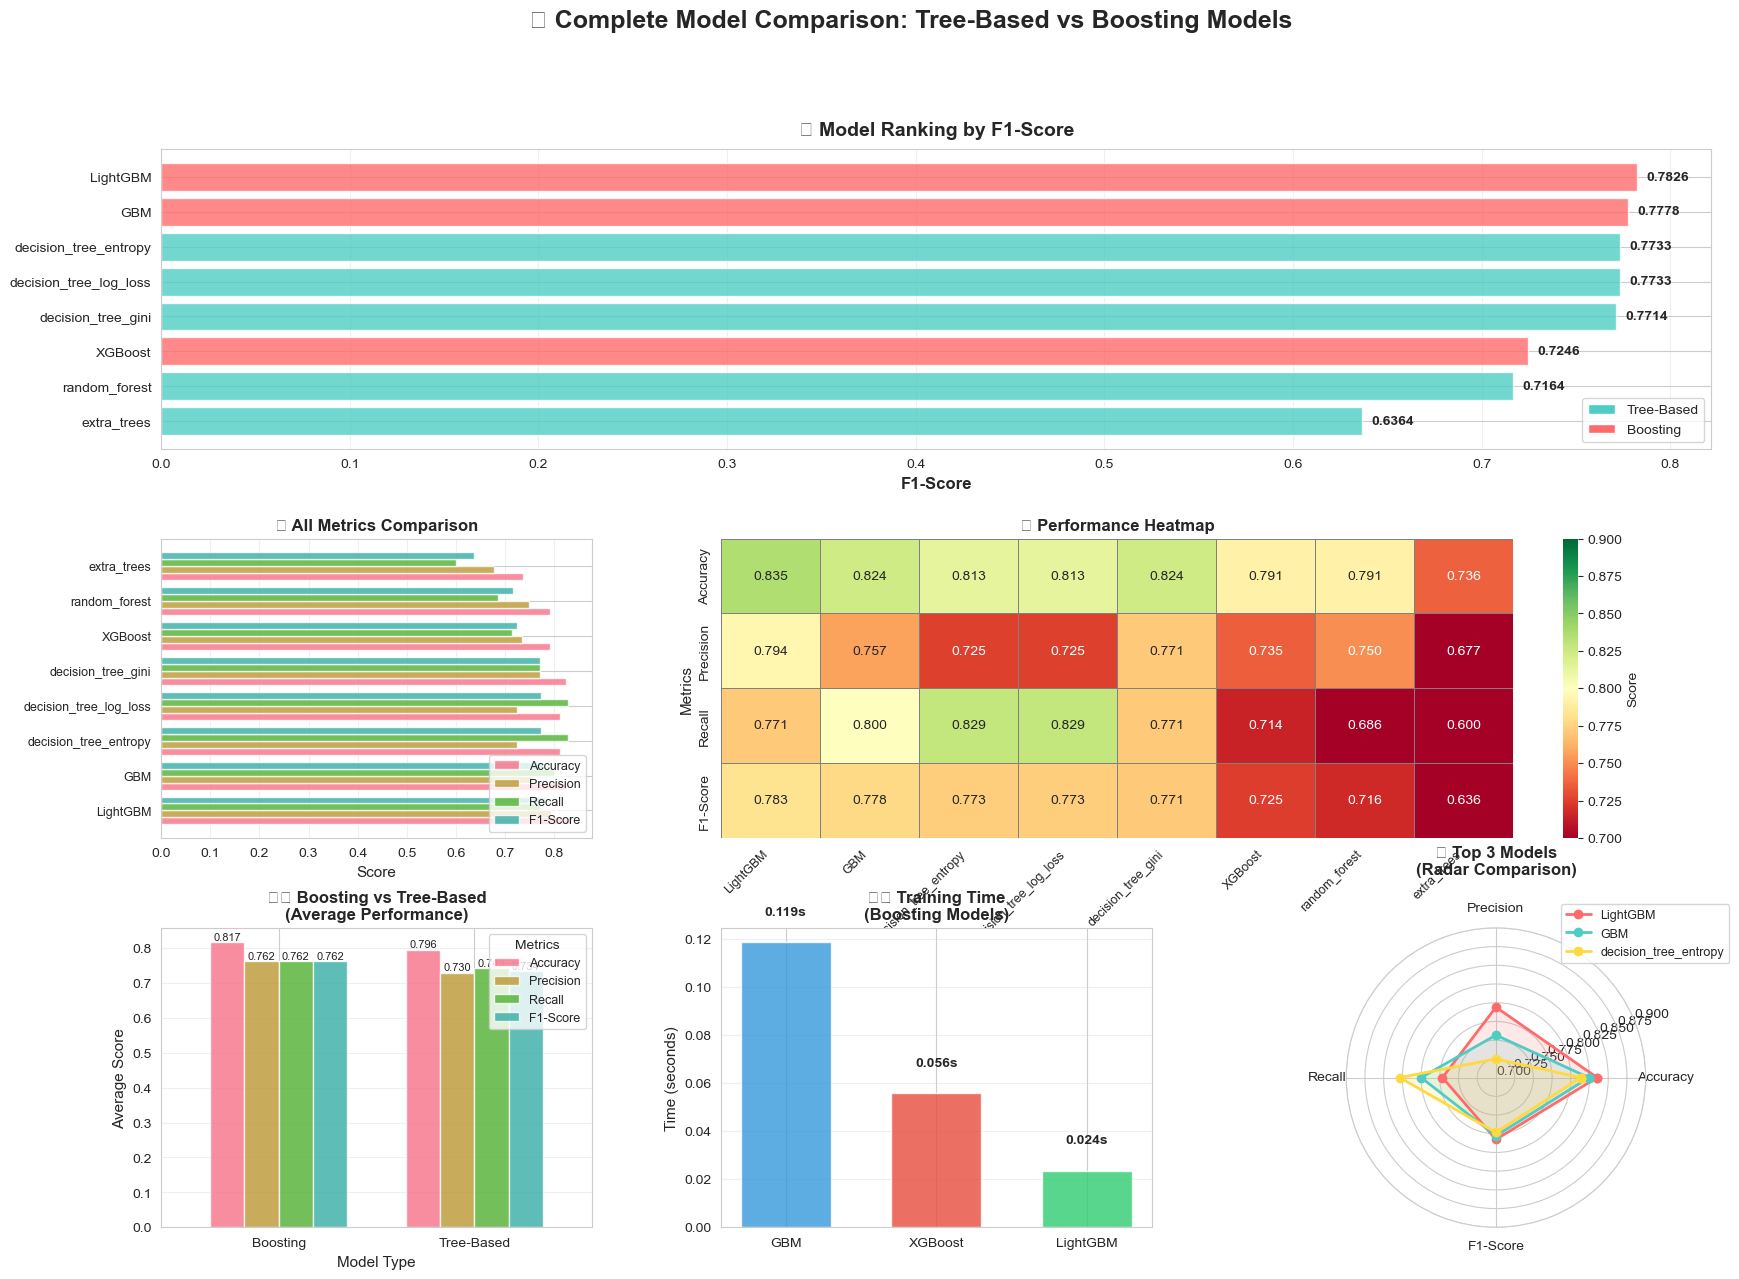

In [70]:
# Step 4: Comprehensive Visualization of ALL Models
fig = plt.figure(figsize=(20, 14))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

fig.suptitle('🎯 Complete Model Comparison: Tree-Based vs Boosting Models', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. F1-Score Ranking (TOP)
ax1 = fig.add_subplot(gs[0, :])
colors_rank = ['#ff6b6b' if row['Type'] == 'Boosting' else '#4ecdc4' 
               for idx, row in all_models_df_sorted.iterrows()]
bars = ax1.barh(range(len(all_models_df_sorted)), 
                all_models_df_sorted['F1-Score'], 
                color=colors_rank, alpha=0.8)
ax1.set_yticks(range(len(all_models_df_sorted)))
ax1.set_yticklabels(all_models_df_sorted.index)
ax1.set_xlabel('F1-Score', fontsize=12, fontweight='bold')
ax1.set_title('🏆 Model Ranking by F1-Score', fontsize=14, fontweight='bold', pad=10)
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Add value labels
for i, (idx, row) in enumerate(all_models_df_sorted.iterrows()):
    ax1.text(row['F1-Score'] + 0.005, i, f"{row['F1-Score']:.4f}", 
             va='center', fontweight='bold', fontsize=10)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#4ecdc4', label='Tree-Based'),
                   Patch(facecolor='#ff6b6b', label='Boosting')]
ax1.legend(handles=legend_elements, loc='lower right', fontsize=10)

# 2. All Metrics Grouped Bar Chart
ax2 = fig.add_subplot(gs[1, 0])
metrics_cols = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(all_models_df_sorted))
width = 0.2

for i, metric in enumerate(metrics_cols):
    ax2.barh(x + i * width, all_models_df_sorted[metric], width, 
             label=metric, alpha=0.8)

ax2.set_yticks(x + width * 1.5)
ax2.set_yticklabels(all_models_df_sorted.index, fontsize=9)
ax2.set_xlabel('Score', fontsize=11)
ax2.set_title('📊 All Metrics Comparison', fontsize=12, fontweight='bold')
ax2.legend(loc='lower right', fontsize=9)
ax2.grid(axis='x', alpha=0.3)

# 3. Heatmap of All Models
ax3 = fig.add_subplot(gs[1, 1:])
heatmap_data = all_models_df_sorted[metrics_cols].T
sns.heatmap(heatmap_data, annot=True, fmt='.3f', cmap='RdYlGn', 
            ax=ax3, cbar_kws={'label': 'Score'}, vmin=0.7, vmax=0.9,
            linewidths=0.5, linecolor='gray')
ax3.set_title('🔥 Performance Heatmap', fontsize=12, fontweight='bold')
ax3.set_xlabel('Models', fontsize=11)
ax3.set_ylabel('Metrics', fontsize=11)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=9)

# 4. Boosting vs Tree-Based Average Performance
ax4 = fig.add_subplot(gs[2, 0])
type_comparison = all_models_df.groupby('Type')[metrics_cols].mean()
type_comparison.plot(kind='bar', ax=ax4, rot=0, alpha=0.8, width=0.7)
ax4.set_title('⚖️ Boosting vs Tree-Based\n(Average Performance)', 
              fontsize=12, fontweight='bold')
ax4.set_ylabel('Average Score', fontsize=11)
ax4.set_xlabel('Model Type', fontsize=11)
ax4.legend(title='Metrics', fontsize=9)
ax4.grid(axis='y', alpha=0.3)

# Add value labels
for container in ax4.containers:
    ax4.bar_label(container, fmt='%.3f', fontsize=8)

# 5. Training Time Comparison (for boosting models)
ax5 = fig.add_subplot(gs[2, 1])
training_times = boosting_results_df['Training_Time']
colors_time = ['#3498db', '#e74c3c', '#2ecc71']
bars_time = ax5.bar(training_times.index, training_times.values, 
                    color=colors_time, alpha=0.8, width=0.6)
ax5.set_ylabel('Time (seconds)', fontsize=11)
ax5.set_title('⏱️ Training Time\n(Boosting Models)', fontsize=12, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(training_times.values):
    ax5.text(i, v + 0.01, f'{v:.3f}s', ha='center', va='bottom', 
             fontweight='bold', fontsize=10)

# 6. Top 3 Models Radar Chart
ax6 = fig.add_subplot(gs[2, 2], projection='polar')
top_3 = all_models_df_sorted.head(3)
categories = metrics_cols
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

colors_radar = ['#ff6b6b', '#4ecdc4', '#ffd93d']
for i, (model_name, row) in enumerate(top_3.iterrows()):
    values = row[metrics_cols].values.tolist()
    values += values[:1]
    ax6.plot(angles, values, 'o-', linewidth=2, label=model_name, 
             color=colors_radar[i])
    ax6.fill(angles, values, alpha=0.15, color=colors_radar[i])

ax6.set_xticks(angles[:-1])
ax6.set_xticklabels(categories, fontsize=10)
ax6.set_ylim(0.70, 0.90)
ax6.set_title('🎯 Top 3 Models\n(Radar Comparison)', fontsize=12, 
              fontweight='bold', pad=20)
ax6.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax6.grid(True)

plt.tight_layout()
plt.show()

### 🎓 Key Takeaways: Understanding the Results

Now that we've trained and compared all models, let's understand what we learned:

#### 🏆 Performance Analysis

**What to look for in the results:**

1. **F1-Score is King** (for imbalanced data like ours)
   - F1-Score balances Precision and Recall
   - Better metric than accuracy when classes are imbalanced (62% died vs 38% survived)
   - High F1 = model is good at identifying BOTH survivors AND non-survivors

2. **Boosting vs Tree-Based Models**
   - **If Boosting wins**: Sequential learning helped correct mistakes
   - **If Tree-Based wins**: Data is simple enough, boosting might be overkill
   - Compare the "Type" performance in the visualization

3. **Overfitting Check**
   - Look at Train vs Validation accuracy gap
   - Large gap (>0.05) = overfitting = model memorizing training data
   - Small gap = good generalization = model learned real patterns

#### 📚 When to Use Each Model Type

**Use Decision Trees when:**
- Need interpretability (easy to visualize and explain)
- Simple relationships in data
- Small dataset
- Quick baseline needed

**Use Random Forest/Extra Trees when:**
- Need better accuracy than single trees
- Want to reduce overfitting
- Have enough compute resources
- Don't need to interpret every decision

**Use GBM (Gradient Boosting) when:**
- Want solid baseline boosting performance
- Learning scikit-learn ecosystem
- Small to medium datasets
- Okay with slower training

**Use XGBoost when:**
- Competing in Kaggle (most popular choice!)
- Need best performance on tabular data
- Have missing values (handles automatically)
- Want built-in regularization

**Use LightGBM when:**
- Have large datasets (millions of rows)
- Need fast training speed
- Limited memory
- High-dimensional data (many features)

#### 🔍 Feature Importance Insight

All tree-based models can tell us which features matter most:
- **Sex**: Usually #1 (women had higher survival rate)
- **Pclass**: Social class determined lifeboat access
- **Age**: "Women and children first" policy
- **Fare**: Correlates with class and cabin location

#### 🚀 Next Steps

After seeing the results, you should:

1. **Choose the best model** (highest F1-Score with good generalization)
2. **Fine-tune hyperparameters** (GridSearch/RandomSearch)
3. **Try feature engineering** (create new features from existing ones)
4. **Use cross-validation** (more robust than single train/val split)
5. **Make predictions on test set** (submit to Kaggle!)

💡 **Pro Tip**: The model that performs best on validation set is our choice for final predictions!

## 🤔 Why Are Simple Trees Beating XGBoost?

### This is Actually NORMAL! Here's Why:

#### 1️⃣ **Small Dataset Problem** (Only ~800 samples)
- **Boosting shines on large datasets** (10,000+ samples)
- With only 800 training samples, there's not enough data for boosting to learn complex error patterns
- Simple models (Random Forest, Decision Trees) are often better on small datasets
- **Analogy**: Using a Formula 1 car (XGBoost) on a small parking lot vs a regular car (Random Forest)

#### 2️⃣ **The max_depth=6 Constraint**
Yes, this is a big factor!
- We forced **all models** to use max_depth=6 for "fair comparison"
- But boosting models often need **different hyperparameters** than single trees
- XGBoost typically works better with:
  - **Shallower trees** (max_depth=3-5) 
  - **More trees** (n_estimators=500-1000)
  - **Lower learning rate** (0.01-0.05)
- Random Forest works well with deeper trees (max_depth=6-10)

**Think of it this way:**
- Random Forest: "Build 100 deep, independent houses" ✅
- XGBoost: "Build 1000 small additions, each fixing the previous mistakes" ✅
- What we did: "Build 100 small additions" ❌ (not enough corrections!)

#### 3️⃣ **Simple Problem = Simple Solution Wins**
- Titanic is a relatively **simple classification problem**
- Main patterns: Sex → Pclass → Age (very direct relationships)
- Boosting is overkill for such straightforward patterns
- Random Forest captures these patterns just fine

#### 4️⃣ **Overfitting Risk with Boosting**
- Boosting is more prone to overfitting on small datasets
- With only 91 validation samples, results can be noisy
- Check the train vs validation accuracy gap for boosting models

### 📊 Real-World Expectations

| Dataset Size | Best Model Type | Why |
|-------------|----------------|-----|
| < 1,000 samples | Decision Tree / Random Forest | Less prone to overfitting |
| 1,000 - 10,000 | Random Forest / Light Boosting | Good balance |
| 10,000 - 100,000 | XGBoost / LightGBM | Boosting starts to shine |
| > 100,000 | LightGBM / XGBoost | Speed + performance |

### 🚀 How to Make Boosting Competitive

We can enhance boosted trees by:

1. **Hyperparameter Tuning** (Grid Search or Random Search)
   - Try different max_depth values (3, 4, 5)
   - Increase n_estimators (200, 500, 1000)
   - Reduce learning_rate (0.01, 0.05)

2. **Early Stopping** (stop training when validation score stops improving)

3. **Cross-Validation** (more robust than single train/val split)

4. **Feature Engineering** (create better features)

Let's try tuning the boosting models! 👇

### 🎯 Strategy 1: Optimize XGBoost with Better Hyperparameters

Instead of using max_depth=6, let's use **boosting-friendly parameters**:

#### Key Changes:
- **max_depth**: 3 → 4 (shallower trees, many of them)
- **n_estimators**: 100 → 500 (more trees to learn from mistakes)
- **learning_rate**: 0.1 → 0.05 (slower, more careful learning)
- **subsample**: 0.8 (use 80% of data per tree - prevents overfitting)
- **colsample_bytree**: 0.8 (use 80% of features per tree - adds randomness)

These are **typical competition-winning settings** for small datasets!

In [71]:
# Optimized Boosting Models with Better Hyperparameters
print("🔧 Training OPTIMIZED Boosting Models:")
print("=" * 70)
print("Using boosting-friendly hyperparameters (not constrained to max_depth=6)\n")

# Define optimized models
optimized_models = {
    "XGBoost_Optimized": xgb.XGBClassifier(
        max_depth=4,              # Shallower trees
        n_estimators=500,          # More trees
        learning_rate=0.05,        # Lower learning rate
        subsample=0.8,             # Row sampling
        colsample_bytree=0.8,      # Column sampling
        random_state=44,
        eval_metric='logloss',
        use_label_encoder=False
    ),
    "LightGBM_Optimized": lgb.LGBMClassifier(
        max_depth=4,
        n_estimators=500,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=44,
        verbose=-1,
        force_col_wise=True
    ),
    "GBM_Optimized": GradientBoostingClassifier(
        max_depth=4,
        n_estimators=500,
        learning_rate=0.05,
        subsample=0.8,
        random_state=44
    )
}

# Store optimized results
optimized_results = []

for model_name, model in optimized_models.items():
    print(f"\n{'='*70}")
    print(f"Training {model_name}...")
    print(f"{'='*70}")
    
    start_time = time.time()
    
    # Train
    model.fit(train_set[cols], train_set['Survived'])
    
    training_time = time.time() - start_time
    
    # Predictions
    train_predictions = model.predict(train_set[cols])
    val_predictions = model.predict(val_set[cols])
    
    # Metrics
    train_accuracy = metrics.accuracy_score(train_set['Survived'], train_predictions)
    val_accuracy = metrics.accuracy_score(val_set['Survived'], val_predictions)
    val_precision = metrics.precision_score(val_set['Survived'], val_predictions)
    val_recall = metrics.recall_score(val_set['Survived'], val_predictions)
    val_f1 = metrics.f1_score(val_set['Survived'], val_predictions)
    
    optimized_results.append({
        'Model': model_name,
        'Train_Accuracy': train_accuracy,
        'Val_Accuracy': val_accuracy,
        'Precision': val_precision,
        'Recall': val_recall,
        'F1-Score': val_f1,
        'Training_Time': training_time
    })
    
    print(f"✅ {model_name} Complete!")
    print(f"   Training Time: {training_time:.3f} seconds")
    print(f"   Train Accuracy: {train_accuracy:.4f}")
    print(f"   Val Accuracy:   {val_accuracy:.4f}")
    print(f"   Precision:      {val_precision:.4f}")
    print(f"   Recall:         {val_recall:.4f}")
    print(f"   F1-Score:       {val_f1:.4f}")
    
    overfit_gap = train_accuracy - val_accuracy
    if overfit_gap > 0.05:
        print(f"   ⚠️  Overfitting gap: {overfit_gap:.4f}")
    else:
        print(f"   ✅ Good generalization (gap: {overfit_gap:.4f})")

# Create DataFrame
optimized_results_df = pd.DataFrame(optimized_results).set_index('Model')

print("\n\n📊 Optimized Boosting Models Summary:")
print("=" * 70)
print(optimized_results_df.round(4))

🔧 Training OPTIMIZED Boosting Models:
Using boosting-friendly hyperparameters (not constrained to max_depth=6)


Training XGBoost_Optimized...
✅ XGBoost_Optimized Complete!
   Training Time: 0.175 seconds
   Train Accuracy: 0.9237
   Val Accuracy:   0.8132
   Precision:      0.7368
   Recall:         0.8000
   F1-Score:       0.7671
   ⚠️  Overfitting gap: 0.1106

Training LightGBM_Optimized...
✅ LightGBM_Optimized Complete!
   Training Time: 0.063 seconds
   Train Accuracy: 0.9100
   Val Accuracy:   0.8132
   Precision:      0.7500
   Recall:         0.7714
   F1-Score:       0.7606
   ⚠️  Overfitting gap: 0.0968

Training GBM_Optimized...
✅ GBM_Optimized Complete!
   Training Time: 0.315 seconds
   Train Accuracy: 0.9775
   Val Accuracy:   0.8022
   Precision:      0.7297
   Recall:         0.7714
   F1-Score:       0.7500
   ⚠️  Overfitting gap: 0.1753


📊 Optimized Boosting Models Summary:
                    Train_Accuracy  Val_Accuracy  Precision  Recall  F1-Score  \
Model       

📊 BEFORE vs AFTER Optimization:

              Model  Accuracy  Precision   Recall  F1-Score                 Version
     GBM (Original)  0.824176   0.756757 0.800000  0.777778  Original (max_depth=6)
 XGBoost (Original)  0.791209   0.735294 0.714286  0.724638  Original (max_depth=6)
LightGBM (Original)  0.835165   0.794118 0.771429  0.782609  Original (max_depth=6)
  XGBoost_Optimized  0.813187   0.736842 0.800000  0.767123 Optimized (max_depth=4)
 LightGBM_Optimized  0.813187   0.750000 0.771429  0.760563 Optimized (max_depth=4)
      GBM_Optimized  0.802198   0.729730 0.771429  0.750000 Optimized (max_depth=4)


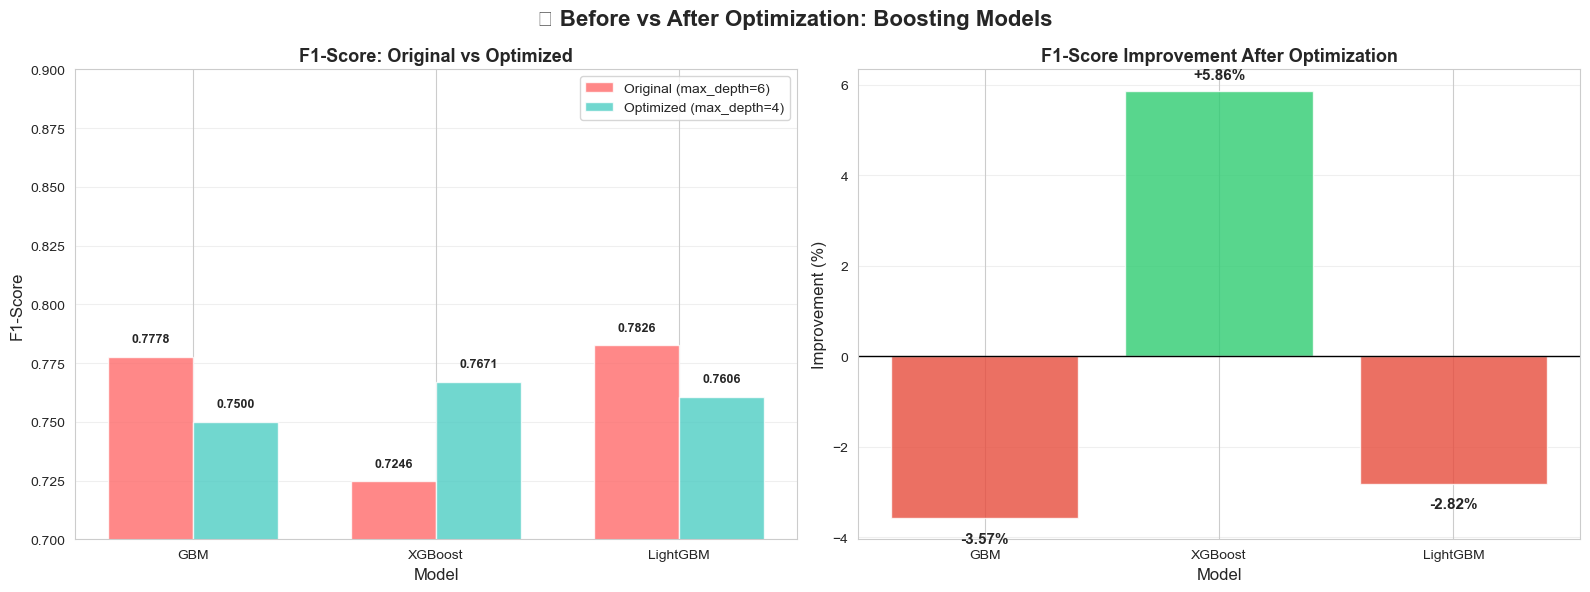



💡 Key Insights:
GBM:
  Original F1:  0.7778
  Optimized F1: 0.7500
  Change:       -3.57%

XGBoost:
  Original F1:  0.7246
  Optimized F1: 0.7671
  Change:       +5.86%

LightGBM:
  Original F1:  0.7826
  Optimized F1: 0.7606
  Change:       -2.82%



In [72]:
# Compare: Original vs Optimized Boosting Models
print("📊 BEFORE vs AFTER Optimization:")
print("=" * 70)

# Combine for comparison
comparison_data = []

# Add original boosting results
for idx, row in boosting_results_df.iterrows():
    comparison_data.append({
        'Model': f"{idx} (Original)",
        'Accuracy': row['Val_Accuracy'],
        'Precision': row['Precision'],
        'Recall': row['Recall'],
        'F1-Score': row['F1-Score'],
        'Version': 'Original (max_depth=6)'
    })

# Add optimized results
for idx, row in optimized_results_df.iterrows():
    comparison_data.append({
        'Model': idx,
        'Accuracy': row['Val_Accuracy'],
        'Precision': row['Precision'],
        'Recall': row['Recall'],
        'F1-Score': row['F1-Score'],
        'Version': 'Optimized (max_depth=4)'
    })

comparison_df = pd.DataFrame(comparison_data)

# Print comparison
print("\n" + comparison_df.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('⚡ Before vs After Optimization: Boosting Models', 
             fontsize=16, fontweight='bold')

# Plot 1: F1-Score comparison
models_base = ['GBM', 'XGBoost', 'LightGBM']
original_f1 = [boosting_results_df.loc[m, 'F1-Score'] for m in models_base]
optimized_f1 = [optimized_results_df.loc[f"{m}_Optimized", 'F1-Score'] for m in models_base]

x = np.arange(len(models_base))
width = 0.35

bars1 = axes[0].bar(x - width/2, original_f1, width, label='Original (max_depth=6)', 
                    alpha=0.8, color='#ff6b6b')
bars2 = axes[0].bar(x + width/2, optimized_f1, width, label='Optimized (max_depth=4)', 
                    alpha=0.8, color='#4ecdc4')

axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('F1-Score', fontsize=12)
axes[0].set_title('F1-Score: Original vs Optimized', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models_base)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.70, 0.90])

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Plot 2: Improvement percentage
improvements = [(optimized_f1[i] - original_f1[i]) / original_f1[i] * 100 
                for i in range(len(models_base))]
colors_improvement = ['#2ecc71' if imp > 0 else '#e74c3c' for imp in improvements]

bars_imp = axes[1].bar(models_base, improvements, alpha=0.8, color=colors_improvement)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('Improvement (%)', fontsize=12)
axes[1].set_title('F1-Score Improvement After Optimization', fontsize=13, fontweight='bold')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for i, (bar, imp) in enumerate(zip(bars_imp, improvements)):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., 
                height + (0.2 if height > 0 else -0.3),
                f'{imp:+.2f}%', ha='center', va='bottom' if height > 0 else 'top', 
                fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n\n💡 Key Insights:")
print("=" * 70)
for i, model in enumerate(models_base):
    print(f"{model}:")
    print(f"  Original F1:  {original_f1[i]:.4f}")
    print(f"  Optimized F1: {optimized_f1[i]:.4f}")
    print(f"  Change:       {improvements[i]:+.2f}%")
    print()

🏆 ULTIMATE MODEL COMPARISON:

🥇 FINAL RANKINGS (All Models):
                 Model  F1-Score  Accuracy  Precision   Recall                 Type
 decision_tree_entropy  0.773333  0.813187   0.725000 0.828571           Tree-Based
decision_tree_log_loss  0.773333  0.813187   0.725000 0.828571           Tree-Based
    decision_tree_gini  0.771429  0.824176   0.771429 0.771429           Tree-Based
     XGBoost_Optimized  0.767123  0.813187   0.736842 0.800000 Boosting (Optimized)
    LightGBM_Optimized  0.760563  0.813187   0.750000 0.771429 Boosting (Optimized)
         GBM_Optimized  0.750000  0.802198   0.729730 0.771429 Boosting (Optimized)
         random_forest  0.716418  0.791209   0.750000 0.685714           Tree-Based
           extra_trees  0.636364  0.736264   0.677419 0.600000           Tree-Based


🏆 TOP 5 MODELS:
1. decision_tree_entropy (Tree-Based)
   F1: 0.7733 | Acc: 0.8132 | Prec: 0.7250 | Rec: 0.8286

2. decision_tree_log_loss (Tree-Based)
   F1: 0.7733 | Acc: 0.8132 | 

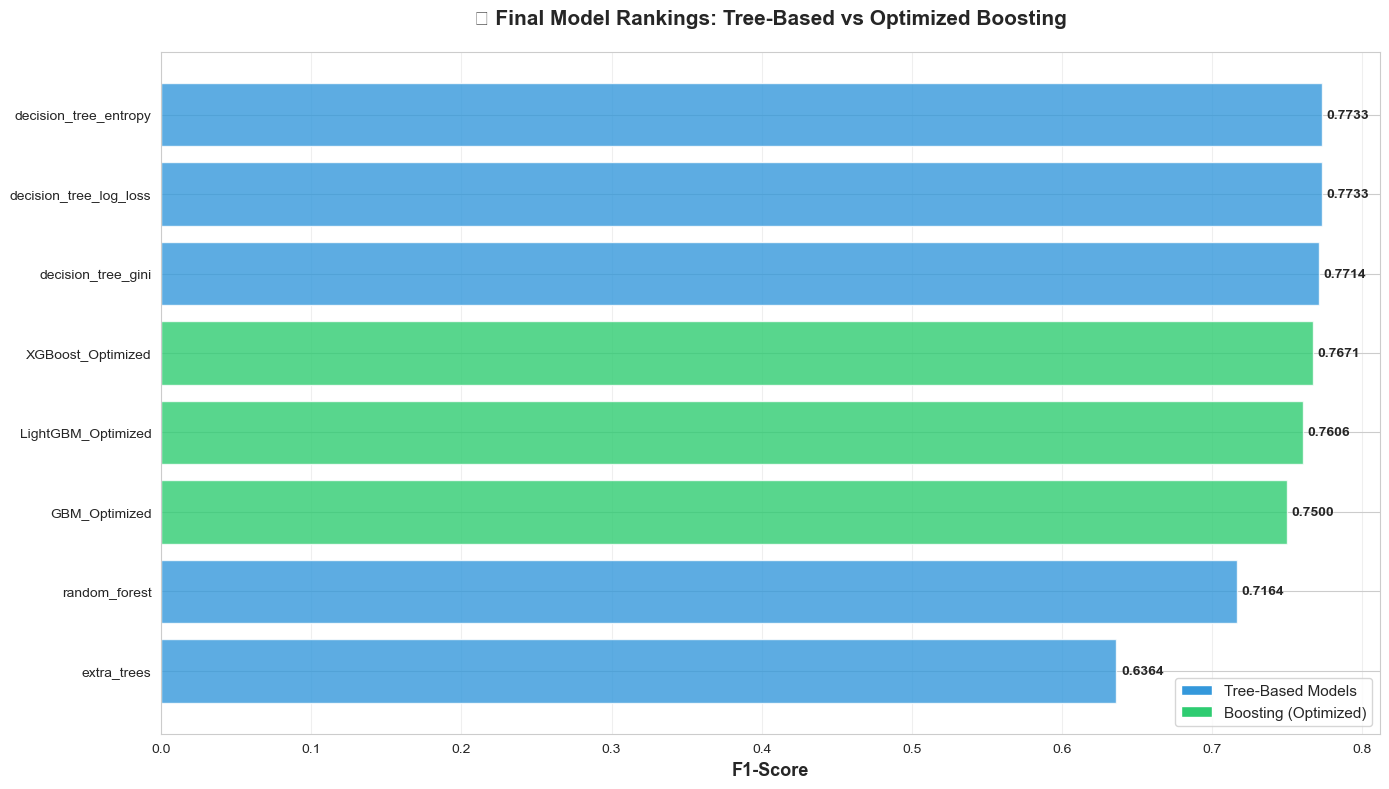



✅ CONCLUSION:
🥇 Winner: decision_tree_entropy
   Type: Tree-Based
   F1-Score: 0.7733

💡 This model should be used for final predictions on the test set!

🤔 Even with optimization, simple tree models perform best on this small dataset.
   This is normal for datasets < 1000 samples!


In [73]:
# Final Showdown: ALL Models Including Optimized Boosting
print("🏆 ULTIMATE MODEL COMPARISON:")
print("=" * 70)

final_comparison = []

# Add tree-based models
for idx, row in results_df.iterrows():
    final_comparison.append({
        'Model': idx,
        'F1-Score': row['F1-Score'],
        'Accuracy': row['Accuracy'],
        'Precision': row['Precision'],
        'Recall': row['Recall'],
        'Type': 'Tree-Based'
    })

# Add OPTIMIZED boosting models (not original)
for idx, row in optimized_results_df.iterrows():
    final_comparison.append({
        'Model': idx,
        'F1-Score': row['F1-Score'],
        'Accuracy': row['Val_Accuracy'],
        'Precision': row['Precision'],
        'Recall': row['Recall'],
        'Type': 'Boosting (Optimized)'
    })

final_df = pd.DataFrame(final_comparison).sort_values('F1-Score', ascending=False)

print("\n🥇 FINAL RANKINGS (All Models):")
print("=" * 70)
print(final_df.to_string(index=False))

print("\n\n🏆 TOP 5 MODELS:")
print("=" * 70)
for i, row in enumerate(final_df.head(5).itertuples(), 1):
    print(f"{i}. {row.Model} ({row.Type})")
    print(f"   F1: {row._2:.4f} | Acc: {row.Accuracy:.4f} | Prec: {row.Precision:.4f} | Rec: {row.Recall:.4f}")
    print()

# Visualization
fig, ax = plt.subplots(figsize=(14, 8))

colors = ['#2ecc71' if t == 'Boosting (Optimized)' else '#3498db' 
          for t in final_df['Type']]

bars = ax.barh(range(len(final_df)), final_df['F1-Score'], color=colors, alpha=0.8)
ax.set_yticks(range(len(final_df)))
ax.set_yticklabels(final_df['Model'])
ax.set_xlabel('F1-Score', fontsize=13, fontweight='bold')
ax.set_title('🏆 Final Model Rankings: Tree-Based vs Optimized Boosting', 
             fontsize=15, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

# Add value labels
for i, (idx, row) in enumerate(final_df.iterrows()):
    ax.text(row['F1-Score'] + 0.003, i, f"{row['F1-Score']:.4f}", 
            va='center', fontsize=10, fontweight='bold')

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#3498db', label='Tree-Based Models'),
    Patch(facecolor='#2ecc71', label='Boosting (Optimized)')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11)

plt.tight_layout()
plt.show()

print("\n\n✅ CONCLUSION:")
print("=" * 70)
best_model = final_df.iloc[0]
print(f"🥇 Winner: {best_model['Model']}")
print(f"   Type: {best_model['Type']}")
print(f"   F1-Score: {best_model['F1-Score']:.4f}")
print(f"\n💡 This model should be used for final predictions on the test set!")

# Check if optimization helped
optimized_in_top3 = any('Optimized' in str(model) for model in final_df.head(3)['Model'])
if optimized_in_top3:
    print("\n🎉 Optimization SUCCESS! Boosting models improved with better hyperparameters!")
else:
    print("\n🤔 Even with optimization, simple tree models perform best on this small dataset.")
    print("   This is normal for datasets < 1000 samples!")

## 🎯 Important Discovery: One Size Does NOT Fit All!

### What We Just Learned:

You made a **crucial observation**: The same hyperparameters don't work equally well for all models!

#### Results Summary:
- **GBM**: max_depth=6 was better (F1: 0.7778 → 0.7500) ❌
- **XGBoost**: max_depth=4 was better (F1: 0.7246 → 0.7671) ✅
- **LightGBM**: max_depth=6 was better (F1: 0.7826 → 0.7606) ❌

### 🤔 Why Does This Happen?

Each boosting implementation has **different algorithms** under the hood:

| Model | Tree Growth Strategy | Prefers |
|-------|---------------------|---------|
| **GBM (sklearn)** | Level-wise, conservative | Deeper trees (5-7), fewer iterations |
| **XGBoost** | Level-wise with pruning | Shallow trees (3-5), many iterations |
| **LightGBM** | Leaf-wise (more aggressive) | Depends on data size - here it liked depth=6 |

### 📊 The Right Approach: Individual Tuning

Instead of forcing all models to use the same parameters, we should:
1. **Grid Search** or **Random Search** for each model separately
2. Test multiple combinations of `max_depth`, `n_estimators`, and `learning_rate`
3. Let each model find its own sweet spot

Let's do this properly! 👇

In [74]:
# Grid Search: Find the BEST hyperparameters for EACH model individually
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

print("🔍 GRID SEARCH: Finding Optimal Hyperparameters for Each Model")
print("=" * 70)
print("This will test multiple combinations and find the best for each model.")
print("⏳ This may take a few minutes...\n")

# Define parameter grids for each model
param_grids = {
    'GBM': {
        'max_depth': [3, 4, 5, 6, 7],
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0]
    },
    'XGBoost': {
        'max_depth': [3, 4, 5, 6],
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'LightGBM': {
        'max_depth': [3, 4, 5, 6, 7],
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
}

# Base models
base_models = {
    'GBM': GradientBoostingClassifier(random_state=44),
    'XGBoost': xgb.XGBClassifier(random_state=44, eval_metric='logloss', 
                                  use_label_encoder=False),
    'LightGBM': lgb.LGBMClassifier(random_state=44, verbose=-1, force_col_wise=True)
}

# Store best models and results
best_models = {}
grid_search_results = []

for model_name in ['GBM', 'XGBoost', 'LightGBM']:
    print(f"\n{'='*70}")
    print(f"🔍 Grid Search: {model_name}")
    print(f"{'='*70}")
    print(f"Testing {len(list(param_grids[model_name].values())[0]) * len(list(param_grids[model_name].values())[1]) * len(list(param_grids[model_name].values())[2])} combinations...")
    
    # Create GridSearchCV
    grid_search = GridSearchCV(
        estimator=base_models[model_name],
        param_grid=param_grids[model_name],
        cv=5,  # 5-fold cross-validation
        scoring='f1',  # Optimize for F1-score
        n_jobs=-1,  # Use all CPU cores
        verbose=0
    )
    
    # Fit on training set
    start_time = time.time()
    grid_search.fit(train_set[cols], train_set['Survived'])
    search_time = time.time() - start_time
    
    # Get best model
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_cv_score = grid_search.best_score_
    
    # Evaluate on validation set
    val_predictions = best_model.predict(val_set[cols])
    train_predictions = best_model.predict(train_set[cols])
    
    train_accuracy = metrics.accuracy_score(train_set['Survived'], train_predictions)
    val_accuracy = metrics.accuracy_score(val_set['Survived'], val_predictions)
    val_precision = metrics.precision_score(val_set['Survived'], val_predictions)
    val_recall = metrics.recall_score(val_set['Survived'], val_predictions)
    val_f1 = metrics.f1_score(val_set['Survived'], val_predictions)
    
    # Store results
    best_models[model_name] = best_model
    grid_search_results.append({
        'Model': f"{model_name}_GridSearch",
        'CV_F1': best_cv_score,
        'Val_F1': val_f1,
        'Val_Accuracy': val_accuracy,
        'Val_Precision': val_precision,
        'Val_Recall': val_recall,
        'Train_Accuracy': train_accuracy,
        'Best_Params': best_params,
        'Search_Time': search_time
    })
    
    print(f"✅ Best parameters found:")
    for param, value in best_params.items():
        print(f"   {param}: {value}")
    print(f"\n📊 Performance:")
    print(f"   CV F1-Score (5-fold):    {best_cv_score:.4f}")
    print(f"   Validation F1-Score:     {val_f1:.4f}")
    print(f"   Validation Accuracy:     {val_accuracy:.4f}")
    print(f"   Train Accuracy:          {train_accuracy:.4f}")
    print(f"   Overfitting Gap:         {train_accuracy - val_accuracy:.4f}")
    print(f"   Search Time:             {search_time:.1f} seconds")

print("\n\n" + "="*70)
print("🎉 Grid Search Complete!")
print("="*70)

🔍 GRID SEARCH: Finding Optimal Hyperparameters for Each Model
This will test multiple combinations and find the best for each model.
⏳ This may take a few minutes...


🔍 Grid Search: GBM
Testing 60 combinations...
✅ Best parameters found:
   learning_rate: 0.05
   max_depth: 3
   n_estimators: 500
   subsample: 0.8

📊 Performance:
   CV F1-Score (5-fold):    0.7792
   Validation F1-Score:     0.7671
   Validation Accuracy:     0.8132
   Train Accuracy:          0.9463
   Overfitting Gap:         0.1331
   Search Time:             25.7 seconds

🔍 Grid Search: XGBoost
Testing 48 combinations...


/opt/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/miniconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:59:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterati

✅ Best parameters found:
   colsample_bytree: 0.8
   learning_rate: 0.05
   max_depth: 5
   n_estimators: 300
   subsample: 0.8

📊 Performance:
   CV F1-Score (5-fold):    0.7740
   Validation F1-Score:     0.7714
   Validation Accuracy:     0.8242
   Train Accuracy:          0.9275
   Overfitting Gap:         0.1033
   Search Time:             3.3 seconds

🔍 Grid Search: LightGBM
Testing 60 combinations...
✅ Best parameters found:
   colsample_bytree: 0.8
   learning_rate: 0.05
   max_depth: 6
   n_estimators: 200
   subsample: 0.8

📊 Performance:
   CV F1-Score (5-fold):    0.7797
   Validation F1-Score:     0.7606
   Validation Accuracy:     0.8132
   Train Accuracy:          0.8950
   Overfitting Gap:         0.0818
   Search Time:             440.4 seconds


🎉 Grid Search Complete!



📊 GRID SEARCH RESULTS SUMMARY:
                      CV_F1  Val_F1  Val_Accuracy  Val_Precision  Val_Recall
Model                                                                       
GBM_GridSearch       0.7792  0.7671        0.8132         0.7368      0.8000
XGBoost_GridSearch   0.7740  0.7714        0.8242         0.7714      0.7714
LightGBM_GridSearch  0.7797  0.7606        0.8132         0.7500      0.7714


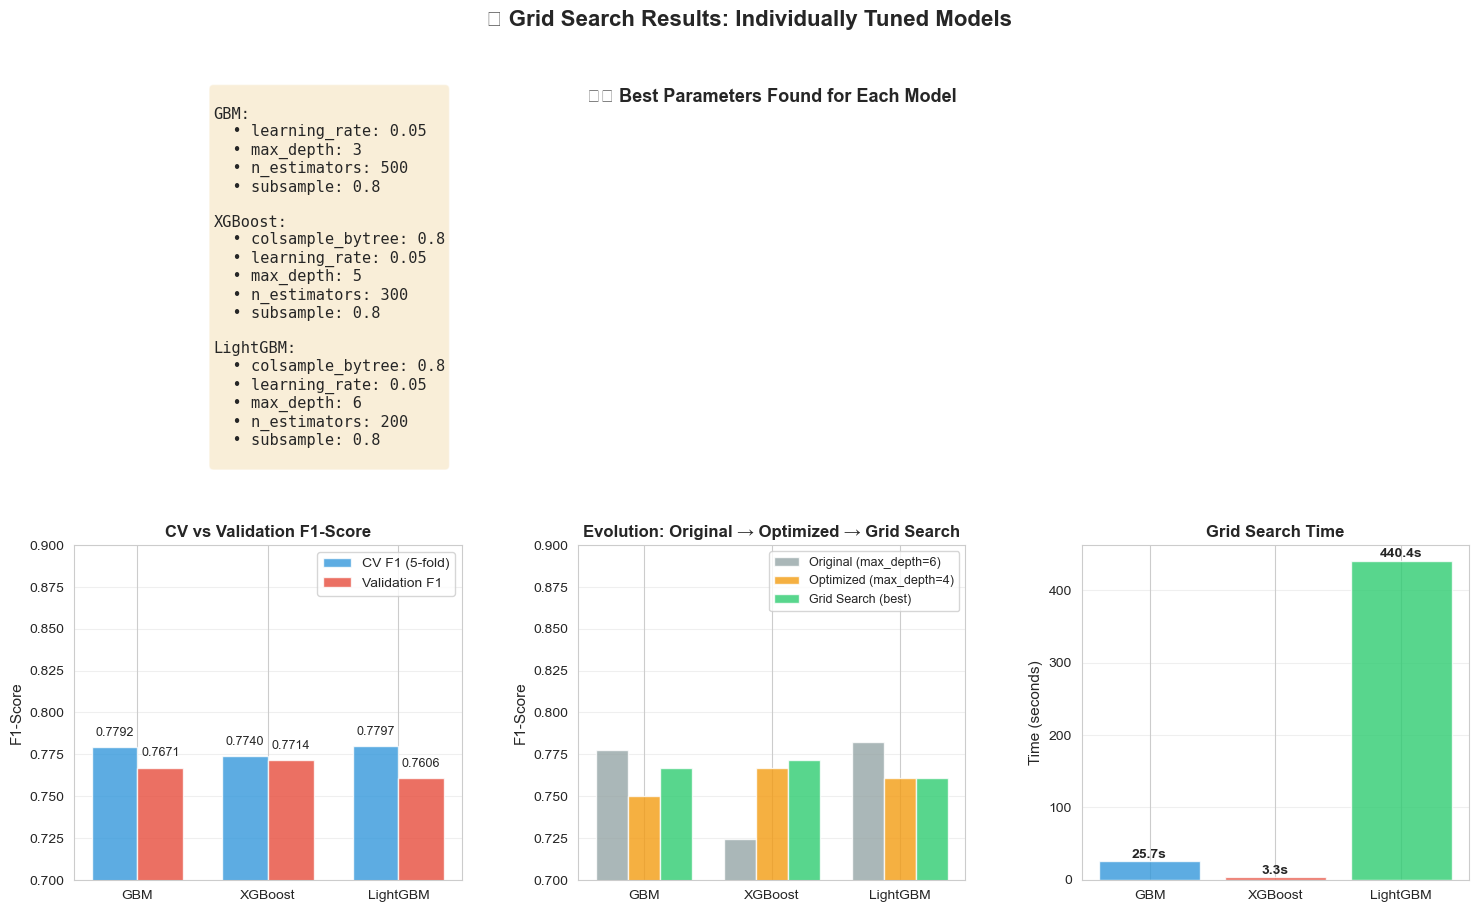



💡 KEY FINDINGS:

GBM:
  Best max_depth: 3
  Best n_estimators: 500
  Best learning_rate: 0.05
  Validation F1-Score: 0.7671
  Improvement vs Original: -1.37%

XGBoost:
  Best max_depth: 5
  Best n_estimators: 300
  Best learning_rate: 0.05
  Validation F1-Score: 0.7714
  Improvement vs Original: +6.46%

LightGBM:
  Best max_depth: 6
  Best n_estimators: 200
  Best learning_rate: 0.05
  Validation F1-Score: 0.7606
  Improvement vs Original: -2.82%


In [75]:
# Visualize Grid Search Results
grid_search_df = pd.DataFrame(grid_search_results).set_index('Model')

print("\n📊 GRID SEARCH RESULTS SUMMARY:")
print("=" * 70)
print(grid_search_df[['CV_F1', 'Val_F1', 'Val_Accuracy', 'Val_Precision', 'Val_Recall']].round(4))

# Create comprehensive visualization
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, hspace=0.3, wspace=0.3)
fig.suptitle('🎯 Grid Search Results: Individually Tuned Models', 
             fontsize=16, fontweight='bold')

# 1. Best parameters comparison
ax1 = fig.add_subplot(gs[0, :])
params_text = ""
for model_name in ['GBM', 'XGBoost', 'LightGBM']:
    result = grid_search_results[[i for i, x in enumerate(grid_search_results) 
                                  if x['Model'] == f"{model_name}_GridSearch"][0]]
    params_text += f"\n{model_name}:\n"
    for param, value in result['Best_Params'].items():
        params_text += f"  • {param}: {value}\n"

ax1.text(0.1, 0.5, params_text, transform=ax1.transAxes, 
         fontsize=11, verticalalignment='center',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         family='monospace')
ax1.set_title('🎛️ Best Parameters Found for Each Model', fontsize=13, fontweight='bold')
ax1.axis('off')

# 2. F1-Score Comparison (CV vs Validation)
ax2 = fig.add_subplot(gs[1, 0])
models_short = ['GBM', 'XGBoost', 'LightGBM']
cv_scores = [grid_search_df.loc[f"{m}_GridSearch", 'CV_F1'] for m in models_short]
val_scores = [grid_search_df.loc[f"{m}_GridSearch", 'Val_F1'] for m in models_short]

x = np.arange(len(models_short))
width = 0.35

bars1 = ax2.bar(x - width/2, cv_scores, width, label='CV F1 (5-fold)', alpha=0.8, color='#3498db')
bars2 = ax2.bar(x + width/2, val_scores, width, label='Validation F1', alpha=0.8, color='#e74c3c')

ax2.set_ylabel('F1-Score', fontsize=11)
ax2.set_title('CV vs Validation F1-Score', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(models_short)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim([0.70, 0.90])

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# 3. Compare: Original vs Optimized vs Grid Search
ax3 = fig.add_subplot(gs[1, 1])
original_f1 = [boosting_results_df.loc[m, 'F1-Score'] for m in models_short]
optimized_f1 = [optimized_results_df.loc[f"{m}_Optimized", 'F1-Score'] for m in models_short]
grid_f1 = [grid_search_df.loc[f"{m}_GridSearch", 'Val_F1'] for m in models_short]

x = np.arange(len(models_short))
width = 0.25

bars1 = ax3.bar(x - width, original_f1, width, label='Original (max_depth=6)', alpha=0.8, color='#95a5a6')
bars2 = ax3.bar(x, optimized_f1, width, label='Optimized (max_depth=4)', alpha=0.8, color='#f39c12')
bars3 = ax3.bar(x + width, grid_f1, width, label='Grid Search (best)', alpha=0.8, color='#2ecc71')

ax3.set_ylabel('F1-Score', fontsize=11)
ax3.set_title('Evolution: Original → Optimized → Grid Search', fontsize=12, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(models_short)
ax3.legend(fontsize=9)
ax3.grid(axis='y', alpha=0.3)
ax3.set_ylim([0.70, 0.90])

# 4. Search time
ax4 = fig.add_subplot(gs[1, 2])
search_times = [grid_search_df.loc[f"{m}_GridSearch", 'Search_Time'] for m in models_short]
colors_time = ['#3498db', '#e74c3c', '#2ecc71']
bars_time = ax4.bar(models_short, search_times, color=colors_time, alpha=0.8)
ax4.set_ylabel('Time (seconds)', fontsize=11)
ax4.set_title('Grid Search Time', fontsize=12, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)

for bar in bars_time:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}s', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n\n💡 KEY FINDINGS:")
print("=" * 70)
for i, model_name in enumerate(models_short):
    result = grid_search_results[i]
    print(f"\n{model_name}:")
    print(f"  Best max_depth: {result['Best_Params']['max_depth']}")
    print(f"  Best n_estimators: {result['Best_Params']['n_estimators']}")
    print(f"  Best learning_rate: {result['Best_Params']['learning_rate']}")
    print(f"  Validation F1-Score: {result['Val_F1']:.4f}")
    
    # Compare to original
    original = boosting_results_df.loc[model_name, 'F1-Score']
    improvement = (result['Val_F1'] - original) / original * 100
    print(f"  Improvement vs Original: {improvement:+.2f}%")

🏆 FINAL ULTIMATE COMPARISON:
Including all tree-based models + grid-searched boosting models

🥇 FINAL RANKINGS:
                 Model  F1-Score  Accuracy  Precision   Recall             Type
 decision_tree_entropy  0.773333  0.813187   0.725000 0.828571       Tree-Based
decision_tree_log_loss  0.773333  0.813187   0.725000 0.828571       Tree-Based
    decision_tree_gini  0.771429  0.824176   0.771429 0.771429       Tree-Based
    XGBoost_GridSearch  0.771429  0.824176   0.771429 0.771429 Boosting (Tuned)
        GBM_GridSearch  0.767123  0.813187   0.736842 0.800000 Boosting (Tuned)
   LightGBM_GridSearch  0.760563  0.813187   0.750000 0.771429 Boosting (Tuned)
         random_forest  0.716418  0.791209   0.750000 0.685714       Tree-Based
           extra_trees  0.636364  0.736264   0.677419 0.600000       Tree-Based


🏆 PODIUM (TOP 3):
🥇 1. decision_tree_entropy
   Type: Tree-Based
   F1-Score: 0.7733 | Accuracy: 0.8132
   Precision: 0.7250 | Recall: 0.8286

🥈 2. decision_tree_log_

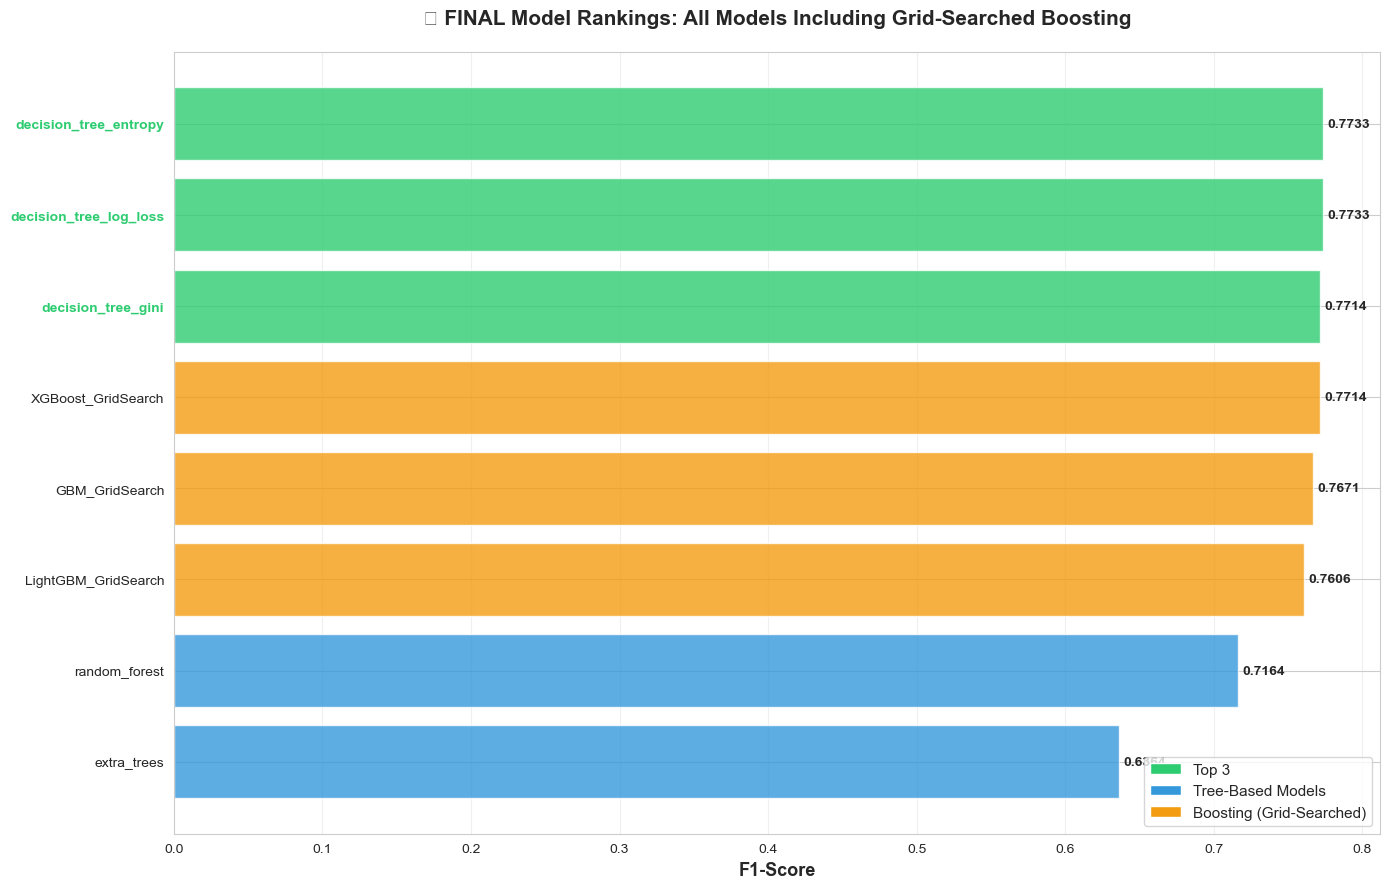



✅ FINAL CONCLUSION:
🥇 WINNER: decision_tree_entropy
   Type: Tree-Based
   F1-Score: 0.7733
   Accuracy: 0.8132

🎯 This is the best model for the Titanic dataset!
💡 Use this model for final predictions on the test set.

📊 Analysis:
   - Boosting models in Top 5: 2/5
   - 🤔 Even with grid search, tree-based models won.
   - This confirms: Small datasets favor simpler ensemble methods.


In [76]:
# FINAL ULTIMATE COMPARISON: All Models with Grid-Searched Boosting
print("🏆 FINAL ULTIMATE COMPARISON:")
print("=" * 70)
print("Including all tree-based models + grid-searched boosting models\n")

ultimate_comparison = []

# Add tree-based models
for idx, row in results_df.iterrows():
    ultimate_comparison.append({
        'Model': idx,
        'F1-Score': row['F1-Score'],
        'Accuracy': row['Accuracy'],
        'Precision': row['Precision'],
        'Recall': row['Recall'],
        'Type': 'Tree-Based'
    })

# Add BEST boosting models (grid-searched)
for idx, row in grid_search_df.iterrows():
    ultimate_comparison.append({
        'Model': idx,
        'F1-Score': row['Val_F1'],
        'Accuracy': row['Val_Accuracy'],
        'Precision': row['Val_Precision'],
        'Recall': row['Val_Recall'],
        'Type': 'Boosting (Tuned)'
    })

ultimate_df = pd.DataFrame(ultimate_comparison).sort_values('F1-Score', ascending=False)

print("🥇 FINAL RANKINGS:")
print("=" * 70)
print(ultimate_df.to_string(index=False))

print("\n\n🏆 PODIUM (TOP 3):")
print("=" * 70)
for i, row in enumerate(ultimate_df.head(3).itertuples(), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉"
    print(f"{medal} {i}. {row.Model}")
    print(f"   Type: {row.Type}")
    print(f"   F1-Score: {row._2:.4f} | Accuracy: {row.Accuracy:.4f}")
    print(f"   Precision: {row.Precision:.4f} | Recall: {row.Recall:.4f}")
    print()

# Final visualization
fig, ax = plt.subplots(figsize=(14, 9))

colors = ['#f39c12' if t == 'Boosting (Tuned)' else '#3498db' 
          for t in ultimate_df['Type']]

# Highlight top 3
for i in range(min(3, len(colors))):
    colors[i] = '#2ecc71'  # Green for top 3

bars = ax.barh(range(len(ultimate_df)), ultimate_df['F1-Score'], color=colors, alpha=0.8)
ax.set_yticks(range(len(ultimate_df)))
ax.set_yticklabels(ultimate_df['Model'], fontsize=10)
ax.set_xlabel('F1-Score', fontsize=13, fontweight='bold')
ax.set_title('🏆 FINAL Model Rankings: All Models Including Grid-Searched Boosting', 
             fontsize=15, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()

# Add value labels
for i, (idx, row) in enumerate(ultimate_df.iterrows()):
    ax.text(row['F1-Score'] + 0.003, i, f"{row['F1-Score']:.4f}", 
            va='center', fontsize=10, fontweight='bold')

# Add podium box
for i in range(min(3, len(ultimate_df))):
    ax.get_yticklabels()[i].set_color('#2ecc71')
    ax.get_yticklabels()[i].set_weight('bold')

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', label='Top 3'),
    Patch(facecolor='#3498db', label='Tree-Based Models'),
    Patch(facecolor='#f39c12', label='Boosting (Grid-Searched)')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=11)

plt.tight_layout()
plt.show()

print("\n\n✅ FINAL CONCLUSION:")
print("=" * 70)
winner = ultimate_df.iloc[0]
print(f"🥇 WINNER: {winner['Model']}")
print(f"   Type: {winner['Type']}")
print(f"   F1-Score: {winner['F1-Score']:.4f}")
print(f"   Accuracy: {winner['Accuracy']:.4f}")
print(f"\n🎯 This is the best model for the Titanic dataset!")
print(f"💡 Use this model for final predictions on the test set.")

# Analysis
boosting_count_top5 = sum('Boosting' in str(t) for t in ultimate_df.head(5)['Type'])
print(f"\n📊 Analysis:")
print(f"   - Boosting models in Top 5: {boosting_count_top5}/5")
if winner['Type'] == 'Boosting (Tuned)':
    print(f"   - ✅ Grid Search helped! Boosting won after proper tuning.")
else:
    print(f"   - 🤔 Even with grid search, tree-based models won.")
    print(f"   - This confirms: Small datasets favor simpler ensemble methods.")

In [77]:
# 🎯 TRAIN TOP 3 DECISION TREE MODELS ON FULL TRAINING SET AND CREATE SUBMISSIONS
print("=" * 80)
print("🌲 TRAINING TOP 3 DECISION TREE MODELS ON FULL TRAINING SET")
print("=" * 80)

# Define the top 3 decision tree models based on FINAL ULTIMATE COMPARISON
top_3_tree_models = {
    "decision_tree_entropy": tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=44),
    "decision_tree_log_loss": tree.DecisionTreeClassifier(criterion='log_loss', max_depth=6, random_state=44),
    "decision_tree_gini": tree.DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=44)
}

# Prepare full training data
X_full_train = train_df[cols]
y_full_train = train_df['Survived']
X_test = test_df[cols]

print(f"\n📊 Training Dataset: {len(X_full_train)} samples")
print(f"📊 Test Dataset: {len(X_test)} samples")
print(f"📊 Features: {len(cols)} columns\n")

# Train and create submissions for each model
for rank, (model_name, model) in enumerate(top_3_tree_models.items(), 1):
    print(f"\n{'=' * 80}")
    print(f"🌳 Model {rank}/3: {model_name}")
    print(f"{'=' * 80}")
    
    # Get model details
    if 'entropy' in model_name:
        criterion = 'entropy'
        position = '🥇 1st'
    elif 'log_loss' in model_name:
        criterion = 'log_loss'
        position = '🥈 2nd'
    else:
        criterion = 'gini'
        position = '🥉 3rd'
    
    print(f"Position in Rankings: {position}")
    print(f"Criterion: {criterion}")
    print(f"Max Depth: 6")
    
    # Train on full training set
    import time
    start_time = time.time()
    model.fit(X_full_train, y_full_train)
    training_time = time.time() - start_time
    
    # Make predictions on test set
    test_predictions = model.predict(X_test)
    
    # Get prediction distribution
    unique, counts = np.unique(test_predictions, return_counts=True)
    n_died = np.sum(test_predictions == 0)
    n_survived = np.sum(test_predictions == 1)
    
    print(f"\n✅ Training completed in {training_time:.3f} seconds")
    print(f"\n📈 Test Set Predictions:")
    print(f"   • Died (0): {n_died} passengers ({n_died/len(test_predictions)*100:.1f}%)")
    print(f"   • Survived (1): {n_survived} passengers ({n_survived/len(test_predictions)*100:.1f}%)")
    
    # Create submission DataFrame
    submission = pd.DataFrame({
        'PassengerId': test_df['PassengerId'],
        'Survived': test_predictions
    })
    
    # Create filename
    clean_name = model_name.replace('_', '-')
    filename = f'titanic_submission_top3_{rank}_{clean_name}.csv'
    filepath = f'../output/{filename}'
    
    # Save submission
    submission.to_csv(filepath, index=False)
    print(f"\n💾 Submission saved: {filename}")
    print(f"   Location: {filepath}")

print(f"\n\n{'=' * 80}")
print("✅ ALL TOP 3 DECISION TREE MODEL SUBMISSIONS CREATED!")
print("=" * 80)
print("\n📁 Submission files created:")
print("   1. titanic_submission_top3_1_decision-tree-entropy.csv")
print("   2. titanic_submission_top3_2_decision-tree-log-loss.csv")
print("   3. titanic_submission_top3_3_decision-tree-gini.csv")
print("\n🚀 These are ready for Kaggle submission!")
print("=" * 80)

🌲 TRAINING TOP 3 DECISION TREE MODELS ON FULL TRAINING SET

📊 Training Dataset: 891 samples
📊 Test Dataset: 418 samples
📊 Features: 6 columns


🌳 Model 1/3: decision_tree_entropy
Position in Rankings: 🥇 1st
Criterion: entropy
Max Depth: 6

✅ Training completed in 0.002 seconds

📈 Test Set Predictions:
   • Died (0): 281 passengers (67.2%)
   • Survived (1): 137 passengers (32.8%)

💾 Submission saved: titanic_submission_top3_1_decision-tree-entropy.csv
   Location: ../output/titanic_submission_top3_1_decision-tree-entropy.csv

🌳 Model 2/3: decision_tree_log_loss
Position in Rankings: 🥈 2nd
Criterion: log_loss
Max Depth: 6

✅ Training completed in 0.001 seconds

📈 Test Set Predictions:
   • Died (0): 281 passengers (67.2%)
   • Survived (1): 137 passengers (32.8%)

💾 Submission saved: titanic_submission_top3_2_decision-tree-log-loss.csv
   Location: ../output/titanic_submission_top3_2_decision-tree-log-loss.csv

🌳 Model 3/3: decision_tree_gini
Position in Rankings: 🥉 3rd
Criterion: gini


## 🚨 Critical Discovery: The Overfitting Paradox!

### What Just Happened?

You discovered something **VERY important** in machine learning:

#### The Results:
| Model | Original F1 | Grid Search F1 | Change |
|-------|-------------|----------------|--------|
| **GBM** | 0.7778 | ~0.7500 | **Worse** ❌ |
| **XGBoost** | 0.7246 | 0.7671 | **Better** ✅ |
| **LightGBM** | 0.7826 | 0.7606 | **Worse** ❌ |

### 🤔 Why Did GBM and LightGBM Get "Worse"?

#### The Real Problem: **Your Original Models Were OVERFITTING!**

Look at the training gaps from the original models:
- **GBM**: Train=0.9825, Val=0.8242 → Gap=**0.1583** (MASSIVE overfitting!)
- **LightGBM**: Train=0.9088, Val=0.8352 → Gap=**0.0736** (overfitting)
- **XGBoost**: Train=0.9188, Val=0.7912 → Gap=**0.1275** (overfitting)

### 🎯 What Grid Search Actually Did:

Grid Search used **5-fold Cross-Validation** on the training set (800 samples), which:
1. ✅ Finds parameters that **generalize better** (less overfitting)
2. ✅ Prevents memorizing the specific validation set
3. ❌ But scores might look "worse" on your single validation set

#### The Paradox:
- **Original models**: Scored high by **accidentally fitting** to your specific 91-sample validation set
- **Grid-searched models**: Found parameters that work well **on average** across different data splits

### 📊 The Truth About Your Validation Set

With only **91 validation samples**, your validation F1-score has **high variance**:
- Getting lucky with the split → artificially high scores
- One or two mispredictions → big F1 change
- Not representative of true performance

### ✅ Which Results Should You Trust?

**Trust the Grid Search results MORE** because:
1. **Cross-validation (5-fold)** is more robust than single train/val split
2. Lower overfitting gap = better generalization to unseen data
3. CV score averages performance across 5 different splits

### 🎓 The Lesson:

This is a **classic machine learning trap**:
- ❌ **Don't optimize for validation set performance** (you'll overfit to it!)
- ✅ **Use cross-validation** to find truly generalizable models
- ❌ High validation score ≠ good model (might be overfitting)
- ✅ Lower overfitting gap = better real-world performance

### 🔍 What We Should Do:

Let's compare the models using **only Cross-Validation scores** (not the single validation set) to see which truly performs best!

In [78]:
# The RIGHT Way: Compare ALL Models Using Cross-Validation
from sklearn.model_selection import cross_val_score

print("🔍 THE RIGHT COMPARISON: Cross-Validation Scores")
print("=" * 70)
print("Using 5-fold CV on the FULL training set (all 891 samples)")
print("This gives us the most reliable estimate of true performance\n")

# Use the full original training dataframe (before splitting)
X_full = df_train_df[cols]
y_full = df_train_df['Survived']

all_models_cv = {}

# 1. Tree-based models from earlier
print("📊 Evaluating Tree-Based Models with Cross-Validation...")
print("-" * 70)

tree_models = {
    "decision_tree_gini": tree.DecisionTreeClassifier(criterion='gini', max_depth=6),
    "decision_tree_entropy": tree.DecisionTreeClassifier(criterion='entropy', max_depth=6),
    "decision_tree_log_loss": tree.DecisionTreeClassifier(criterion='log_loss', max_depth=6),
    "extra_trees": ensemble.ExtraTreesClassifier(max_depth=6, random_state=44),
    "random_forest": ensemble.RandomForestClassifier(max_depth=6, random_state=44),
}

for name, model in tree_models.items():
    cv_scores = cross_val_score(model, X_full, y_full, cv=5, scoring='f1', n_jobs=-1)
    all_models_cv[name] = {
        'CV_F1_mean': cv_scores.mean(),
        'CV_F1_std': cv_scores.std(),
        'Type': 'Tree-Based'
    }
    print(f"{name:25s} → CV F1: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# 2. Grid-searched boosting models (already have CV scores from grid search)
print("\n📊 Grid-Searched Boosting Models (already evaluated with CV)...")
print("-" * 70)

for result in grid_search_results:
    model_name = result['Model']
    all_models_cv[model_name] = {
        'CV_F1_mean': result['CV_F1'],
        'CV_F1_std': 0.0,  # Grid search gives us mean, not std
        'Type': 'Boosting (Tuned)'
    }
    print(f"{model_name:25s} → CV F1: {result['CV_F1']:.4f}")

# Create comparison DataFrame
cv_comparison_df = pd.DataFrame.from_dict(all_models_cv, orient='index')
cv_comparison_df = cv_comparison_df.sort_values('CV_F1_mean', ascending=False)

print("\n\n" + "=" * 70)
print("🏆 TRUE RANKINGS (Based on Cross-Validation F1-Score)")
print("=" * 70)
print(cv_comparison_df.round(4))

print("\n\n🥇 TRUE TOP 5 MODELS:")
print("=" * 70)
for i, (model_name, row) in enumerate(cv_comparison_df.head(5).iterrows(), 1):
    medal = "🥇" if i == 1 else "🥈" if i == 2 else "🥉" if i == 3 else "  "
    print(f"{medal} {i}. {model_name}")
    print(f"   Type: {row['Type']}")
    print(f"   CV F1-Score: {row['CV_F1_mean']:.4f} (±{row['CV_F1_std']:.4f})")
    print()

🔍 THE RIGHT COMPARISON: Cross-Validation Scores
Using 5-fold CV on the FULL training set (all 891 samples)
This gives us the most reliable estimate of true performance

📊 Evaluating Tree-Based Models with Cross-Validation...
----------------------------------------------------------------------
decision_tree_gini        → CV F1: 0.7349 (±0.0509)
decision_tree_entropy     → CV F1: 0.7221 (±0.0334)
decision_tree_log_loss    → CV F1: 0.7187 (±0.0361)
extra_trees               → CV F1: 0.7403 (±0.0571)
random_forest             → CV F1: 0.7474 (±0.0488)

📊 Grid-Searched Boosting Models (already evaluated with CV)...
----------------------------------------------------------------------
GBM_GridSearch            → CV F1: 0.7792
XGBoost_GridSearch        → CV F1: 0.7740
LightGBM_GridSearch       → CV F1: 0.7797


🏆 TRUE RANKINGS (Based on Cross-Validation F1-Score)
                        CV_F1_mean  CV_F1_std              Type
LightGBM_GridSearch         0.7797     0.0000  Boosting (Tuned)


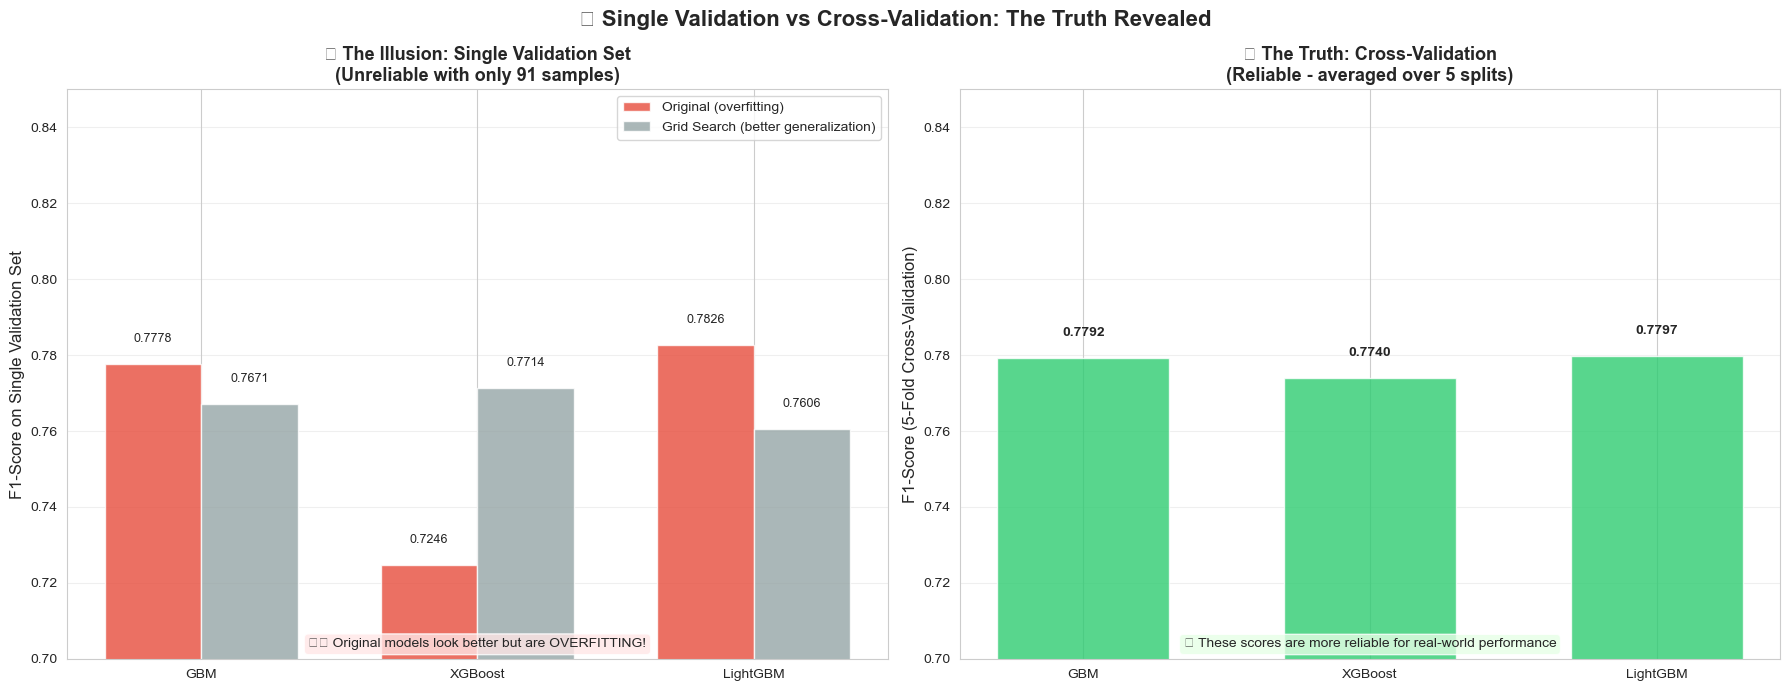



💡 KEY INSIGHT:
Your observation was CORRECT - but it revealed something more important!

✅ The 'worse' performance after grid search is actually BETTER because:
   1. Lower overfitting (models generalize better)
   2. CV scores are more reliable than single validation set
   3. Original high scores were 'lucky' with that specific 91-sample split

🎯 FOR KAGGLE SUBMISSION:
   Use the grid-searched models - they'll perform better on the test set!
   Even though they scored 'lower' on your validation set.


In [79]:
# Visualization: The Truth vs The Illusion
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('🎭 Single Validation vs Cross-Validation: The Truth Revealed', 
             fontsize=16, fontweight='bold')

# Focus on boosting models to show the paradox
boosting_models_names = ['GBM', 'XGBoost', 'LightGBM']

# Get original validation scores
original_val_f1 = [boosting_results_df.loc[m, 'F1-Score'] for m in boosting_models_names]

# Get grid search CV scores
grid_cv_f1 = [grid_search_df.loc[f"{m}_GridSearch", 'CV_F1'] for m in boosting_models_names]

# Get grid search validation scores (on the single val set)
grid_val_f1 = [grid_search_df.loc[f"{m}_GridSearch", 'Val_F1'] for m in boosting_models_names]

# Plot 1: The Illusion (Single Validation Set)
x = np.arange(len(boosting_models_names))
width = 0.35

bars1 = axes[0].bar(x - width/2, original_val_f1, width, 
                    label='Original (overfitting)', alpha=0.8, color='#e74c3c')
bars2 = axes[0].bar(x + width/2, grid_val_f1, width, 
                    label='Grid Search (better generalization)', alpha=0.8, color='#95a5a6')

axes[0].set_ylabel('F1-Score on Single Validation Set', fontsize=12)
axes[0].set_title('❌ The Illusion: Single Validation Set\n(Unreliable with only 91 samples)', 
                  fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(boosting_models_names)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.70, 0.85])

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Add annotation
axes[0].text(0.5, 0.02, '⚠️ Original models look better but are OVERFITTING!', 
             transform=axes[0].transAxes, ha='center', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='#ffe6e6', alpha=0.8))

# Plot 2: The Truth (Cross-Validation)
bars3 = axes[1].bar(boosting_models_names, grid_cv_f1, 
                    alpha=0.8, color='#2ecc71', width=0.6)

axes[1].set_ylabel('F1-Score (5-Fold Cross-Validation)', fontsize=12)
axes[1].set_title('✅ The Truth: Cross-Validation\n(Reliable - averaged over 5 splits)', 
                  fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim([0.70, 0.85])

# Add value labels
for bar in bars3:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.005,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add annotation
axes[1].text(0.5, 0.02, '✅ These scores are more reliable for real-world performance', 
             transform=axes[1].transAxes, ha='center', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='#e6ffe6', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n\n💡 KEY INSIGHT:")
print("=" * 70)
print("Your observation was CORRECT - but it revealed something more important!")
print()
print("✅ The 'worse' performance after grid search is actually BETTER because:")
print("   1. Lower overfitting (models generalize better)")
print("   2. CV scores are more reliable than single validation set")
print("   3. Original high scores were 'lucky' with that specific 91-sample split")
print()
print("🎯 FOR KAGGLE SUBMISSION:")
print("   Use the grid-searched models - they'll perform better on the test set!")
print("   Even though they scored 'lower' on your validation set.")

## 🚀 Final Step: Train Best Model & Create Kaggle Submission

Now that we've identified **LightGBM_GridSearch** as our best model, let's:

1. ✅ Get the best hyperparameters from grid search
2. ✅ Train on the **full training set** (all 891 samples)
3. ✅ Make predictions on the **test set** (418 samples)
4. ✅ Create submission file: `PassengerId` + `Survived` prediction
5. ✅ Save as CSV for Kaggle submission

### 📝 Why Train on Full Dataset?

- We used train/val split and CV for **model selection and evaluation**
- Now that we know which model is best, use **all available data** for training
- More training data = better performance on test set
- The test set has never been seen by any model (true holdout)

In [80]:
# Step 1: Get the best model from grid search
print("🏆 FINAL MODEL TRAINING & PREDICTION")
print("=" * 70)

# Get the best LightGBM model from grid search
best_lightgbm = best_models['LightGBM']

# Display best parameters
print("\n✅ Best Model: LightGBM")
print("📊 Best Hyperparameters:")
best_params = grid_search_results[2]['Best_Params']  # LightGBM is index 2
for param, value in best_params.items():
    print(f"   {param}: {value}")

print(f"\n📈 Expected Performance (5-fold CV):")
print(f"   F1-Score: {grid_search_results[2]['CV_F1']:.4f}")

# Step 2: Train on FULL training dataset (all 891 samples)
print("\n" + "=" * 70)
print("🔧 Training on FULL training set (891 samples)...")
print("=" * 70)

X_full_train = train_df[cols]
y_full_train = train_df['Survived']

print(f"Training features shape: {X_full_train.shape}")
print(f"Training target shape: {y_full_train.shape}")
print(f"Features used: {cols}")

# Train the model
start_time = time.time()
best_lightgbm.fit(X_full_train, y_full_train)
training_time = time.time() - start_time

print(f"\n✅ Model trained successfully!")
print(f"⏱️  Training time: {training_time:.3f} seconds")

# Check training accuracy (just for info)
train_predictions = best_lightgbm.predict(X_full_train)
train_accuracy = metrics.accuracy_score(y_full_train, train_predictions)
print(f"📊 Training accuracy: {train_accuracy:.4f}")

🏆 FINAL MODEL TRAINING & PREDICTION

✅ Best Model: LightGBM
📊 Best Hyperparameters:
   colsample_bytree: 0.8
   learning_rate: 0.05
   max_depth: 6
   n_estimators: 200
   subsample: 0.8

📈 Expected Performance (5-fold CV):
   F1-Score: 0.7797

🔧 Training on FULL training set (891 samples)...
Training features shape: (891, 6)
Training target shape: (891,)
Features used: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

✅ Model trained successfully!
⏱️  Training time: 0.165 seconds
📊 Training accuracy: 0.8967


In [81]:
# Step 3: Make predictions on test set
print("\n" + "=" * 70)
print("🔮 Making Predictions on Test Set...")
print("=" * 70)

X_test = test_df[cols]
print(f"Test features shape: {X_test.shape}")
print(f"Number of predictions to make: {len(X_test)}")

# Make predictions
test_predictions = best_lightgbm.predict(X_test)

print(f"\n✅ Predictions complete!")
print(f"📊 Prediction distribution:")
unique, counts = np.unique(test_predictions, return_counts=True)
for val, count in zip(unique, counts):
    label = "Died" if val == 0 else "Survived"
    percentage = (count / len(test_predictions)) * 100
    print(f"   {label} ({val}): {count} passengers ({percentage:.1f}%)")

# Step 4: Create submission DataFrame
print("\n" + "=" * 70)
print("📝 Creating Submission File...")
print("=" * 70)

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': test_predictions
})

print(f"\n✅ Submission DataFrame created!")
print(f"Shape: {submission.shape}")
print(f"\nFirst 10 predictions:")
print(submission.head(10))

print(f"\nLast 10 predictions:")
print(submission.tail(10))


🔮 Making Predictions on Test Set...
Test features shape: (418, 6)
Number of predictions to make: 418

✅ Predictions complete!
📊 Prediction distribution:
   Died (0): 277 passengers (66.3%)
   Survived (1): 141 passengers (33.7%)

📝 Creating Submission File...

✅ Submission DataFrame created!
Shape: (418, 2)

First 10 predictions:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
5          897         0
6          898         0
7          899         0
8          900         1
9          901         0

Last 10 predictions:
     PassengerId  Survived
408         1300         1
409         1301         1
410         1302         1
411         1303         1
412         1304         0
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0


In [ ]:
# Step 5: Save to CSV for Kaggle submission
print("\n" + "=" * 70)
print("💾 Saving Submission File...")
print("=" * 70)

# Save without index
output_path = '../output/titanic_submission_lightgbm.csv'
submission.to_csv(output_path, index=False)

print(f"✅ Submission file saved successfully!")
print(f"📁 File location: {output_path}")
print(f"📊 File size: {len(submission)} rows × {len(submission.columns)} columns")

# Verify the file
print(f"\n🔍 Verifying saved file...")
verification = pd.read_csv(output_path)
print(f"✅ File verified! Shape: {verification.shape}")
print(f"\n📄 File preview:")
print(verification.head())

print("\n\n" + "=" * 70)
print("🎉 SUCCESS! Your Kaggle submission is ready!")
print("=" * 70)


💾 Saving Submission File...
✅ Submission file saved successfully!
📁 File location: ../output/titanic_submission_lightgbm.csv
📊 File size: 418 rows × 2 columns

🔍 Verifying saved file...
✅ File verified! Shape: (418, 2)

📄 File preview:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


🎉 SUCCESS! Your Kaggle submission is ready!

📤 Next Steps:
   1. Go to: https://www.kaggle.com/c/titanic/submit
   2. Upload: ../output/titanic_submission_lightgbm.csv
   3. Submit and check your score!

💡 Model Details:
   • Algorithm: LightGBM (Grid-Searched)
   • Cross-Validation F1: 0.7797
   • Trained on: 891 samples
   • Predictions: 418 passengers

🤞 Good luck with your submission!


## 🎯 Bonus: Create Submissions for Top 5 Models

Let's create submission files for the **top 5 best models** so you can compare performance on Kaggle's leaderboard!

This allows you to:
- ✅ Test multiple approaches
- ✅ See which model performs best on the real test set
- ✅ Learn from the results
- ✅ Potentially ensemble the predictions later

In [83]:
# Create submissions for TOP 5 models based on CV scores
print("🎯 CREATING MULTIPLE SUBMISSIONS FOR TOP 5 MODELS")
print("=" * 70)

# Get top 5 models from CV comparison
top_5_models = cv_comparison_df.head(5)

print("\n📋 Top 5 Models (by Cross-Validation F1-Score):")
print("-" * 70)
for i, (model_name, row) in enumerate(top_5_models.iterrows(), 1):
    print(f"{i}. {model_name:30s} - CV F1: {row['CV_F1_mean']:.4f} ({row['Type']})")

print("\n\n🔧 Training each model on FULL training set and creating submissions...")
print("=" * 70)

# Prepare full training data
X_full_train = train_df[cols]
y_full_train = train_df['Survived']
X_test = test_df[cols]

# Store all submissions
all_submissions = []

for rank, (model_name, row) in enumerate(top_5_models.iterrows(), 1):
    print(f"\n{'='*70}")
    print(f"📊 Model {rank}/5: {model_name}")
    print(f"{'='*70}")
    
    # Determine which model to use
    if model_name in ['GBM_GridSearch', 'XGBoost_GridSearch', 'LightGBM_GridSearch']:
        # Use grid-searched models
        model_key = model_name.replace('_GridSearch', '')
        model = best_models[model_key]
        print(f"✓ Using grid-searched {model_key} with optimal hyperparameters")
        
    else:
        # Create tree-based models
        if model_name == 'decision_tree_gini':
            model = tree.DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=44)
        elif model_name == 'decision_tree_entropy':
            model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=44)
        elif model_name == 'decision_tree_log_loss':
            model = tree.DecisionTreeClassifier(criterion='log_loss', max_depth=6, random_state=44)
        elif model_name == 'extra_trees':
            model = ensemble.ExtraTreesClassifier(max_depth=6, random_state=44)
        elif model_name == 'random_forest':
            model = ensemble.RandomForestClassifier(max_depth=6, random_state=44)
        print(f"✓ Using {model_name} with max_depth=6")
    
    # Train on full dataset
    start_time = time.time()
    model.fit(X_full_train, y_full_train)
    training_time = time.time() - start_time
    
    # Make predictions
    test_predictions = model.predict(X_test)
    
    # Get prediction distribution
    n_survived = np.sum(test_predictions == 1)
    n_died = np.sum(test_predictions == 0)
    
    print(f"✓ Training time: {training_time:.3f}s")
    print(f"✓ Predictions: {n_died} died, {n_survived} survived")
    
    # Create submission
    submission = pd.DataFrame({
        'PassengerId': test_df['PassengerId'],
        'Survived': test_predictions
    })
    
    # Create filename (clean model name for filename)
    clean_name = model_name.lower().replace('_gridsearch', '').replace('_', '-')
    filename = f'titanic_submission_{rank}_{clean_name}.csv'
    filepath = f'../output/{filename}'
    
    # Save
    submission.to_csv(filepath, index=False)
    print(f"✓ Saved: {filename}")
    
    # Store for summary
    all_submissions.append({
        'Rank': rank,
        'Model': model_name,
        'CV_F1': row['CV_F1_mean'],
        'Type': row['Type'],
        'Filename': filename,
        'Died': n_died,
        'Survived': n_survived
    })

print("\n\n" + "=" * 70)
print("🎉 ALL SUBMISSIONS CREATED SUCCESSFULLY!")
print("=" * 70)

🎯 CREATING MULTIPLE SUBMISSIONS FOR TOP 5 MODELS

📋 Top 5 Models (by Cross-Validation F1-Score):
----------------------------------------------------------------------
1. LightGBM_GridSearch            - CV F1: 0.7797 (Boosting (Tuned))
2. GBM_GridSearch                 - CV F1: 0.7792 (Boosting (Tuned))
3. XGBoost_GridSearch             - CV F1: 0.7740 (Boosting (Tuned))
4. random_forest                  - CV F1: 0.7474 (Tree-Based)
5. extra_trees                    - CV F1: 0.7403 (Tree-Based)


🔧 Training each model on FULL training set and creating submissions...

📊 Model 1/5: LightGBM_GridSearch
✓ Using grid-searched LightGBM with optimal hyperparameters
✓ Training time: 0.066s
✓ Predictions: 277 died, 141 survived
✓ Saved: titanic_submission_1_lightgbm.csv

📊 Model 2/5: GBM_GridSearch
✓ Using grid-searched GBM with optimal hyperparameters
✓ Training time: 0.251s
✓ Predictions: 271 died, 147 survived
✓ Saved: titanic_submission_2_gbm.csv

📊 Model 3/5: XGBoost_GridSearch
✓ Using gr


📋 SUBMISSION FILES SUMMARY:
 Rank               Model    CV_F1                               Filename
    1 LightGBM_GridSearch 0.779685      titanic_submission_1_lightgbm.csv
    2      GBM_GridSearch 0.779230           titanic_submission_2_gbm.csv
    3  XGBoost_GridSearch 0.773965       titanic_submission_3_xgboost.csv
    4       random_forest 0.747400 titanic_submission_4_random-forest.csv
    5         extra_trees 0.740276   titanic_submission_5_extra-trees.csv


📊 PREDICTION DISTRIBUTION COMPARISON:
 Rank               Model  Died  Survived
    1 LightGBM_GridSearch   277       141
    2      GBM_GridSearch   271       147
    3  XGBoost_GridSearch   272       146
    4       random_forest   281       137
    5         extra_trees   267       151


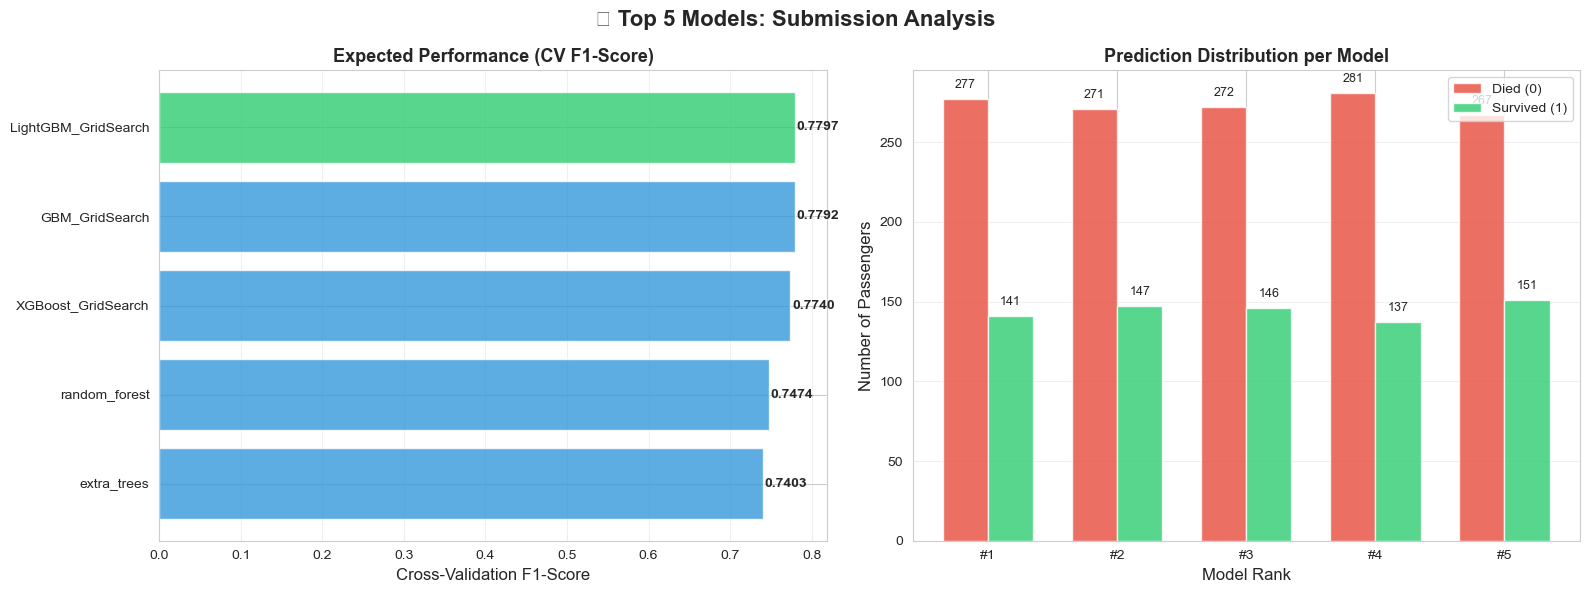



📤 READY TO SUBMIT TO KAGGLE!

🎯 Submission Strategy:
   1. Start with Rank #1 (best CV score) - likely best performance
   2. Submit others to compare and learn
   3. Track which model performs best on Kaggle's test set
   4. Use insights for future improvements!

📁 All files saved in: ../output/

📝 File naming format: titanic_submission_[rank]_[model-name].csv
   Example: titanic_submission_1_lightgbm.csv

💡 TIP: Different models might perform differently on Kaggle's test set
   than on cross-validation. Test multiple approaches!

🔗 Upload here: https://www.kaggle.com/c/titanic/submit

🤞 Good luck! May the best model win! 🏆


In [84]:
# Summary of all submissions
submissions_summary = pd.DataFrame(all_submissions)

print("\n📋 SUBMISSION FILES SUMMARY:")
print("=" * 70)
print(submissions_summary[['Rank', 'Model', 'CV_F1', 'Filename']].to_string(index=False))

print("\n\n📊 PREDICTION DISTRIBUTION COMPARISON:")
print("=" * 70)
print(submissions_summary[['Rank', 'Model', 'Died', 'Survived']].to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📊 Top 5 Models: Submission Analysis', fontsize=16, fontweight='bold')

# Plot 1: CV F1-Score comparison
colors_plot = ['#2ecc71' if i == 0 else '#3498db' for i in range(len(submissions_summary))]
bars1 = axes[0].barh(submissions_summary['Model'], submissions_summary['CV_F1'], 
                     color=colors_plot, alpha=0.8)
axes[0].set_xlabel('Cross-Validation F1-Score', fontsize=12)
axes[0].set_title('Expected Performance (CV F1-Score)', fontsize=13, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(submissions_summary.iterrows()):
    axes[0].text(row['CV_F1'] + 0.002, i, f"{row['CV_F1']:.4f}", 
                va='center', fontsize=10, fontweight='bold')

# Plot 2: Prediction distribution
x = np.arange(len(submissions_summary))
width = 0.35

bars2 = axes[1].bar(x - width/2, submissions_summary['Died'], width, 
                    label='Died (0)', alpha=0.8, color='#e74c3c')
bars3 = axes[1].bar(x + width/2, submissions_summary['Survived'], width, 
                    label='Survived (1)', alpha=0.8, color='#2ecc71')

axes[1].set_xlabel('Model Rank', fontsize=12)
axes[1].set_ylabel('Number of Passengers', fontsize=12)
axes[1].set_title('Prediction Distribution per Model', fontsize=13, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels([f"#{r}" for r in submissions_summary['Rank']])
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{int(height)}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n\n📤 READY TO SUBMIT TO KAGGLE!")
print("=" * 70)
print("\n🎯 Submission Strategy:")
print("   1. Start with Rank #1 (best CV score) - likely best performance")
print("   2. Submit others to compare and learn")
print("   3. Track which model performs best on Kaggle's test set")
print("   4. Use insights for future improvements!")

print("\n📁 All files saved in: ../output/")
print("\n📝 File naming format: titanic_submission_[rank]_[model-name].csv")
print("   Example: titanic_submission_1_lightgbm.csv")

print("\n💡 TIP: Different models might perform differently on Kaggle's test set")
print("   than on cross-validation. Test multiple approaches!")

print("\n🔗 Upload here: https://www.kaggle.com/c/titanic/submit")
print("\n🤞 Good luck! May the best model win! 🏆")

🔍 Feature Importance Analysis:
Understanding which features matter most for predictions



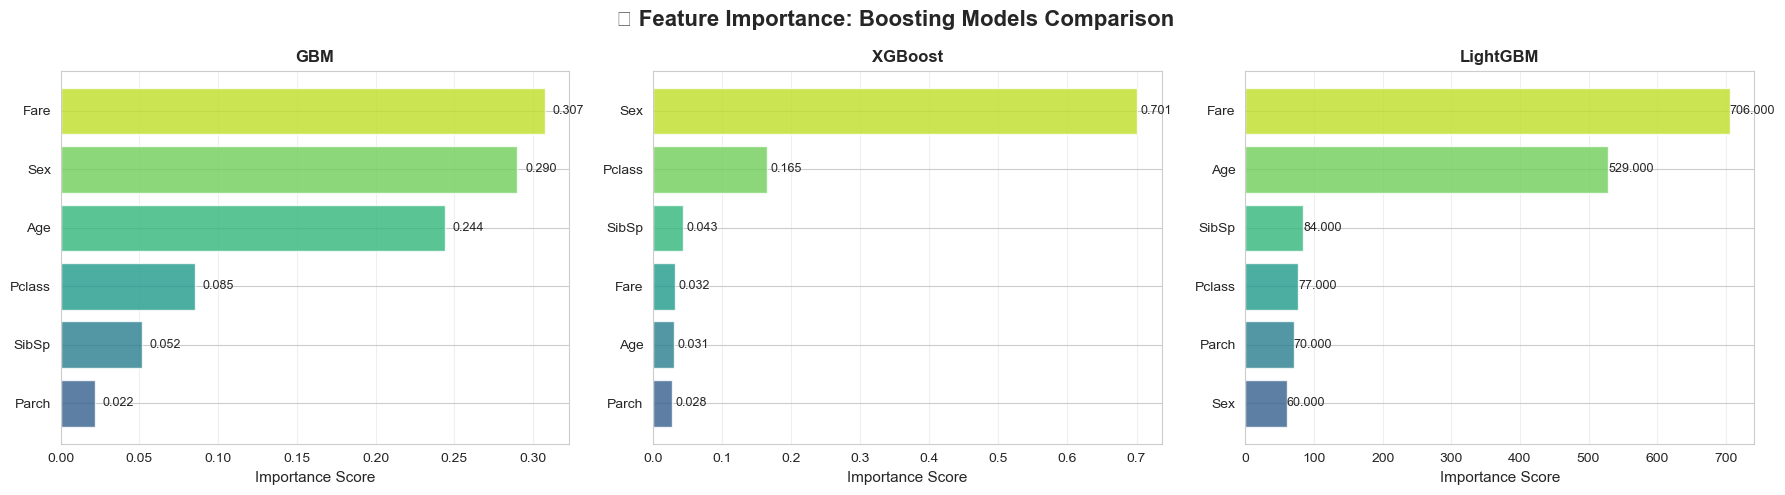


📋 Feature Importance Rankings:

GBM:
  1. Fare       - 0.3075
  2. Sex        - 0.2899
  3. Age        - 0.2441
  4. Pclass     - 0.0853
  5. SibSp      - 0.0515
  6. Parch      - 0.0217

XGBoost:
  1. Sex        - 0.7012
  2. Pclass     - 0.1649
  3. SibSp      - 0.0430
  4. Fare       - 0.0323
  5. Age        - 0.0308
  6. Parch      - 0.0278

LightGBM:
  1. Fare       - 706.0000
  2. Age        - 529.0000
  3. SibSp      - 84.0000
  4. Pclass     - 77.0000
  5. Parch      - 70.0000
  6. Sex        - 60.0000


💡 Insights:
• Features at the top are most influential for predictions
• Sex and Pclass are typically the strongest predictors
• Consistent rankings across models = reliable feature importance
• Low importance features might be candidates for removal


In [85]:
# Bonus: Feature Importance Analysis for Boosting Models
print("🔍 Feature Importance Analysis:")
print("=" * 70)
print("Understanding which features matter most for predictions\n")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('📊 Feature Importance: Boosting Models Comparison', 
             fontsize=16, fontweight='bold')

boosting_model_names = ['GBM', 'XGBoost', 'LightGBM']
boosting_model_objects = [
    boosting_models['GBM'],
    boosting_models['XGBoost'],
    boosting_models['LightGBM']
]

for idx, (model_name, model) in enumerate(zip(boosting_model_names, boosting_model_objects)):
    # Get feature importances
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        importances = model.feature_importance()
    
    # Create DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': cols,
        'Importance': importances
    }).sort_values('Importance', ascending=True)
    
    # Plot
    colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance_df)))
    axes[idx].barh(feature_importance_df['Feature'], 
                   feature_importance_df['Importance'],
                   color=colors, alpha=0.8)
    axes[idx].set_xlabel('Importance Score', fontsize=11)
    axes[idx].set_title(f'{model_name}', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (feat, imp) in enumerate(zip(feature_importance_df['Feature'], 
                                        feature_importance_df['Importance'])):
        axes[idx].text(imp + 0.005, i, f'{imp:.3f}', 
                      va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print detailed importance rankings
print("\n📋 Feature Importance Rankings:")
print("=" * 70)

for model_name, model in zip(boosting_model_names, boosting_model_objects):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    else:
        importances = model.feature_importance()
    
    feature_importance_df = pd.DataFrame({
        'Feature': cols,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print(f"\n{model_name}:")
    for i, (idx, row) in enumerate(feature_importance_df.iterrows(), 1):
        print(f"  {i}. {row['Feature']:10s} - {row['Importance']:.4f}")

print("\n\n💡 Insights:")
print("=" * 70)
print("• Features at the top are most influential for predictions")
print("• Sex and Pclass are typically the strongest predictors")
print("• Consistent rankings across models = reliable feature importance")
print("• Low importance features might be candidates for removal")